In [192]:
# Data Science Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import datetime

# Linear ALgorithms
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier

# Tree Based Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Machine Learning proccessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score, mean_absolute_error

In [4]:
# Display options
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

In [24]:
# Read in CSV
df_FDS = pd.read_csv("FinalDS.csv")

In [206]:
# Read in CSV
ml_df = pd.read_csv("FinalDS.csv")

In [25]:
# Datetime conversion
df_FDS["Date"] = pd.to_datetime(df_FDS["Date"])

In [26]:
df_FDS["cott"] = (df_FDS['COT']*df_FDS['INV'])

In [27]:
df_FDS["icot"] = (df_FDS['COT']/df_FDS['INV'])

In [28]:
df_FDS["idng"] = (df_FDS['DNG']/df_FDS['INV'])

In [29]:
df_FDS["dngt"] = (df_FDS['DNG']*df_FDS['INV'])

In [30]:
df_FDS.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0       NaN         NaN  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  
0  134171428.8  
1  122656065.6  
2  112013078.4  
3  107476723.2  
4  101544566.4

In [31]:
# Null analysis
df_FDS = df_FDS.fillna(value=0)
df_FDS.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  
0  134171428.8  
1  122656065.6  
2  112013078.4  
3  107476723.2  
4  101544566.4

In [76]:
df_FDS_date = df_FDS.set_index('Date')

In [77]:
df_FDS_date.head()

Returns  Volatility  Node   Sit  INV       DNG      QNG  \
Date                                                                   
2010-01-01  0.000000    0.000000  East  7.66  769  174475.2  13475.0   
2010-01-08 -0.481303    0.484173  East  7.66  703  174475.2  13475.0   
2010-01-15  0.587787    0.595347  East  7.66  642  174475.2  13475.0   
2010-01-22  0.058840    0.061240  East  7.66  616  174475.2  13475.0   
2010-01-29  0.041964    0.044199  East  7.66  582  174475.2  13475.0   

            HHDiffit     Ft     COT  HHst       cott         icot        idng  \
Date                                                                            
2010-01-01     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
2010-01-08     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2010-01-15     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
2010-01-22     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
2010-01-29     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

                   dngt  
Date                     
2010-01-01  134171428.8  
2010-01-08  122656065.6  
2010-01-15  112013078.4  
2010-01-22  107476723.2  
2010-01-29  101544566.4

In [35]:
df_FDS.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  
0  134171428.8  
1  122656065.6  
2  112013078.4  
3  107476723.2  
4  101544566.4

In [36]:
# df_FDS = df_FDS.reset_index(drop = True)

In [37]:
df_FDS.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  
0  134171428.8  
1  122656065.6  
2  112013078.4  
3  107476723.2  
4  101544566.4

In [38]:
df_FDS.shape

(1830, 16)

In [39]:
df_FDS.describe()

Returns   Volatility          Sit          INV            DNG  \
count  1830.000000  1830.000000  1830.000000  1830.000000    1830.000000   
mean     -0.006594     0.229796     5.007738   559.764481   89909.475410   
std       0.419054     0.355213     1.566180   348.303130   51761.103874   
min      -4.025352     0.000000     2.250000    80.000000   20309.200000   
25%      -0.111810     0.036242     3.980000   249.250000   46073.000000   
50%       0.000000     0.103261     4.720000   482.500000   71874.750000   
75%       0.093090     0.264161     5.720000   874.000000  131413.000000   
max       3.465736     4.058148    11.350000  1370.000000  259140.250000   

                 QNG     HHDiffit           Ft           COT         HHst  \
count    1830.000000  1830.000000  1830.000000  1.830000e+03  1830.000000   
mean    91564.290164    -1.519760     3.493694  1.055391e+06     3.487978   
std     95923.960180     1.356882     0.872201  1.749606e+05     0.936041   
min         0.000000    -7.230000     1.687000  7.240870e+05     1.570000   
25%      4879.750000    -2.070000     2.772000  9.489800e+05     2.790000   
50%     81122.500000    -1.120000     3.611500  1.019501e+06     3.540000   
75%    132187.387500    -0.600000     4.172000  1.174981e+06     4.150000   
max    302955.500000     1.660000     5.975000  1.573733e+06     6.560000   

               cott          icot         idng          dngt  
count  1.830000e+03   1830.000000  1830.000000  1.830000e+03  
mean   5.894734e+08   3107.384245   195.217940  6.030667e+07  
std    3.812403e+08   2466.846332   121.000931  5.337954e+07  
min    8.733552e+07    619.098347    39.445253  1.971316e+06  
25%    2.560400e+08   1211.284622   126.532770  1.207576e+07  
50%    5.013384e+08   2242.535762   166.015038  4.272332e+07  
75%    8.736800e+08   4304.546551   230.119172  1.038540e+08  
max    1.636590e+09  13723.555556  1310.914671  2.112762e+08

In [40]:
df_FDS.corr()

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.002274  0.076218 -0.016444 -0.004983 -0.020101   
Volatility  0.002274    1.000000 -0.141232 -0.018485 -0.005424  0.048650   
Sit         0.076218   -0.141232  1.000000 -0.049910  0.247112 -0.061842   
INV        -0.016444   -0.018485 -0.049910  1.000000  0.553788  0.420146   
DNG        -0.004983   -0.005424  0.247112  0.553788  1.000000  0.391351   
QNG        -0.020101    0.048650 -0.061842  0.420146  0.391351  1.000000   
HHDiffit   -0.094775    0.281353 -0.804160 -0.058615 -0.283760  0.034444   
Ft         -0.019239    0.168538  0.503202 -0.148005 -0.010827 -0.056424   
COT        -0.000536    0.066878 -0.147051 -0.021293  0.021907  0.034047   
HHst       -0.009858    0.171541  0.507488 -0.168477  0.002130 -0.053544   
cott       -0.016088    0.007226 -0.097432  0.958365  0.540851  0.420677   
icot        0.004546    0.035524 -0.023005 -0.796530 -0.566849 -0.172881   
idng        0.003551    0.044279  0.249979 -0.459774  0.328269 -0.039306   
dngt       -0.015849   -0.001220  0.058992  0.875962  0.831530  0.543801   

            HHDiffit        Ft       COT      HHst      cott      icot  \
Returns    -0.094775 -0.019239 -0.000536 -0.009858 -0.016088  0.004546   
Volatility  0.281353  0.168538  0.066878  0.171541  0.007226  0.035524   
Sit        -0.804160  0.503202 -0.147051  0.507488 -0.097432 -0.023005   
INV        -0.058615 -0.148005 -0.021293 -0.168477  0.958365 -0.796530   
DNG        -0.283760 -0.010827  0.021907  0.002130  0.540851 -0.566849   
QNG         0.034444 -0.056424  0.034047 -0.053544  0.420677 -0.172881   
HHDiffit    1.000000  0.096669  0.042539  0.104079 -0.034233  0.115770   
Ft          0.096669  1.000000 -0.207299  0.982086 -0.197472  0.107354   
COT         0.042539 -0.207299  1.000000 -0.184381  0.223646  0.230522   
HHst        0.104079  0.982086 -0.184381  1.000000 -0.212648  0.129328   
cott       -0.034233 -0.197472  0.223646 -0.212648  1.000000 -0.731186   
icot        0.115770  0.107354  0.230522  0.129328 -0.731186  1.000000   
idng       -0.122943  0.199114  0.047855  0.240047 -0.433527  0.408729   
dngt       -0.154035 -0.114116  0.002051 -0.124584  0.848430 -0.701391   

                idng      dngt  
Returns     0.003551 -0.015849  
Volatility  0.044279 -0.001220  
Sit         0.249979  0.058992  
INV        -0.459774  0.875962  
DNG         0.328269  0.831530  
QNG        -0.039306  0.543801  
HHDiffit   -0.122943 -0.154035  
Ft          0.199114 -0.114116  
COT         0.047855  0.002051  
HHst        0.240047 -0.124584  
cott       -0.433527  0.848430  
icot        0.408729 -0.701391  
idng        1.000000 -0.156687  
dngt       -0.156687  1.000000

In [41]:
corrs_FDS = df_FDS.corr()

In [42]:
corrs_FDS

Returns  Volatility       Sit       INV       DNG       QNG  \
Returns     1.000000    0.002274  0.076218 -0.016444 -0.004983 -0.020101   
Volatility  0.002274    1.000000 -0.141232 -0.018485 -0.005424  0.048650   
Sit         0.076218   -0.141232  1.000000 -0.049910  0.247112 -0.061842   
INV        -0.016444   -0.018485 -0.049910  1.000000  0.553788  0.420146   
DNG        -0.004983   -0.005424  0.247112  0.553788  1.000000  0.391351   
QNG        -0.020101    0.048650 -0.061842  0.420146  0.391351  1.000000   
HHDiffit   -0.094775    0.281353 -0.804160 -0.058615 -0.283760  0.034444   
Ft         -0.019239    0.168538  0.503202 -0.148005 -0.010827 -0.056424   
COT        -0.000536    0.066878 -0.147051 -0.021293  0.021907  0.034047   
HHst       -0.009858    0.171541  0.507488 -0.168477  0.002130 -0.053544   
cott       -0.016088    0.007226 -0.097432  0.958365  0.540851  0.420677   
icot        0.004546    0.035524 -0.023005 -0.796530 -0.566849 -0.172881   
idng        0.003551    0.044279  0.249979 -0.459774  0.328269 -0.039306   
dngt       -0.015849   -0.001220  0.058992  0.875962  0.831530  0.543801   

            HHDiffit        Ft       COT      HHst      cott      icot  \
Returns    -0.094775 -0.019239 -0.000536 -0.009858 -0.016088  0.004546   
Volatility  0.281353  0.168538  0.066878  0.171541  0.007226  0.035524   
Sit        -0.804160  0.503202 -0.147051  0.507488 -0.097432 -0.023005   
INV        -0.058615 -0.148005 -0.021293 -0.168477  0.958365 -0.796530   
DNG        -0.283760 -0.010827  0.021907  0.002130  0.540851 -0.566849   
QNG         0.034444 -0.056424  0.034047 -0.053544  0.420677 -0.172881   
HHDiffit    1.000000  0.096669  0.042539  0.104079 -0.034233  0.115770   
Ft          0.096669  1.000000 -0.207299  0.982086 -0.197472  0.107354   
COT         0.042539 -0.207299  1.000000 -0.184381  0.223646  0.230522   
HHst        0.104079  0.982086 -0.184381  1.000000 -0.212648  0.129328   
cott       -0.034233 -0.197472  0.223646 -0.212648  1.000000 -0.731186   
icot        0.115770  0.107354  0.230522  0.129328 -0.731186  1.000000   
idng       -0.122943  0.199114  0.047855  0.240047 -0.433527  0.408729   
dngt       -0.154035 -0.114116  0.002051 -0.124584  0.848430 -0.701391   

                idng      dngt  
Returns     0.003551 -0.015849  
Volatility  0.044279 -0.001220  
Sit         0.249979  0.058992  
INV        -0.459774  0.875962  
DNG         0.328269  0.831530  
QNG        -0.039306  0.543801  
HHDiffit   -0.122943 -0.154035  
Ft          0.199114 -0.114116  
COT         0.047855  0.002051  
HHst        0.240047 -0.124584  
cott       -0.433527  0.848430  
icot        0.408729 -0.701391  
idng        1.000000 -0.156687  
dngt       -0.156687  1.000000

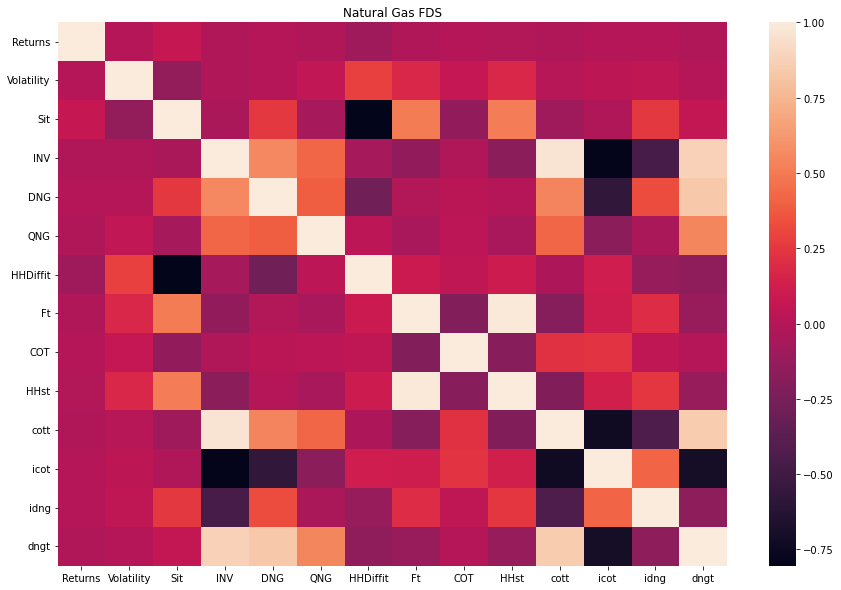

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(corrs_FDS)

plt.title('Natural Gas FDS')

# Save an image of the chart and print it to the screen
plt.savefig("Natural Gas FDS.png")

plt.show()

In [44]:
# Feature engineering, column selection.
# One must use ALL ONE-HOT ENCODED COLUMNS, one cannot simply use one column and leave the rest.
abs(df_FDS.corr()["HHst"]).sort_values(ascending=False)

HHst          1.000000
Ft            0.982086
Sit           0.507488
idng          0.240047
cott          0.212648
COT           0.184381
Volatility    0.171541
INV           0.168477
icot          0.129328
dngt          0.124584
HHDiffit      0.104079
QNG           0.053544
Returns       0.009858
DNG           0.002130
Name: HHst, dtype: float64

In [46]:
# Comparison by Nodes
fds_comparison = df_FDS.groupby(['Node']).describe()
fds_comparison

Returns                                                         \
                count      mean       std       min       25%  50%       75%   
Node                                                                           
East            366.0 -0.001803  0.246127 -1.596309 -0.039512  0.0  0.046308   
Midwest         366.0  0.000133  0.308061 -1.572880 -0.116007  0.0  0.096173   
Mountain        366.0 -0.006396  0.386887 -4.025352 -0.086910  0.0  0.088526   
Pacific         366.0 -0.007465  0.524034 -1.791759 -0.200671  0.0  0.157262   
South Central   366.0 -0.017440  0.547718 -3.091042 -0.167054  0.0  0.116155   

                        Volatility                                     \
                    max      count      mean       std  min       25%   
Node                                                                    
East           1.142737      366.0  0.124430  0.215037  0.0  0.017746   
Midwest        1.881786      366.0  0.195119  0.242048  0.0  0.043427   
Mountain       1.258040      366.0  0.198752  0.336163  0.0  0.034370   
Pacific        2.512306      366.0  0.328783  0.414249  0.0  0.068052   
South Central  3.465736      366.0  0.301899  0.463124  0.0  0.062584   

                                               Sit                            \
                    50%       75%       max  count      mean       std   min   
Node                                                                           
East           0.042248  0.119048  1.610057  366.0  6.959399  1.775059  3.40   
Midwest        0.111490  0.257568  1.900010  366.0  4.691803  0.966011  2.79   
Mountain       0.090512  0.221631  4.058148  366.0  5.023798  1.010063  2.78   
Pacific        0.184615  0.458346  2.544375  366.0  4.012678  0.844165  2.25   
South Central  0.147288  0.340178  3.517207  366.0  4.351011  1.062798  2.30   

                                               INV                          \
                  25%    50%     75%    max  count        mean         std   
Node                                                                         
East           5.6775  6.870  8.0225  11.35  366.0  643.286885  215.518749   
Midwest        4.0900  4.680  5.2200   8.33  366.0  725.256831  262.592929   
Mountain       4.2300  5.020  5.7800   7.63  366.0  168.237705   40.050048   
Pacific        3.4100  4.055  4.5875   6.25  366.0  288.439891   64.135904   
South Central  3.5100  4.190  5.0300   6.88  366.0  973.601093  230.356910   

                                                         DNG                 \
                 min     25%     50%      75%     max  count           mean   
Node                                                                          
East           167.0  468.50   662.0   836.75   960.0  366.0  152808.677596   
Midwest        133.0  535.00   733.5   952.75  1155.0  366.0   83383.797814   
Mountain        80.0  137.00   167.5   200.00   259.0  366.0   33925.081967   
Pacific        102.0  258.00   301.5   335.00   386.0  366.0   52319.617486   
South Central  332.0  818.75  1014.5  1160.75  1370.0  366.0  127110.202186   

                                                                         \
                        std      min        25%         50%         75%   
Node                                                                      
East           39200.012165  91133.0  121722.50  143668.000  181102.025   
Midwest        36466.973021  39050.8   51518.40   71027.125  120051.000   
Mountain        8535.452427  20309.2   27629.00   32084.725   39956.600   
Pacific         9742.728185  34743.8   46315.60   51656.625   58142.500   
South Central  20830.778526  66996.4  113066.85  127791.475  141253.875   

                            QNG                                         \
                     max  count           mean           std       min   
Node                                                                     
East           259140.25  366.0   86671.005464  48377.842786   134

# Begin Cumulative Plots

#  Histograms

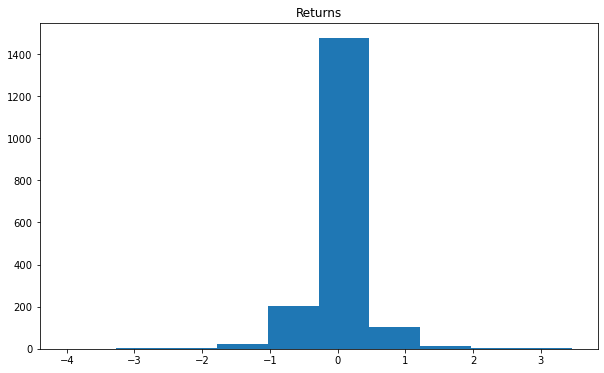

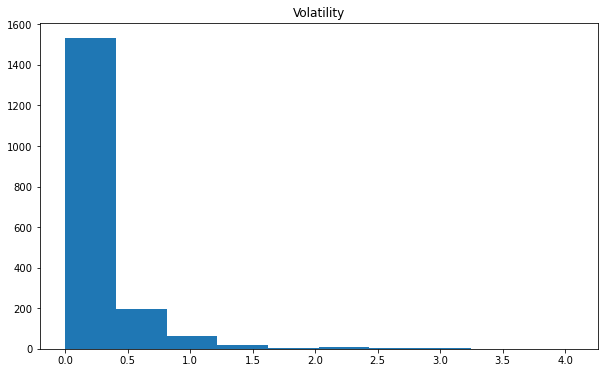

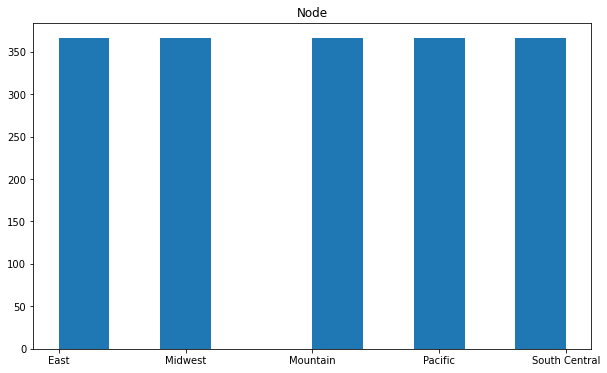

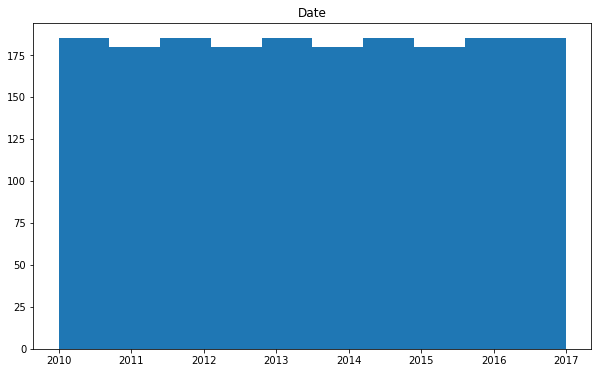

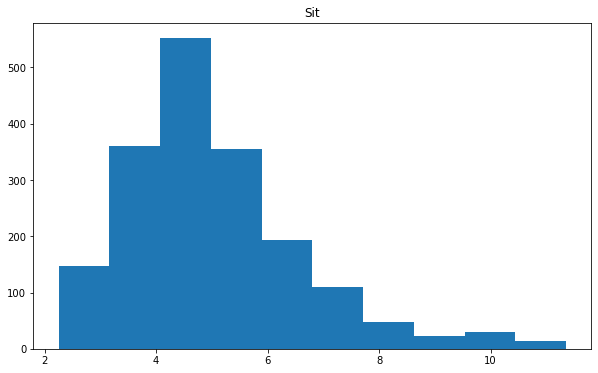

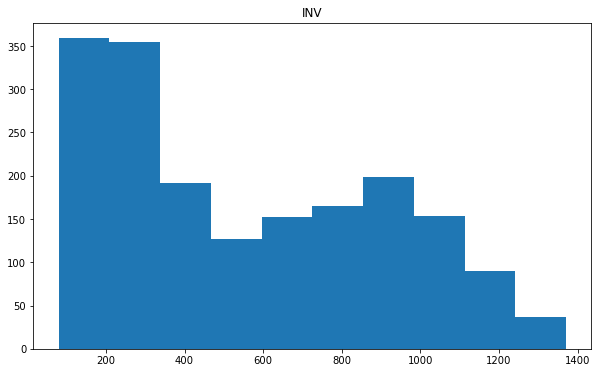

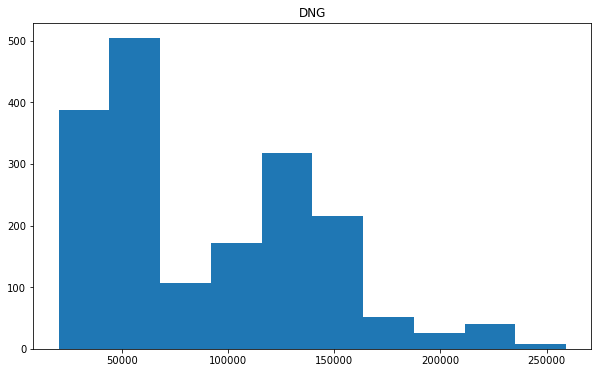

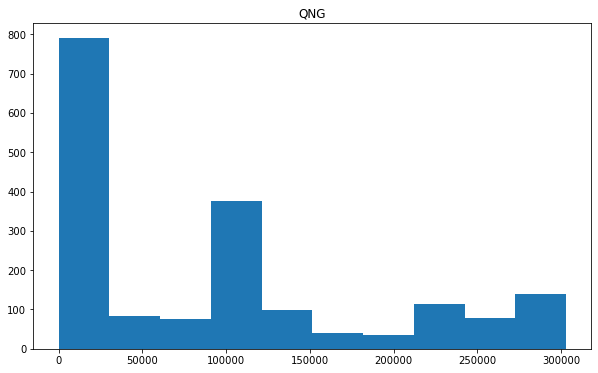

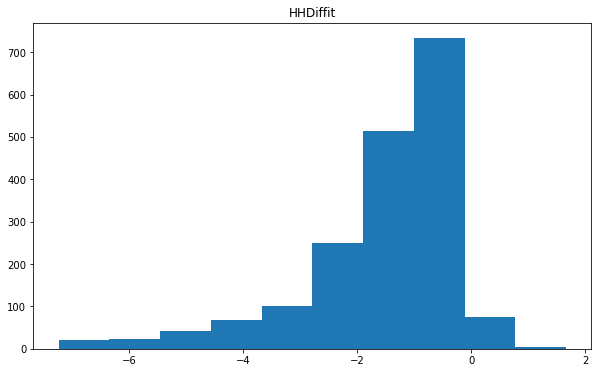

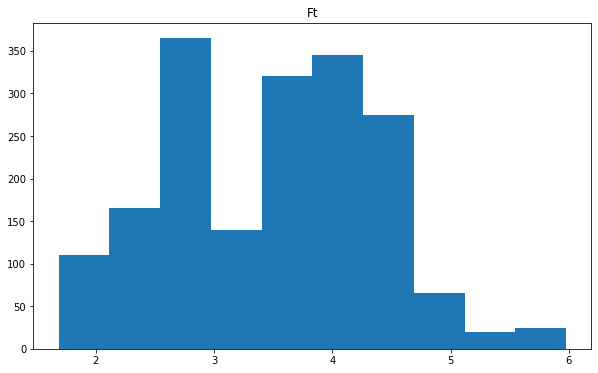

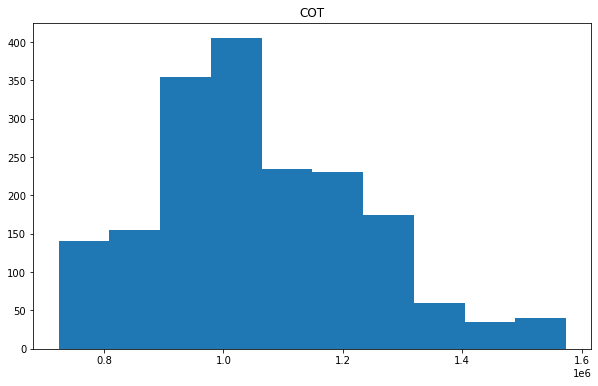

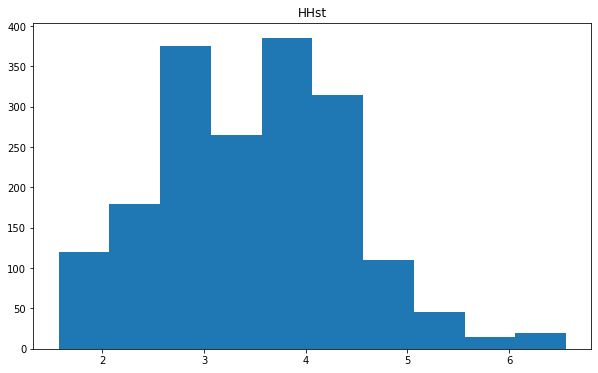

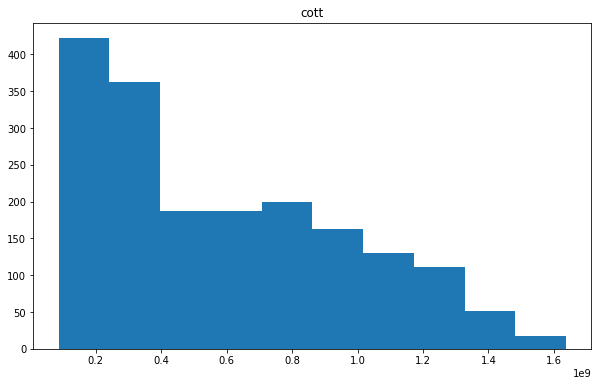

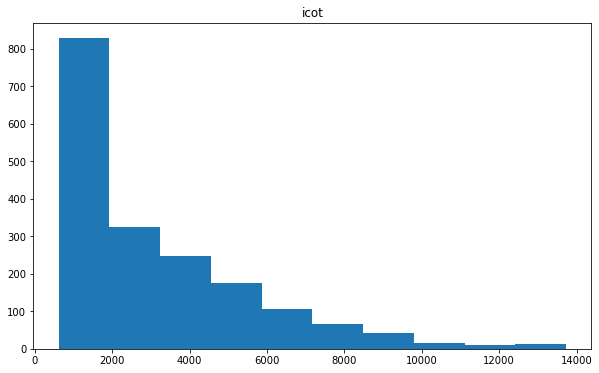

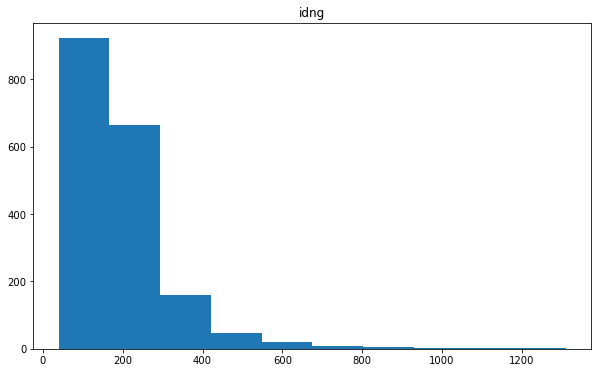

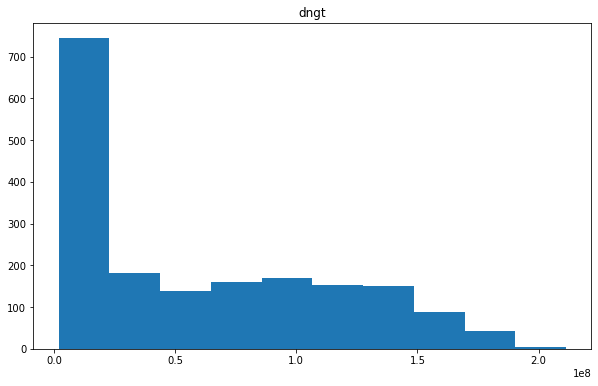

In [47]:
for col in df_FDS.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df_FDS[col])
    plt.title(col)
    # Save an image of the chart and print it to the screen
    plt.savefig("Natural Gas FDS Cumulative Histogram Plots.png")
    plt.show()
    print()

# Line Plots

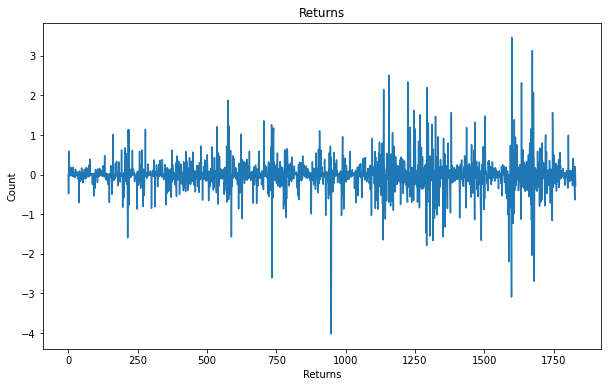

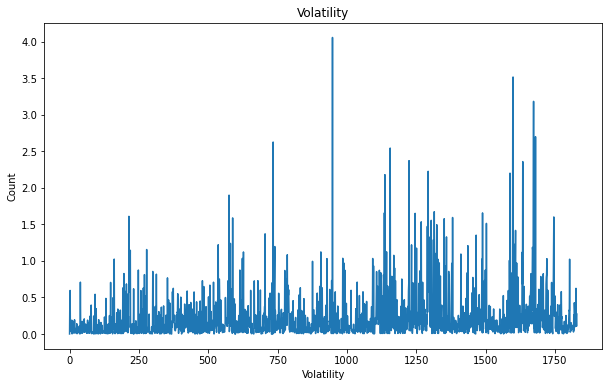

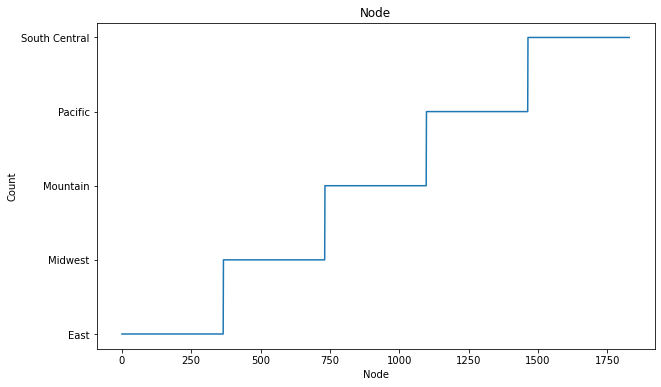

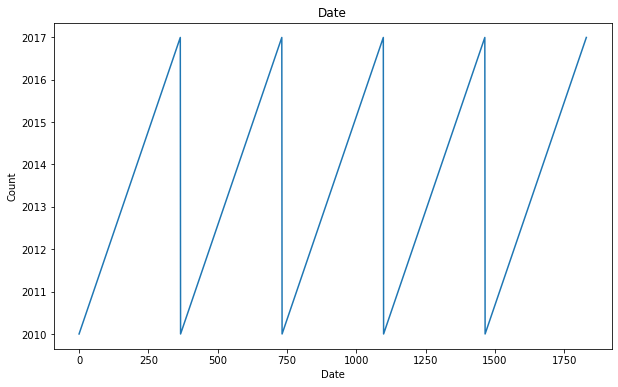

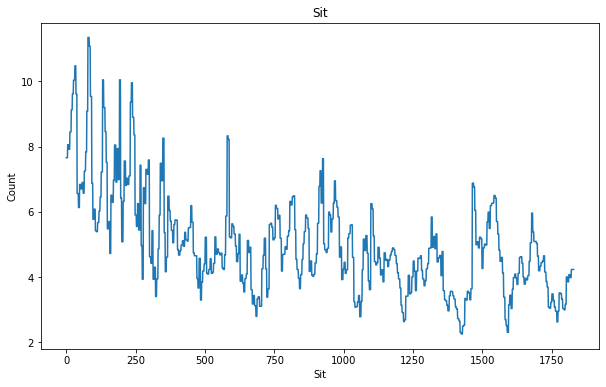

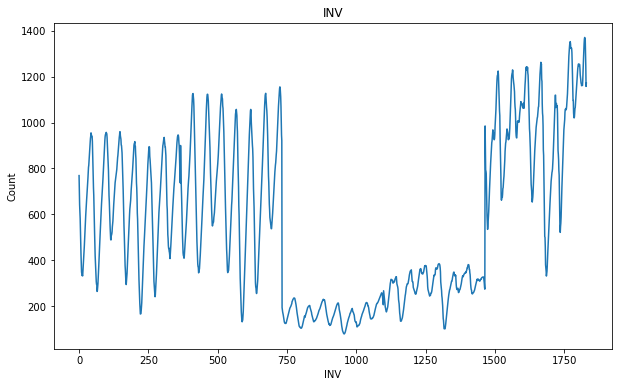

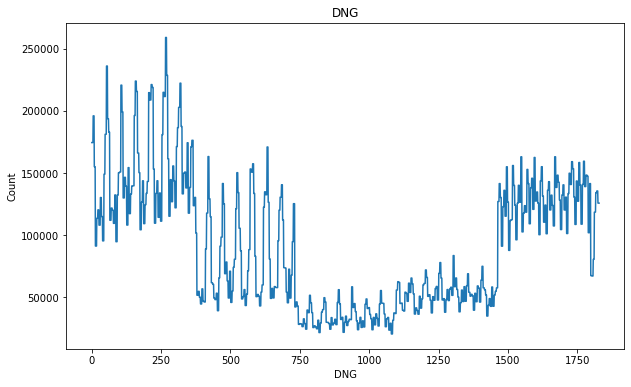

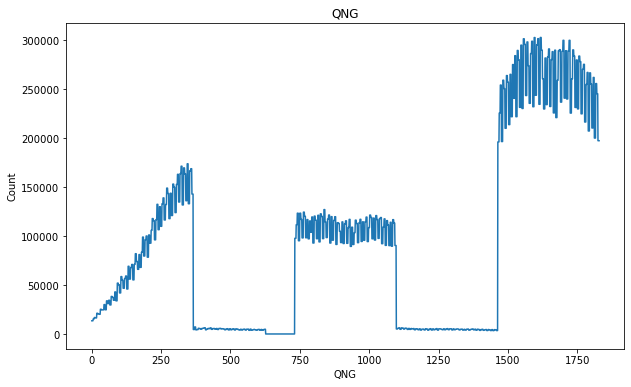

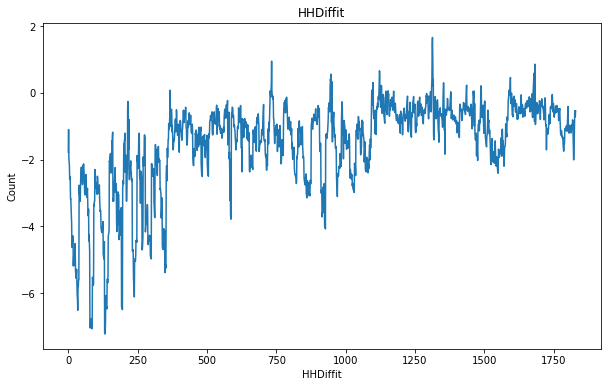

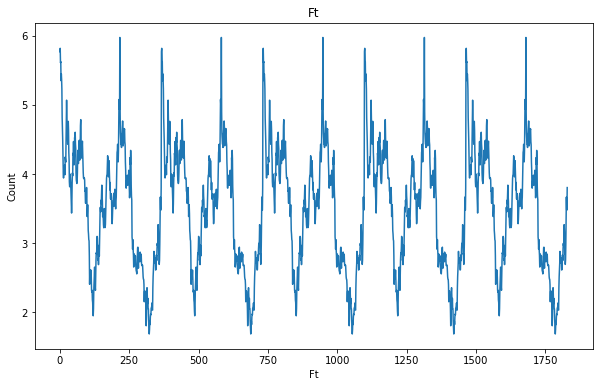

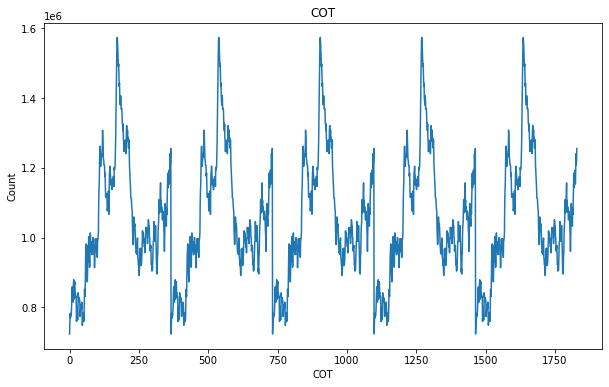

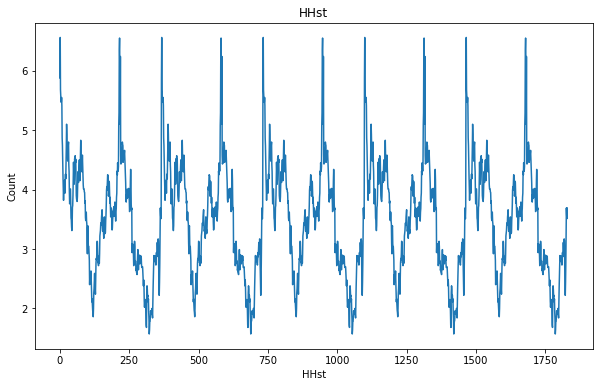

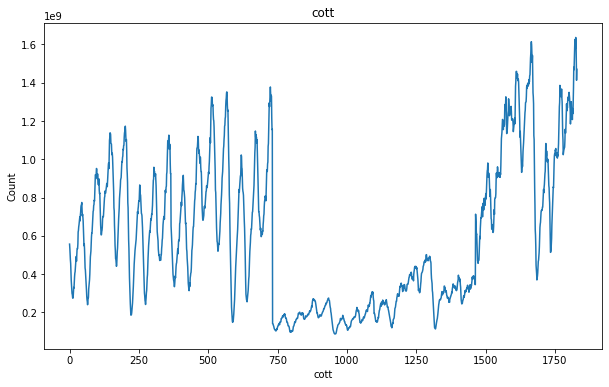

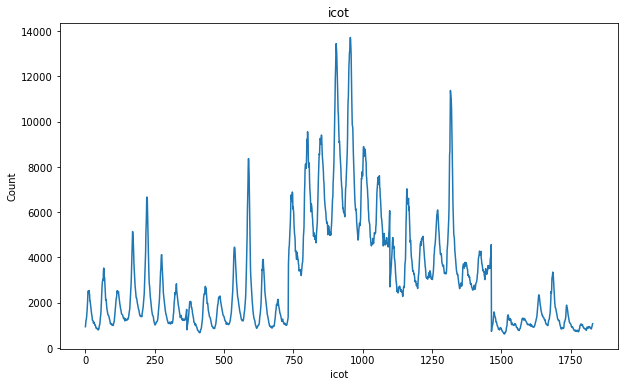

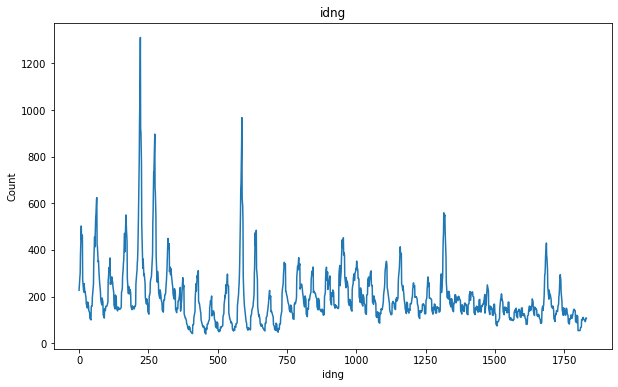

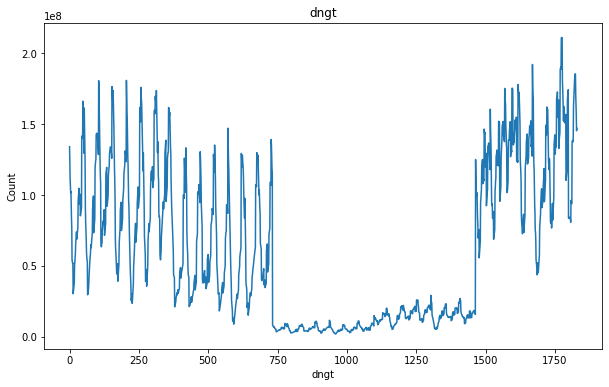

In [48]:
for col in df_FDS.columns: 
    plt.figure(figsize=(10,6))
    plt.plot(df_FDS[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print()

# Boxplots

In [49]:
df_FDS.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt'],
      dtype='object')

In [50]:
cols_date = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt']

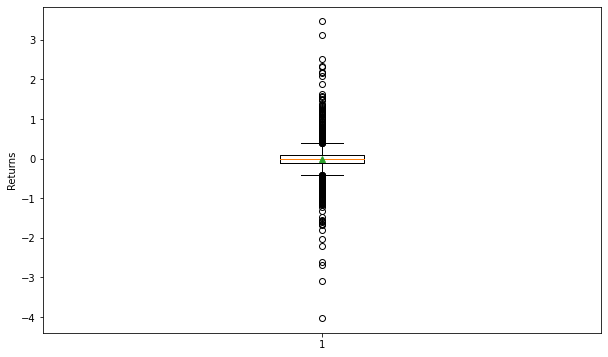

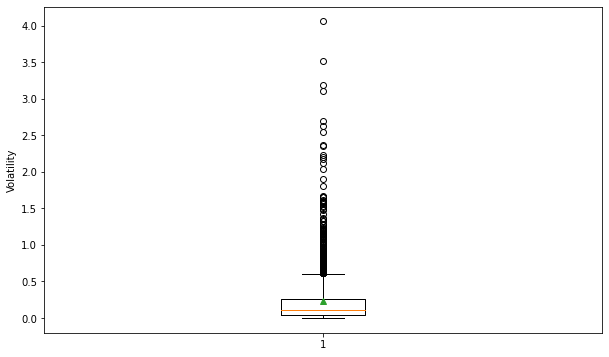

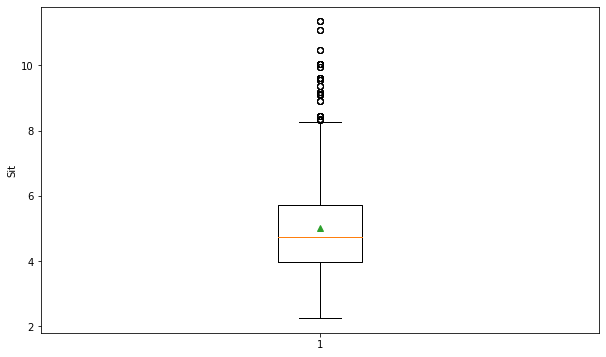

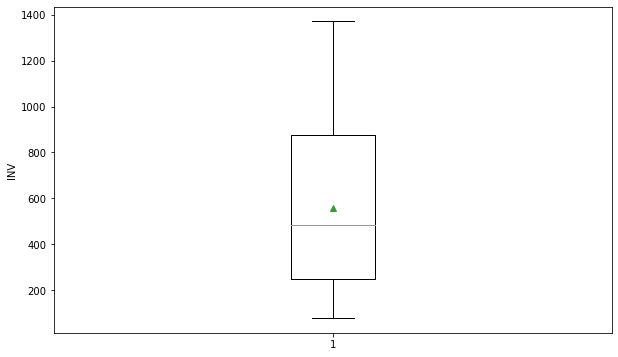

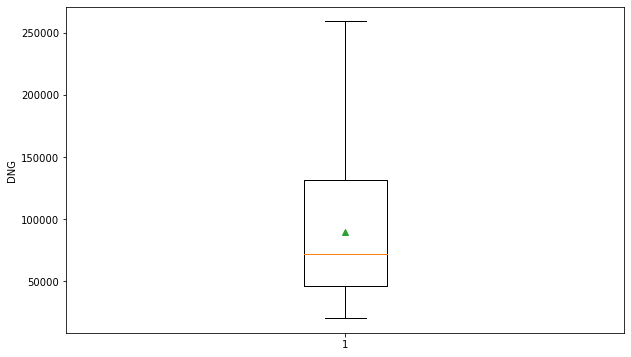

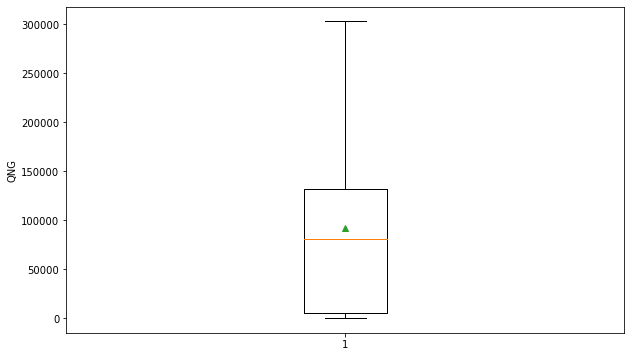

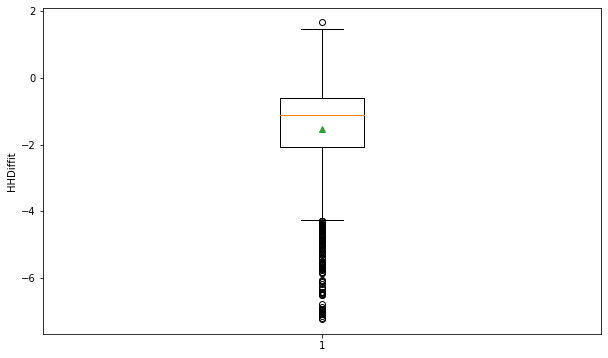

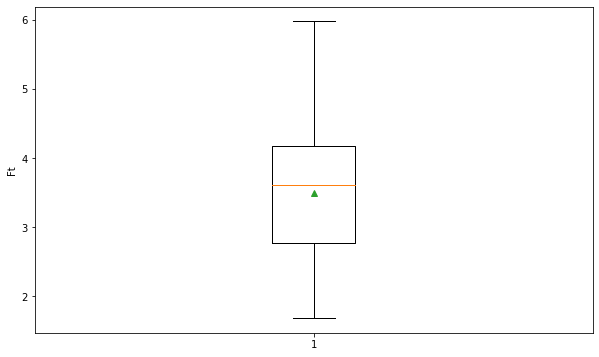

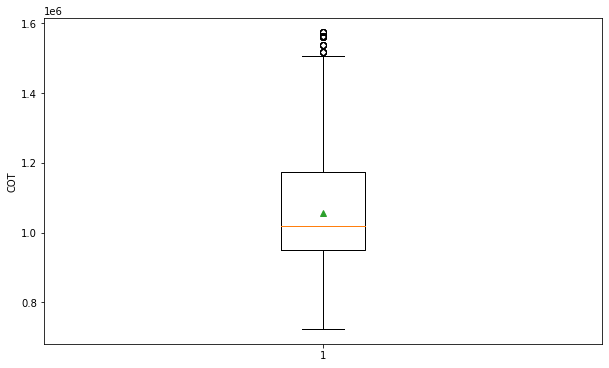

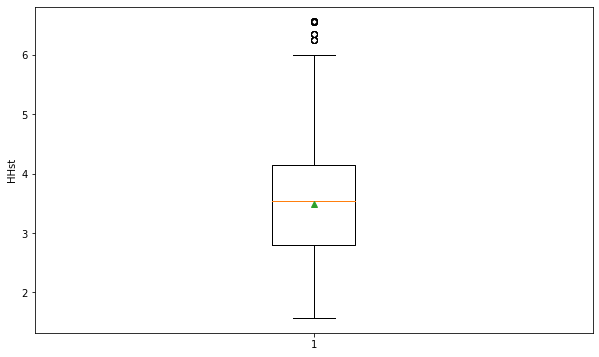

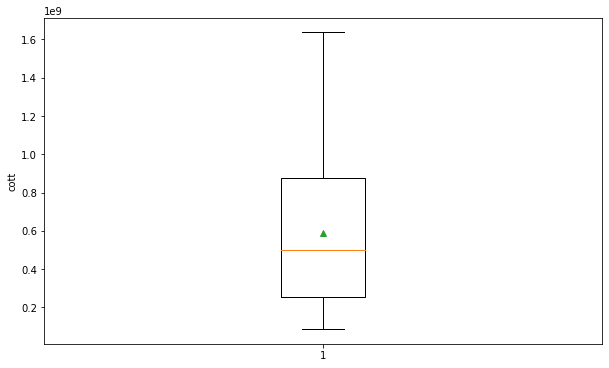

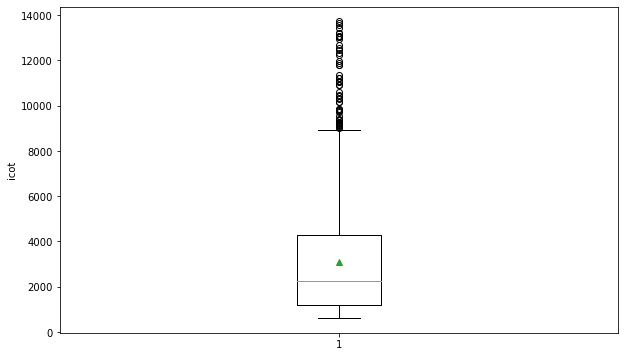

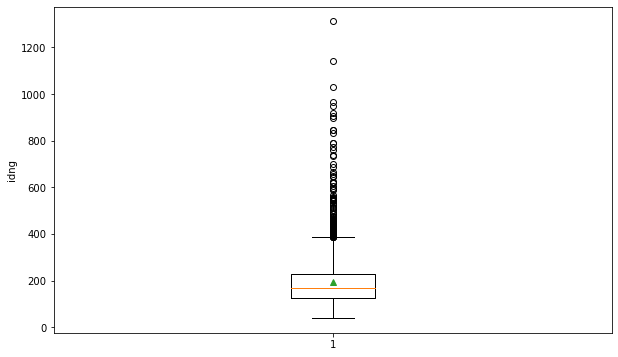

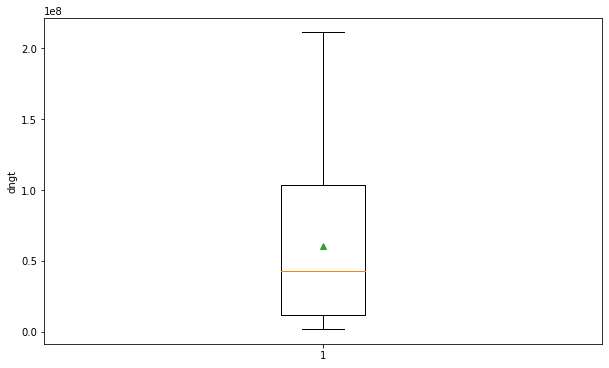

In [51]:
# to create a boxplot of all the columns in the dataset
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.boxplot(df_FDS[col], showmeans=True)
    plt.ylabel(col)
    plt.show()

# End Cumulative Plots

# Begin: Break the "df_FDS" into columns

In [55]:
node = df_FDS.Node.value_counts()
node

East             366
Midwest          366
Mountain         366
Pacific          366
South Central    366
Name: Node, dtype: int64

In [78]:
fds_East = df_FDS_date.loc[df_FDS_date.Node=="East"]
fds_East.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2010-01-01 to 2016-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     366 non-null    float64
 1   Volatility  366 non-null    float64
 2   Node        366 non-null    object 
 3   Sit         366 non-null    float64
 4   INV         366 non-null    int64  
 5   DNG         366 non-null    float64
 6   QNG         366 non-null    float64
 7   HHDiffit    366 non-null    float64
 8   Ft          366 non-null    float64
 9   COT         366 non-null    int64  
 10  HHst        366 non-null    float64
 11  cott        366 non-null    int64  
 12  icot        366 non-null    float64
 13  idng        366 non-null    float64
 14  dngt        366 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 45.8+ KB


In [79]:
fds_East.describe()

Returns  Volatility         Sit         INV            DNG  \
count  366.000000  366.000000  366.000000  366.000000     366.000000   
mean    -0.001803    0.124430    6.959399  643.286885  152808.677596   
std      0.246127    0.215037    1.775059  215.518749   39200.012165   
min     -1.596309    0.000000    3.400000  167.000000   91133.000000   
25%     -0.039512    0.017746    5.677500  468.500000  121722.500000   
50%      0.000000    0.042248    6.870000  662.000000  143668.000000   
75%      0.046308    0.119048    8.022500  836.750000  181102.025000   
max      1.142737    1.610057   11.350000  960.000000  259140.250000   

                 QNG    HHDiffit          Ft           COT        HHst  \
count     366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean    86671.005464   -3.471421    3.493694  1.055391e+06    3.487978   
std     48377.842786    1.503977    0.873156  1.751522e+05    0.937066   
min     13475.000000   -7.230000    1.687000  7.240870e+05    1.570000   
25%     41924.200000   -4.475000    2.773000  9.493555e+05    2.790000   
50%     81122.500000   -3.180000    3.611500  1.019501e+06    3.540000   
75%    132187.387500   -2.342500    4.167250  1.174931e+06    4.150000   
max    173862.750000   -0.260000    5.975000  1.573733e+06    6.560000   

               cott         icot         idng          dngt  
count  3.660000e+02   366.000000   366.000000  3.660000e+02  
mean   6.755678e+08  1934.384238   282.401225  9.731731e+07  
std    2.449250e+08  1038.406048   173.915042  3.872576e+07  
min    1.859091e+08   796.924468    99.804188  2.354869e+07  
25%    4.902404e+08  1235.966349   163.948192  6.898085e+07  
50%    6.865678e+08  1578.007302   227.676694  9.388335e+07  
75%    8.640297e+08  2318.361975   323.581444  1.287942e+08  
max    1.173169e+09  6667.293413  1310.914671  1.809858e+08

In [80]:
fds_East.head()

Returns  Volatility  Node   Sit  INV       DNG      QNG  \
Date                                                                   
2010-01-01  0.000000    0.000000  East  7.66  769  174475.2  13475.0   
2010-01-08 -0.481303    0.484173  East  7.66  703  174475.2  13475.0   
2010-01-15  0.587787    0.595347  East  7.66  642  174475.2  13475.0   
2010-01-22  0.058840    0.061240  East  7.66  616  174475.2  13475.0   
2010-01-29  0.041964    0.044199  East  7.66  582  174475.2  13475.0   

            HHDiffit     Ft     COT  HHst       cott         icot        idng  \
Date                                                                            
2010-01-01     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
2010-01-08     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2010-01-15     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
2010-01-22     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
2010-01-29     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

                   dngt  
Date                     
2010-01-01  134171428.8  
2010-01-08  122656065.6  
2010-01-15  112013078.4  
2010-01-22  107476723.2  
2010-01-29  101544566.4

In [81]:
fds_Midwest = df_FDS_date.loc[df_FDS_date.Node=="Midwest"]
fds_Midwest.info()          

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2010-01-01 to 2016-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     366 non-null    float64
 1   Volatility  366 non-null    float64
 2   Node        366 non-null    object 
 3   Sit         366 non-null    float64
 4   INV         366 non-null    int64  
 5   DNG         366 non-null    float64
 6   QNG         366 non-null    float64
 7   HHDiffit    366 non-null    float64
 8   Ft          366 non-null    float64
 9   COT         366 non-null    int64  
 10  HHst        366 non-null    float64
 11  cott        366 non-null    int64  
 12  icot        366 non-null    float64
 13  idng        366 non-null    float64
 14  dngt        366 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 45.8+ KB


In [82]:
fds_Midwest.describe()

Returns  Volatility         Sit          INV            DNG  \
count  366.000000  366.000000  366.000000   366.000000     366.000000   
mean     0.000133    0.195119    4.691803   725.256831   83383.797814   
std      0.308061    0.242048    0.966011   262.592929   36466.973021   
min     -1.572880    0.000000    2.790000   133.000000   39050.800000   
25%     -0.116007    0.043427    4.090000   535.000000   51518.400000   
50%      0.000000    0.111490    4.680000   733.500000   71027.125000   
75%      0.096173    0.257568    5.220000   952.750000  120051.000000   
max      1.881786    1.900010    8.330000  1155.000000  170915.250000   

               QNG    HHDiffit          Ft           COT        HHst  \
count   366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean   3462.519126   -1.203825    3.493694  1.055391e+06    3.487978   
std    2278.725755    0.564948    0.873156  1.751522e+05    0.937066   
min       0.000000   -3.790000    1.687000  7.240870e+05    1.570000   
25%       0.000000   -1.470000    2.773000  9.493555e+05    2.790000   
50%    4461.250000   -1.120000    3.611500  1.019501e+06    3.540000   
75%    5067.250000   -0.832500    4.167250  1.174931e+06    4.150000   
max    7166.000000    0.080000    5.975000  1.573733e+06    6.560000   

               cott         icot        idng          dngt  
count  3.660000e+02   366.000000  366.000000  3.660000e+02  
mean   7.599146e+08  1799.223739  143.625852  6.011943e+07  
std    2.927714e+08  1197.990394  123.784158  3.426306e+07  
min    1.480593e+08   671.846637   39.445253  8.920127e+06  
25%    5.537713e+08  1068.614079   69.345900  3.315636e+07  
50%    7.537182e+08  1415.392968  104.188773  4.706741e+07  
75%    9.607953e+08  2026.426871  170.934622  8.876239e+07  
max    1.377943e+09  8370.135338  967.132246  1.472406e+08

In [83]:
fds_Midwest.head()

Returns  Volatility     Node   Sit  INV       DNG     QNG  \
Date                                                                     
2010-01-01  0.000000    0.000000  Midwest  6.48  900  123648.8  4551.4   
2010-01-08  0.000000    0.000135  Midwest  6.48  820  123648.8  4551.4   
2010-01-15  0.000000    0.000135  Midwest  6.48  750  123648.8  4551.4   
2010-01-22  0.139762    0.140991  Midwest  6.48  710  123648.8  4551.4   
2010-01-29  0.093332    0.094108  Midwest  6.48  661  123648.8  4551.4   

            HHDiffit     Ft     COT  HHst       cott         icot        idng  \
Date                                                                            
2010-01-01     -0.60  5.770  724087  5.88  651678300   804.541111  137.387556   
2010-01-08      0.08  5.818  760159  6.56  623330380   927.023171  150.791220   
2010-01-15     -0.80  5.610  782549  5.68  586911750  1043.398667  164.865067   
2010-01-22     -0.92  5.625  769887  5.56  546619770  1084.347887  174.153239   
2010-01-29     -1.01  5.350  782673  5.47  517346853  1184.074130  187.063238   

                   dngt  
Date                     
2010-01-01  111283920.0  
2010-01-08  101392016.0  
2010-01-15   92736600.0  
2010-01-22   87790648.0  
2010-01-29   81731856.8

In [84]:
fds_Mountain = df_FDS_date.loc[df_FDS_date.Node=="Mountain"]
fds_Mountain.info()    

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2010-01-01 to 2016-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     366 non-null    float64
 1   Volatility  366 non-null    float64
 2   Node        366 non-null    object 
 3   Sit         366 non-null    float64
 4   INV         366 non-null    int64  
 5   DNG         366 non-null    float64
 6   QNG         366 non-null    float64
 7   HHDiffit    366 non-null    float64
 8   Ft          366 non-null    float64
 9   COT         366 non-null    int64  
 10  HHst        366 non-null    float64
 11  cott        366 non-null    int64  
 12  icot        366 non-null    float64
 13  idng        366 non-null    float64
 14  dngt        366 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 45.8+ KB


In [85]:
fds_Mountain.describe()

Returns  Volatility         Sit         INV           DNG  \
count  366.000000  366.000000  366.000000  366.000000    366.000000   
mean    -0.006396    0.198752    5.023798  168.237705  33925.081967   
std      0.386887    0.336163    1.010063   40.050048   8535.452427   
min     -4.025352    0.000000    2.780000   80.000000  20309.200000   
25%     -0.086910    0.034370    4.230000  137.000000  27629.000000   
50%      0.000000    0.090512    5.020000  167.500000  32084.725000   
75%      0.088526    0.221631    5.780000  200.000000  39956.600000   
max      1.258040    4.058148    7.630000  259.000000  58289.750000   

                 QNG    HHDiffit          Ft           COT        HHst  \
count     366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean   107222.193989   -1.535820    3.493694  1.055391e+06    3.487978   
std     11589.248141    0.888921    0.873156  1.751522e+05    0.937066   
min     89485.200000   -4.080000    1.687000  7.240870e+05    1.570000   
25%     95728.800000   -2.217500    2.773000  9.493555e+05    2.790000   
50%    111621.750000   -1.415000    3.611500  1.019501e+06    3.540000   
75%    117133.687500   -0.912500    4.167250  1.174931e+06    4.150000   
max    127092.500000    0.950000    5.975000  1.573733e+06    6.560000   

               cott          icot        idng          dngt  
count  3.660000e+02    366.000000  366.000000  3.660000e+02  
mean   1.767722e+08   6714.001914  213.777648  5.715956e+06  
std    4.907255e+07   2252.114987   73.702753  1.999063e+06  
min    8.733552e+07   3201.320513   85.692827  1.971316e+06  
25%    1.405508e+08   5040.167075  156.019070  4.116937e+06  
50%    1.731265e+08   6169.351913  199.279649  5.436611e+06  
75%    2.034562e+08   7998.481493  269.946966  6.821592e+06  
max    3.073859e+08  13723.555556  451.764706  1.165795e+07

In [86]:
fds_Mountain.head()

Returns  Volatility      Node   Sit  INV      DNG      QNG  \
Date                                                                      
2010-01-01  0.000000    0.000000  Mountain  5.61  195  42086.0  97762.8   
2010-01-08  1.258040    1.276790  Mountain  5.61  185  42086.0  97762.8   
2010-01-15 -2.607967    2.626935  Mountain  5.61  176  42086.0  97762.8   
2010-01-22  0.000000    0.006476  Mountain  5.61  171  42086.0  97762.8   
2010-01-29  1.029619    1.046141  Mountain  5.61  164  42086.0  97762.8   

            HHDiffit     Ft     COT  HHst       cott         icot        idng  \
Date                                                                            
2010-01-01      0.27  5.770  724087  5.88  141196965  3713.266667  215.825641   
2010-01-08      0.95  5.818  760159  6.56  140629415  4108.967568  227.491892   
2010-01-15      0.07  5.610  782549  5.68  137728624  4446.301136  239.125000   
2010-01-22     -0.05  5.625  769887  5.56  131650677  4502.263158  246.116959   
2010-01-29     -0.14  5.350  782673  5.47  128358372  4772.396341  256.621951   

                 dngt  
Date                   
2010-01-01  8206770.0  
2010-01-08  7785910.0  
2010-01-15  7407136.0  
2010-01-22  7196706.0  
2010-01-29  6902104.0

In [87]:
fds_Pacific = df_FDS_date.loc[df_FDS_date.Node=="Pacific"]
fds_Pacific.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2010-01-01 to 2016-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     366 non-null    float64
 1   Volatility  366 non-null    float64
 2   Node        366 non-null    object 
 3   Sit         366 non-null    float64
 4   INV         366 non-null    int64  
 5   DNG         366 non-null    float64
 6   QNG         366 non-null    float64
 7   HHDiffit    366 non-null    float64
 8   Ft          366 non-null    float64
 9   COT         366 non-null    int64  
 10  HHst        366 non-null    float64
 11  cott        366 non-null    int64  
 12  icot        366 non-null    float64
 13  idng        366 non-null    float64
 14  dngt        366 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 45.8+ KB


In [88]:
fds_Pacific.describe()

Returns  Volatility         Sit         INV           DNG  \
count  366.000000  366.000000  366.000000  366.000000    366.000000   
mean    -0.007465    0.328783    4.012678  288.439891  52319.617486   
std      0.524034    0.414249    0.844165   64.135904   9742.728185   
min     -1.791759    0.000000    2.250000  102.000000  34743.800000   
25%     -0.200671    0.068052    3.410000  258.000000  46315.600000   
50%      0.000000    0.184615    4.055000  301.500000  51656.625000   
75%      0.157262    0.458346    4.587500  335.000000  58142.500000   
max      2.512306    2.544375    6.250000  386.000000  83463.750000   

               QNG    HHDiffit          Ft           COT        HHst  \
count   366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean   4707.874317   -0.524699    3.493694  1.055391e+06    3.487978   
std     658.629558    0.395225    0.873156  1.751522e+05    0.937066   
min    3434.800000   -1.840000    1.687000  7.240870e+05    1.570000   
25%    4241.500000   -0.730000    2.773000  9.493555e+05    2.790000   
50%    4779.250000   -0.540000    3.611500  1.019501e+06    3.540000   
75%    5210.687500   -0.320000    4.167250  1.174931e+06    4.150000   
max    6291.500000    1.660000    5.975000  1.573733e+06    6.560000   

               cott          icot        idng          dngt  
count  3.660000e+02    366.000000  366.000000  3.660000e+02  
mean   3.060160e+08   3918.199129  194.455529  1.515887e+07  
std    9.044534e+07   1463.076858   75.569919  4.648038e+06  
min    1.135707e+08   2276.927052  105.593201  5.163177e+06  
25%    2.508678e+08   3067.798997  144.643799  1.226550e+07  
50%    3.136699e+08   3515.540507  175.138024  1.497780e+07  
75%    3.630351e+08   4299.103568  208.410325  1.801151e+07  
max    5.016705e+08  11378.708738  559.014957  2.921231e+07

In [89]:
fds_Pacific.head()

Returns  Volatility     Node   Sit  INV      DNG     QNG  \
Date                                                                    
2010-01-01  0.000000    0.000000  Pacific  6.25  268  55720.8  5109.2   
2010-01-08  0.000000    0.007558  Pacific  6.25  257  55720.8  5109.2   
2010-01-15  0.000000    0.007558  Pacific  6.25  246  55720.8  5109.2   
2010-01-22  0.191055    0.200477  Pacific  6.25  235  55720.8  5109.2   
2010-01-29  0.122602    0.131356  Pacific  6.25  221  55720.8  5109.2   

            HHDiffit     Ft     COT  HHst       cott         icot        idng  \
Date                                                                            
2010-01-01     -0.37  5.770  724087  5.88  194055316  2701.817164  207.913433   
2010-01-08      0.31  5.818  760159  6.56  195360863  2957.817121  216.812451   
2010-01-15     -0.57  5.610  782549  5.68  192507054  3181.093496  226.507317   
2010-01-22     -0.69  5.625  769887  5.56  180923445  3276.114894  237.109787   
2010-01-29     -0.78  5.350  782673  5.47  172970733  3541.506787  252.130317   

                  dngt  
Date                    
2010-01-01  14933174.4  
2010-01-08  14320245.6  
2010-01-15  13707316.8  
2010-01-22  13094388.0  
2010-01-29  12314296.8

In [90]:
fds_SC = df_FDS_date.loc[df_FDS_date.Node=="South Central"]
fds_SC.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2010-01-01 to 2016-12-30
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Returns     366 non-null    float64
 1   Volatility  366 non-null    float64
 2   Node        366 non-null    object 
 3   Sit         366 non-null    float64
 4   INV         366 non-null    int64  
 5   DNG         366 non-null    float64
 6   QNG         366 non-null    float64
 7   HHDiffit    366 non-null    float64
 8   Ft          366 non-null    float64
 9   COT         366 non-null    int64  
 10  HHst        366 non-null    float64
 11  cott        366 non-null    int64  
 12  icot        366 non-null    float64
 13  idng        366 non-null    float64
 14  dngt        366 non-null    float64
dtypes: float64(11), int64(3), object(1)
memory usage: 45.8+ KB


In [91]:
fds_SC.describe()

Returns  Volatility         Sit          INV            DNG  \
count  366.000000  366.000000  366.000000   366.000000     366.000000   
mean    -0.017440    0.301899    4.351011   973.601093  127110.202186   
std      0.547718    0.463124    1.062798   230.356910   20830.778526   
min     -3.091042    0.000000    2.300000   332.000000   66996.400000   
25%     -0.167054    0.062584    3.510000   818.750000  113066.850000   
50%      0.000000    0.147288    4.190000  1014.500000  127791.475000   
75%      0.116155    0.340178    5.030000  1160.750000  141253.875000   
max      3.465736    3.517207    6.880000  1370.000000  163019.500000   

                 QNG    HHDiffit          Ft           COT        HHst  \
count     366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean   255757.857923   -0.863033    3.493694  1.055391e+06    3.487978   
std     31247.099279    0.594338    0.873156  1.751522e+05    0.937066   
min    196213.800000   -2.410000    1.687000  7.240870e+05    1.570000   
25%    230394.400000   -1.237500    2.773000  9.493555e+05    2.790000   
50%    257196.750000   -0.735000    3.611500  1.019501e+06    3.540000   
75%    285957.500000   -0.420000    4.167250  1.174931e+06    4.150000   
max    302955.500000    0.860000    5.975000  1.573733e+06    6.560000   

               cott         icot        idng          dngt  
count  3.660000e+02   366.000000  366.000000  3.660000e+02  
mean   1.029097e+09  1171.112203  141.829444  1.232218e+08  
std    3.005068e+08   457.838644   56.212055  3.469738e+07  
min    3.696614e+08   619.098347   53.468795  4.371577e+07  
25%    7.919491e+08   888.078721  107.219982  9.539956e+07  
50%    1.042725e+09  1033.714091  132.299436  1.256230e+08  
75%    1.264764e+09  1288.836473  154.770435  1.468193e+08  
max    1.636590e+09  3353.728916  429.284639  2.112762e+08

In [92]:
fds_SC.head()

Returns  Volatility           Node   Sit  INV       DNG  \
Date                                                                   
2010-01-01  0.000000    0.000000  South Central  6.88  985  127012.0   
2010-01-08 -1.139434    1.132892  South Central  6.88  886  127012.0   
2010-01-15  1.321756    1.352310  South Central  6.88  793  127012.0   
2010-01-22  0.095310    0.113899  South Central  6.88  789  127012.0   
2010-01-29  0.065958    0.084260  South Central  6.88  779  127012.0   

                 QNG  HHDiffit     Ft     COT  HHst       cott         icot  \
Date                                                                          
2010-01-01  196213.8     -1.00  5.770  724087  5.88  713225695   735.113706   
2010-01-08  196213.8     -0.32  5.818  760159  6.56  673500874   857.967269   
2010-01-15  196213.8     -1.20  5.610  782549  5.68  620561357   986.820933   
2010-01-22  196213.8     -1.32  5.625  769887  5.56  607440843   975.775665   
2010-01-29  196213.8     -1.41  5.350  782673  5.47  609702267  1004.715019   

                  idng         dngt  
Date                                 
2010-01-01  128.946193  125106820.0  
2010-01-08  143.354402  112532632.0  
2010-01-15  160.166456  100720516.0  
2010-01-22  160.978454  100212468.0  
2010-01-29  163.044929   98942348.0

# Begin: Subplots

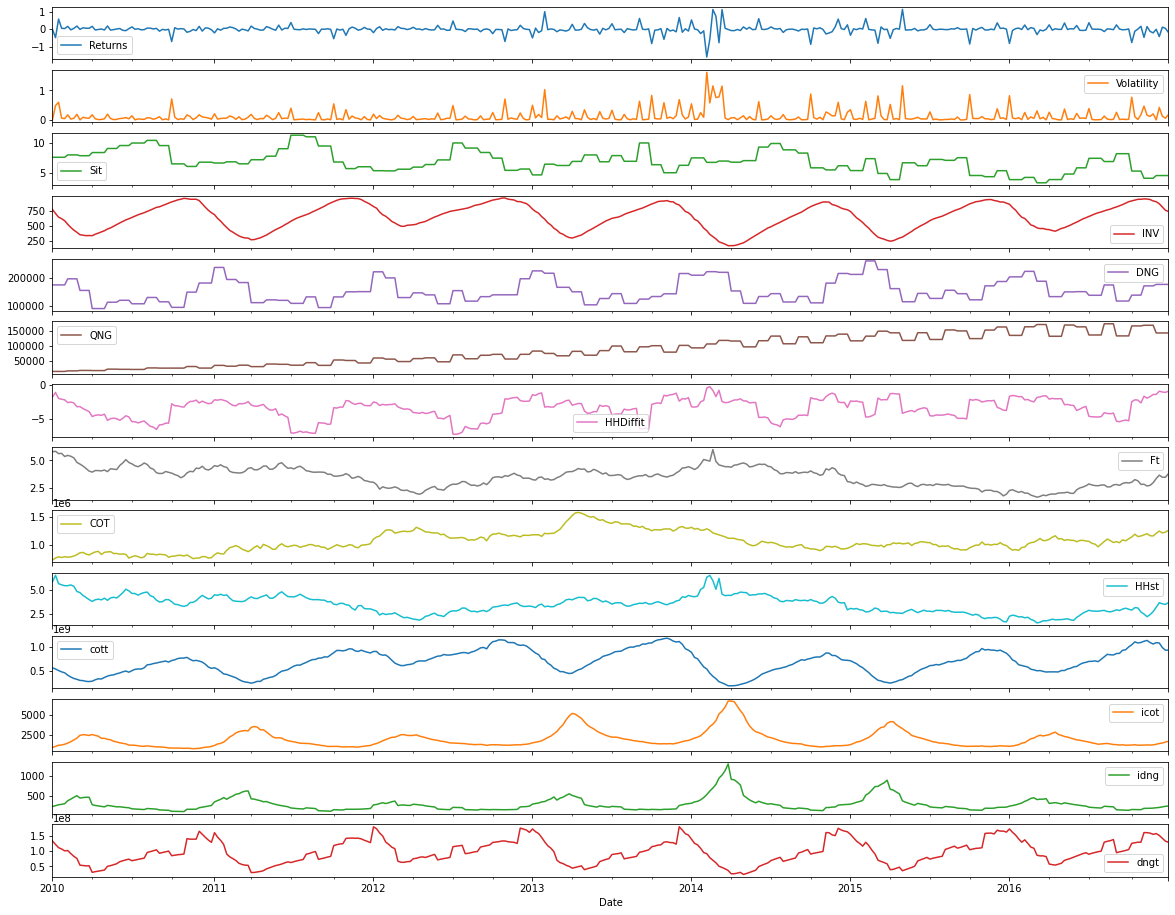

In [99]:
fds_East.plot(figsize=(20, 16), subplots=True)
plt.savefig("Eastern Node.png")
plt.show()

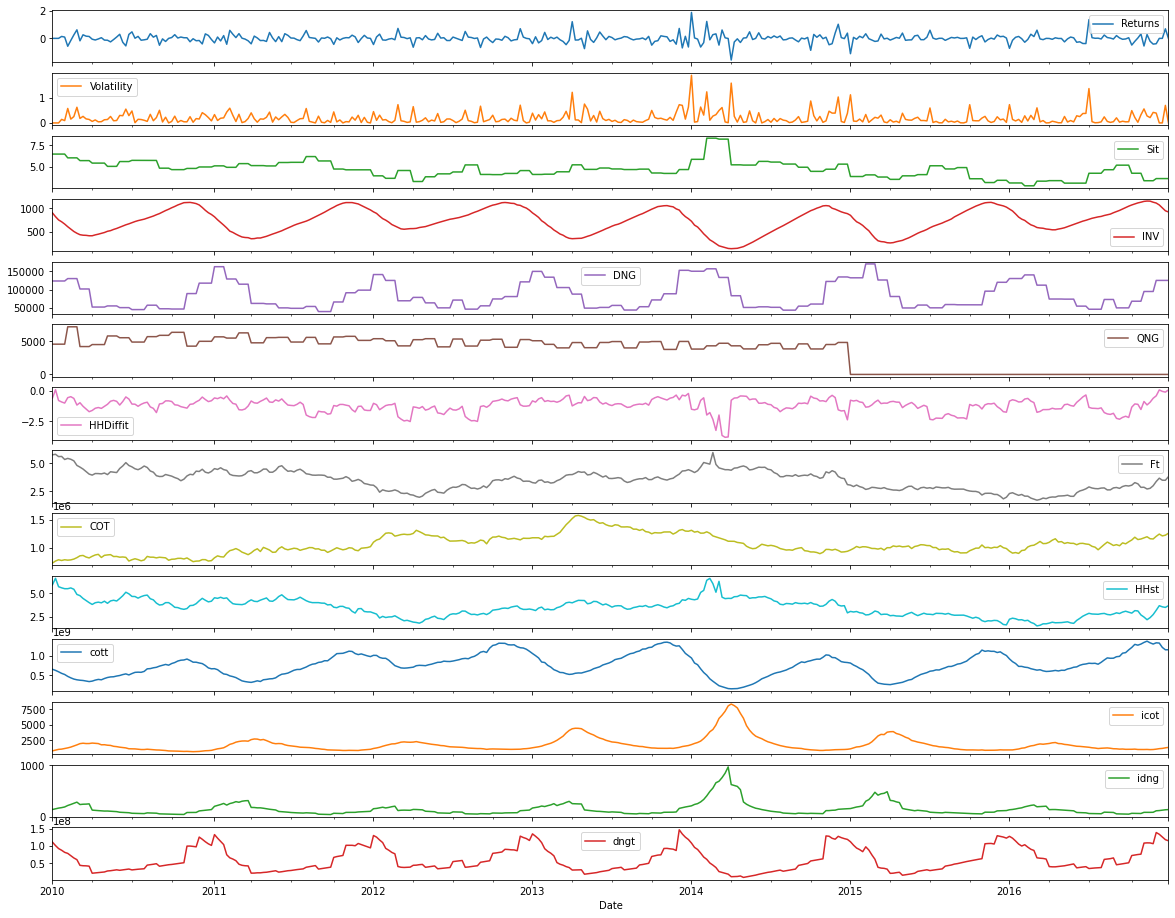

In [100]:
fds_Midwest.plot(figsize=(20, 16), subplots=True)
plt.savefig("Midwestern Node.png")
plt.show()

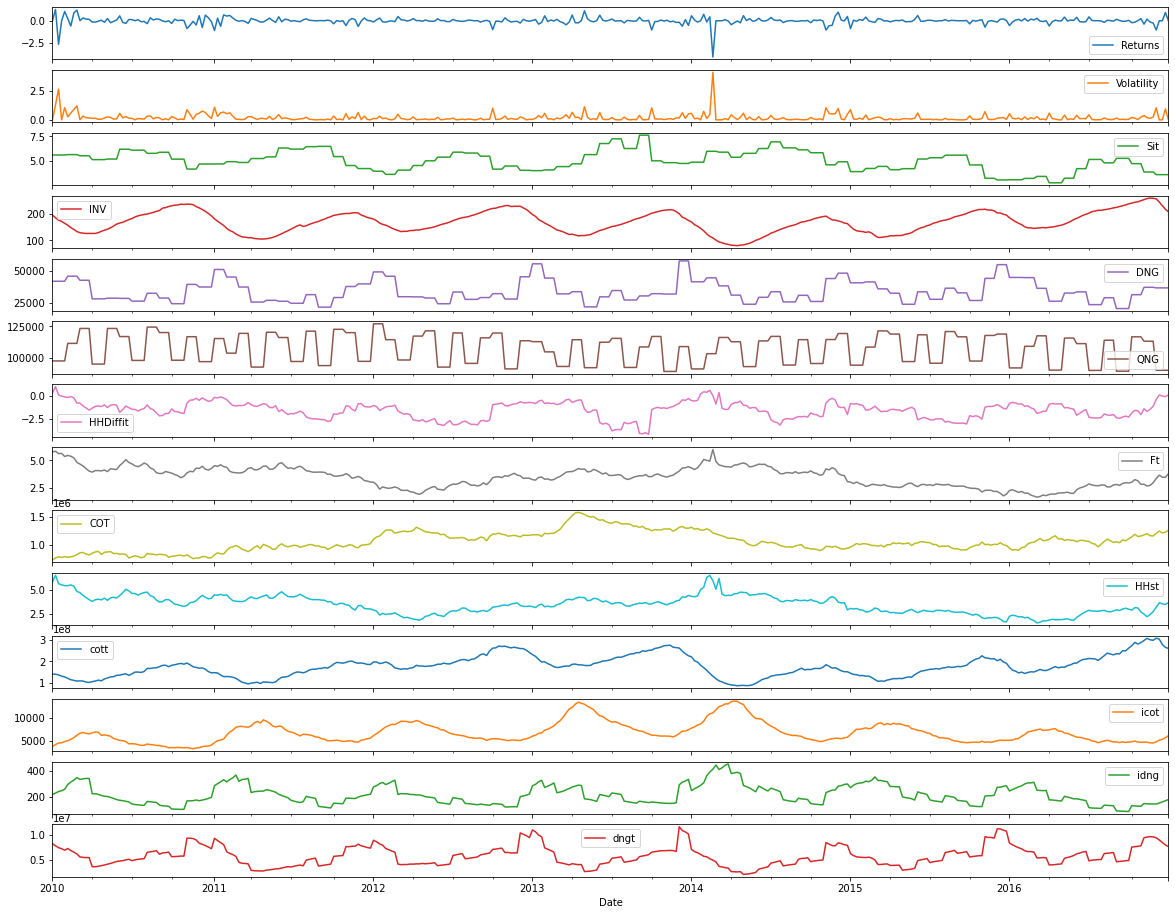

In [101]:
fds_Mountain.plot(figsize=(20, 16), subplots=True)
plt.savefig("Mountain Node.png")
plt.show()

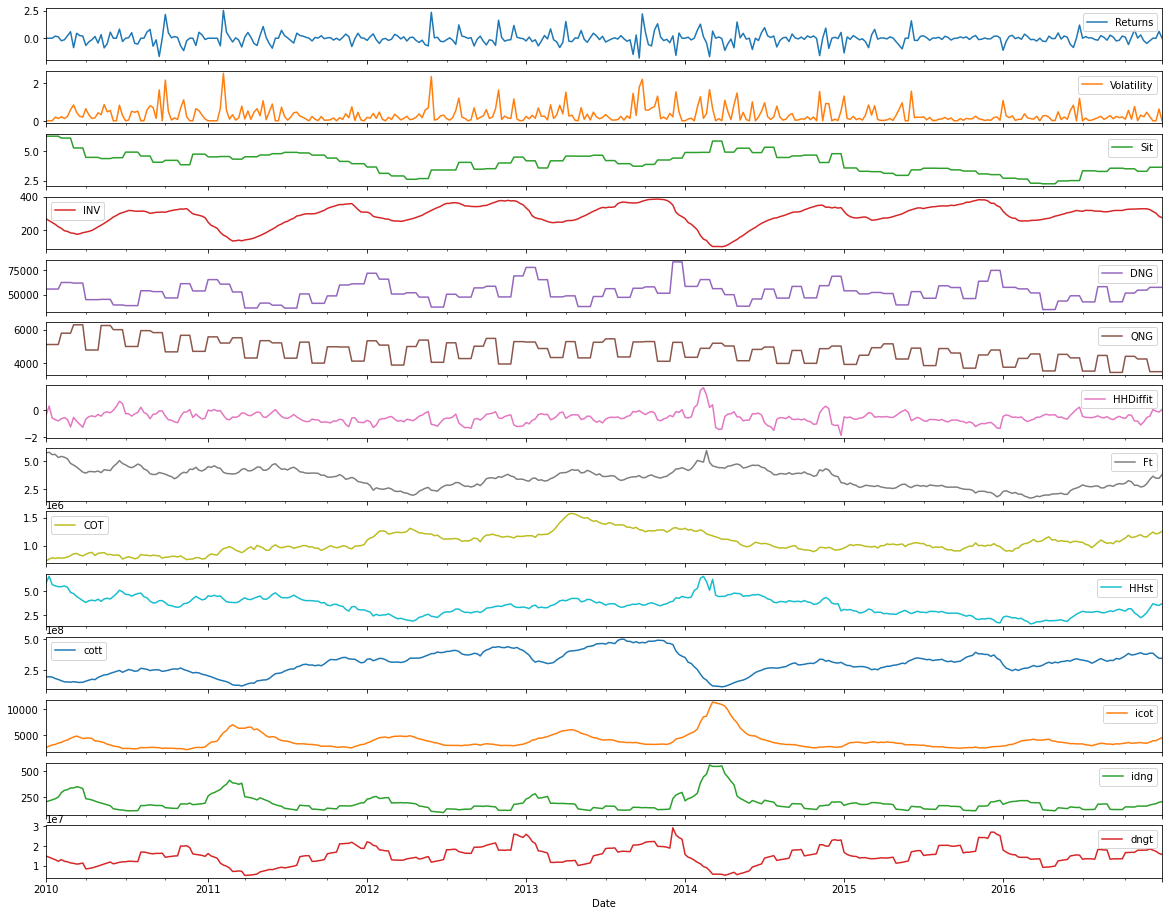

In [102]:
fds_Pacific.plot(figsize=(20, 16), subplots=True)
plt.savefig("Pacific Node.png")
plt.show()

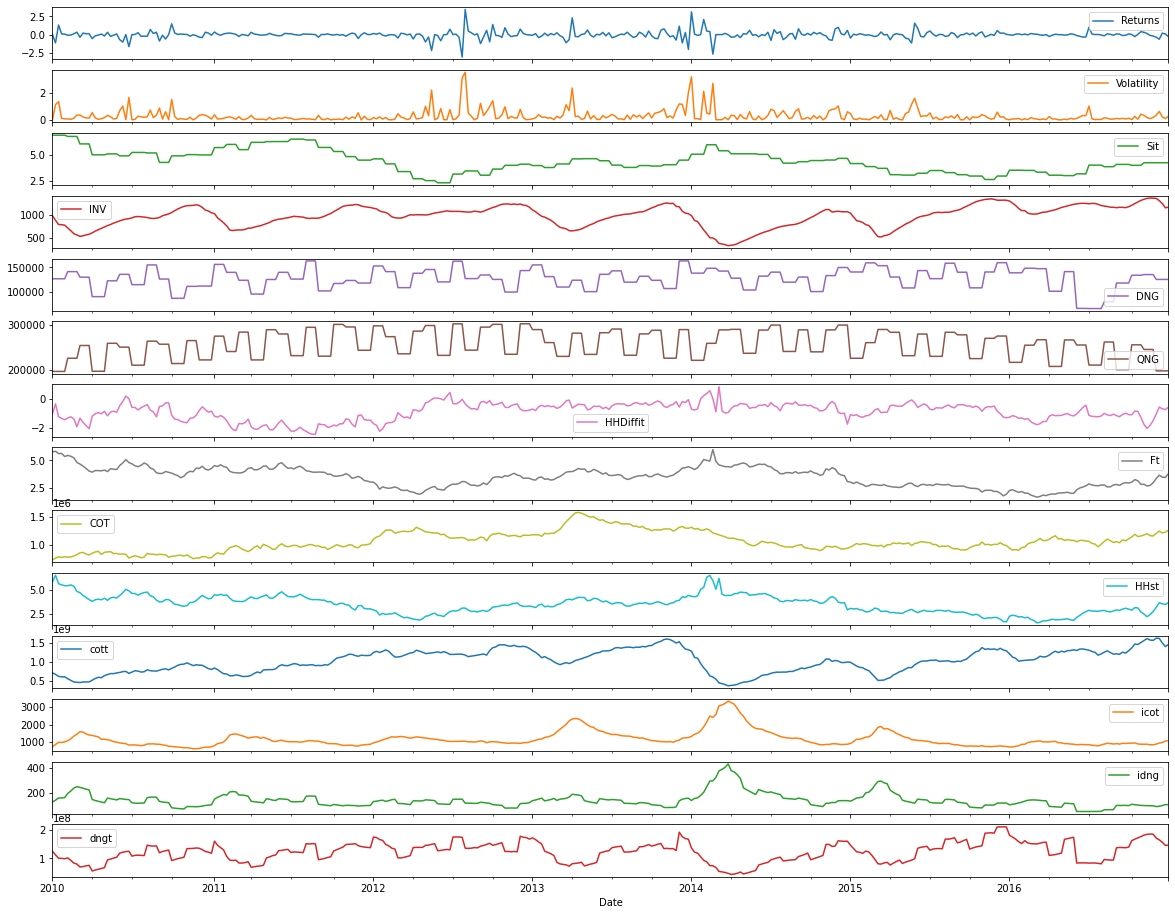

In [98]:
fds_SC.plot(figsize=(20, 16), subplots=True)
plt.savefig("South Central Node.png")
plt.show()

# End: Subplots

# End: Break the "df_FDS" into columns 

# Begin: Histogram of Nodes

In [103]:
node

East             366
Midwest          366
Mountain         366
Pacific          366
South Central    366
Name: Node, dtype: int64

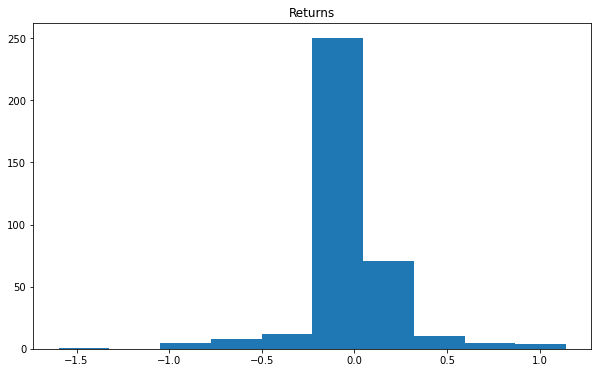

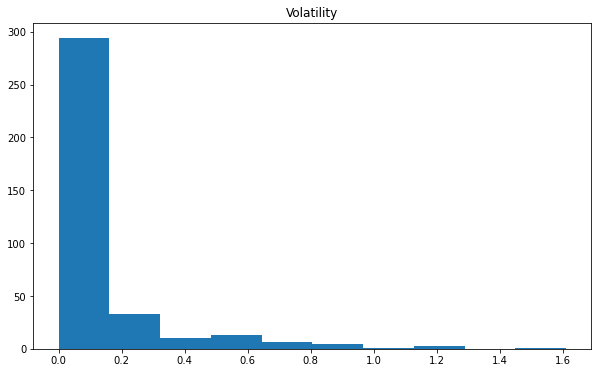

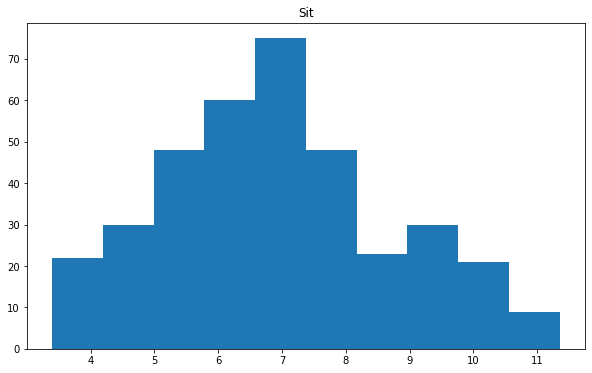

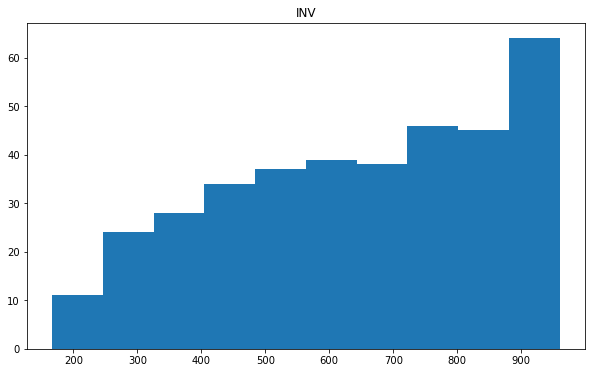

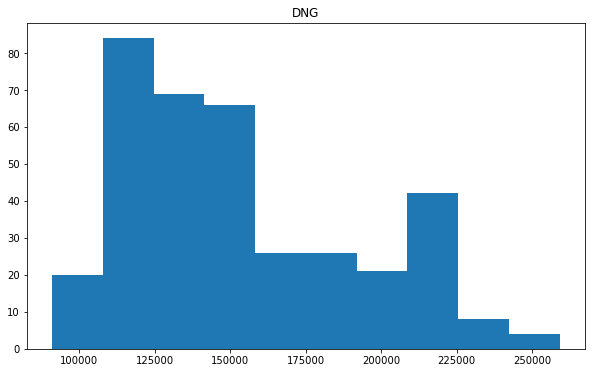

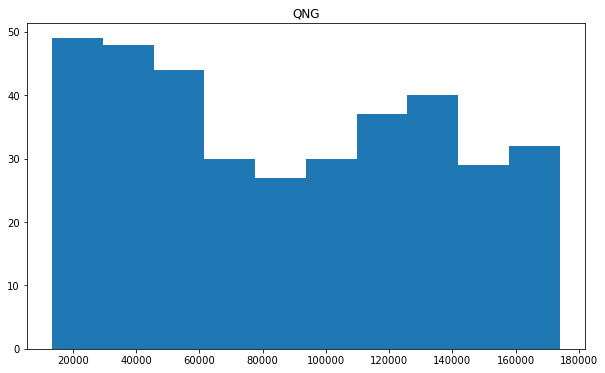

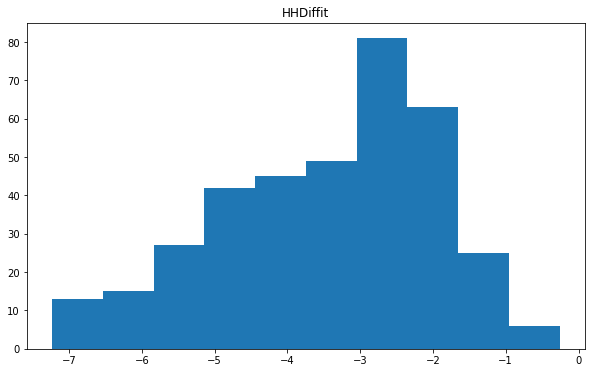

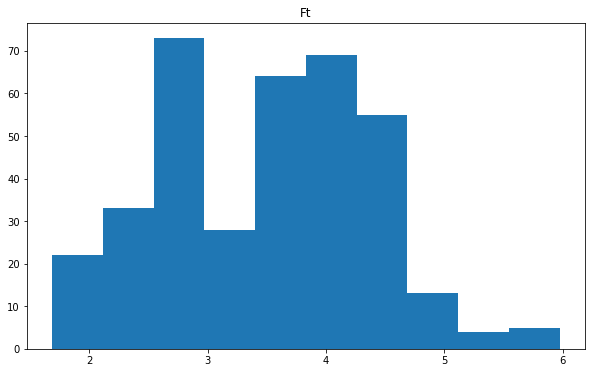

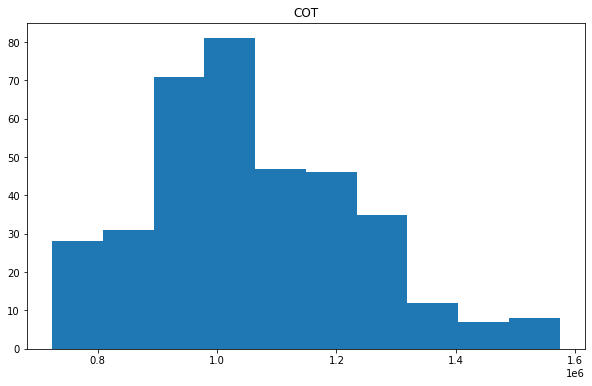

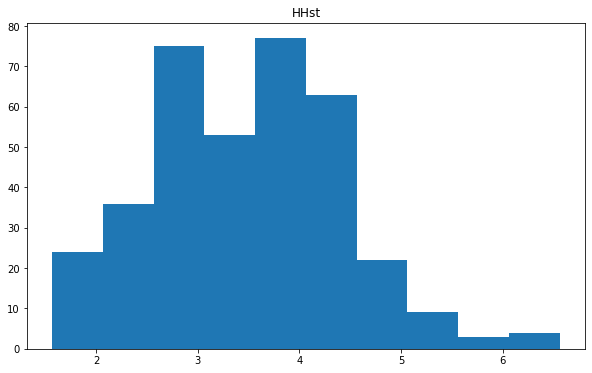

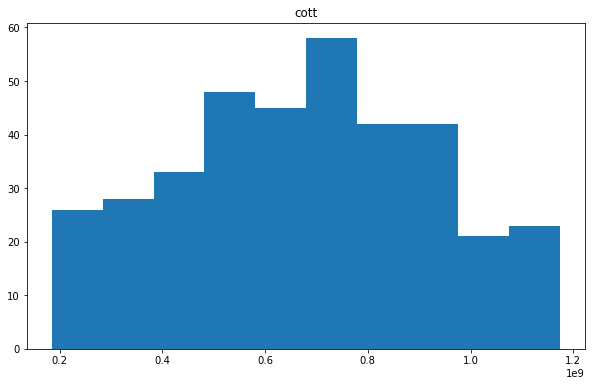

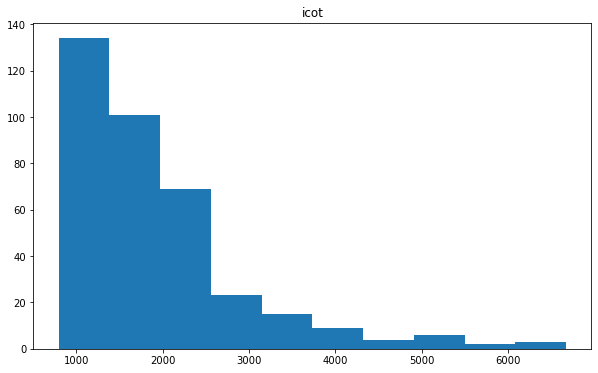

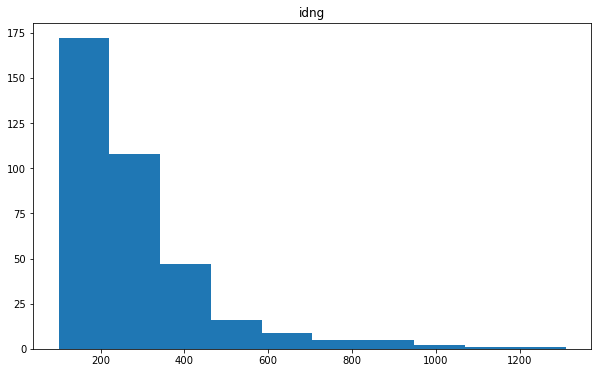

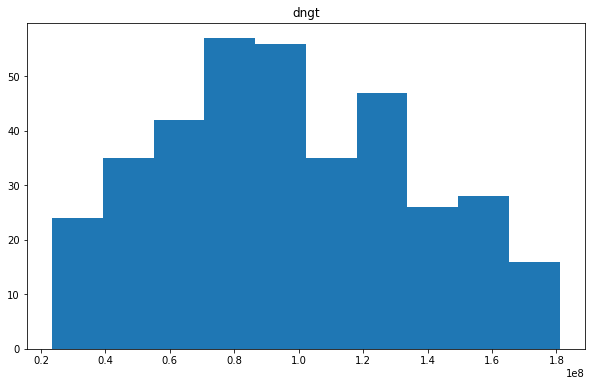

In [104]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_East[col])
    plt.title(col)
    plt.show()
    print()

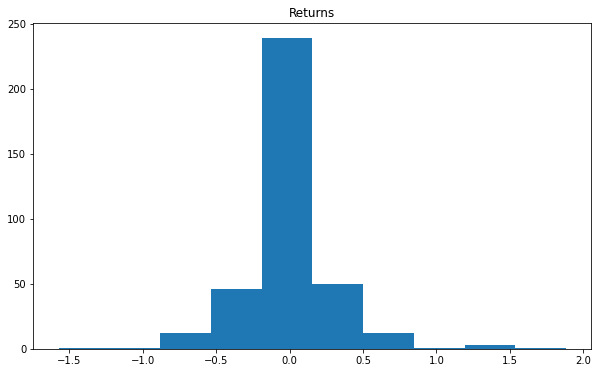

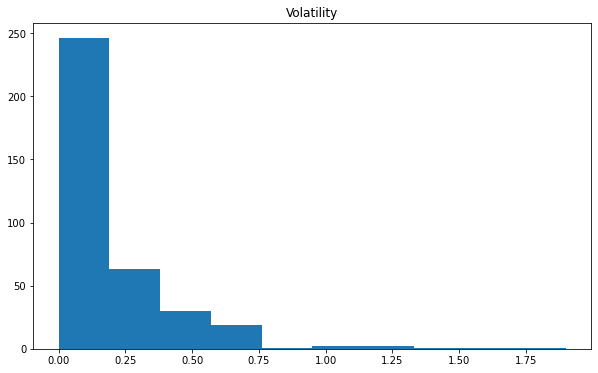

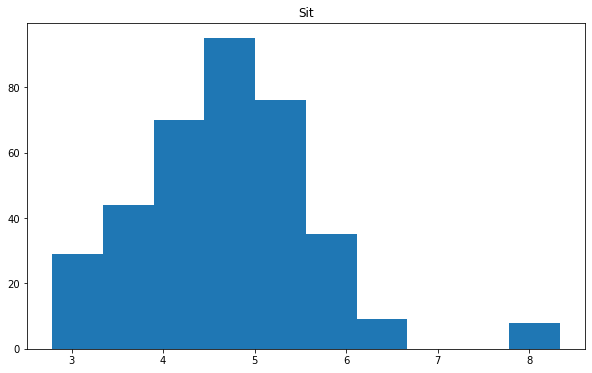

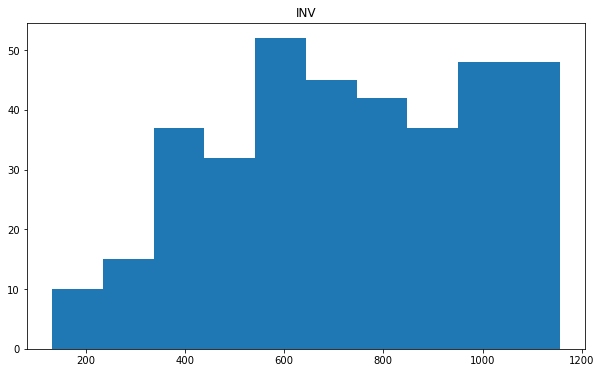

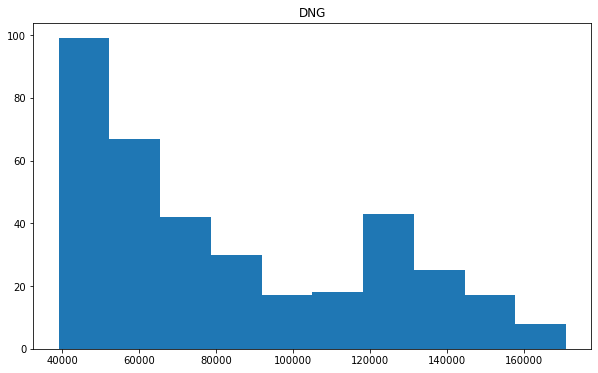

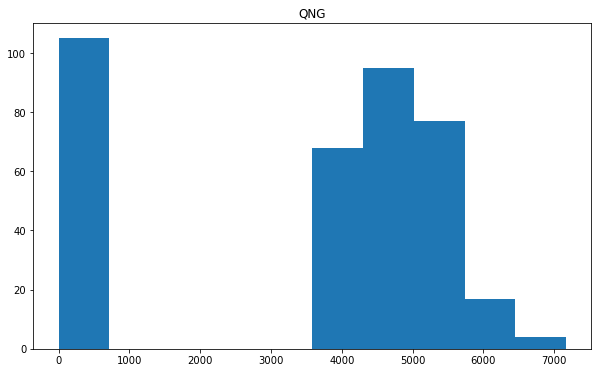

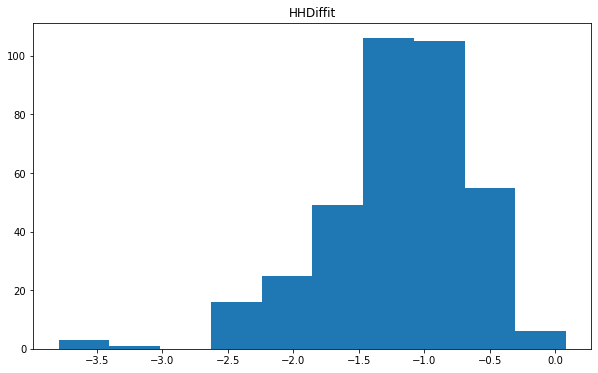

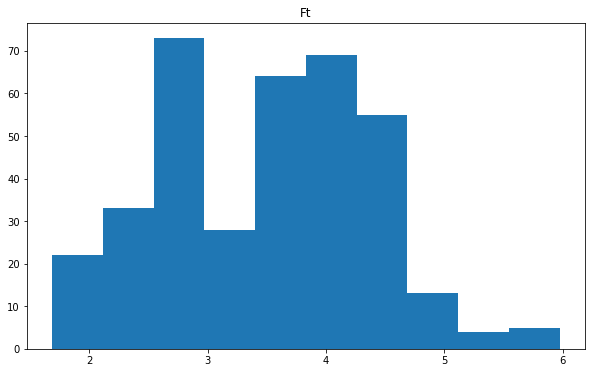

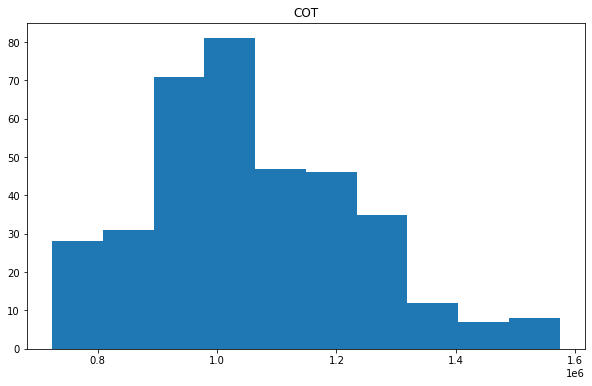

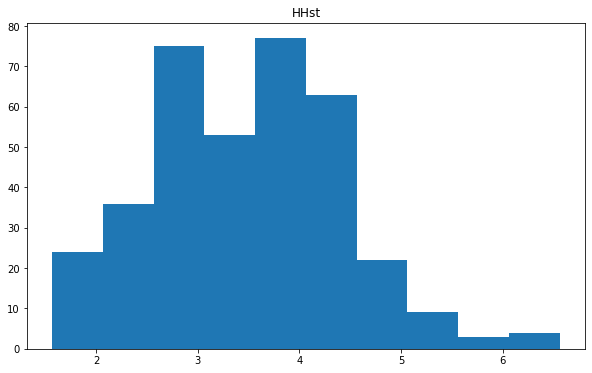

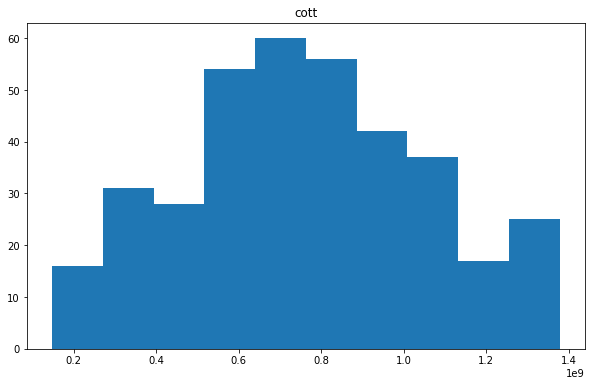

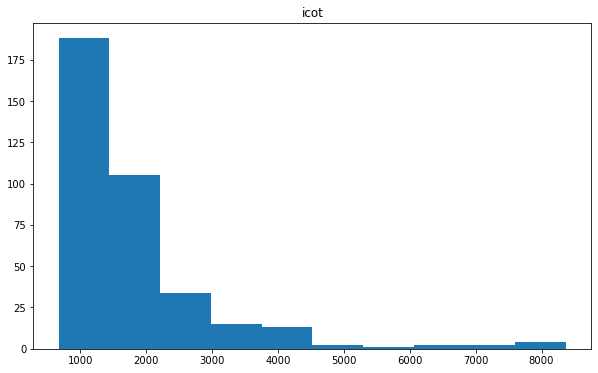

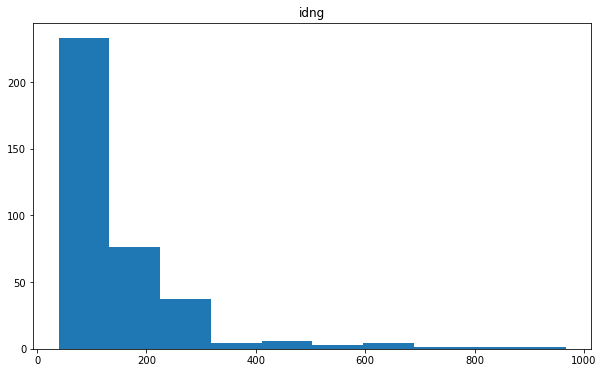

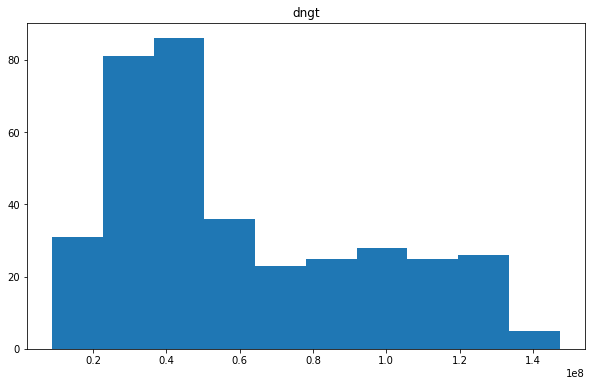

In [105]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Midwest[col])
    plt.title(col)
    plt.show()
    print()

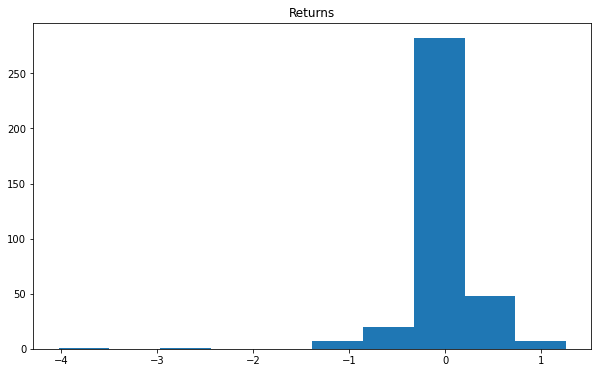

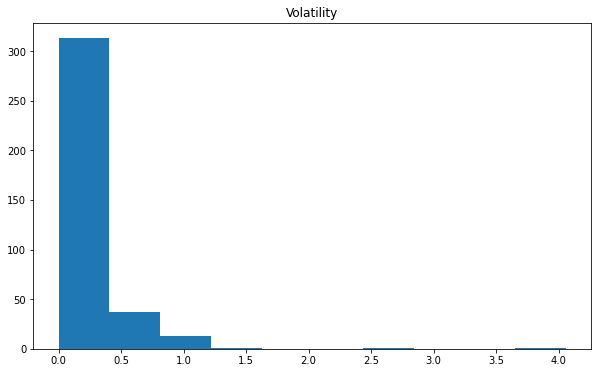

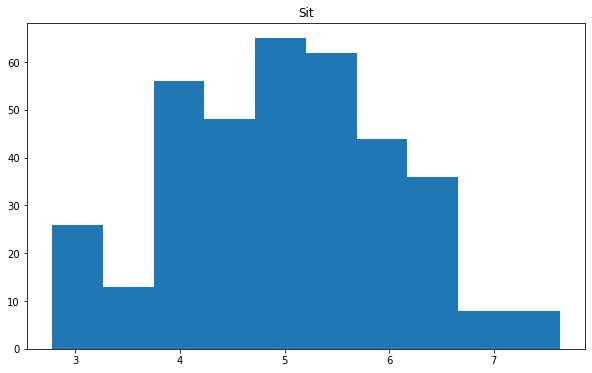

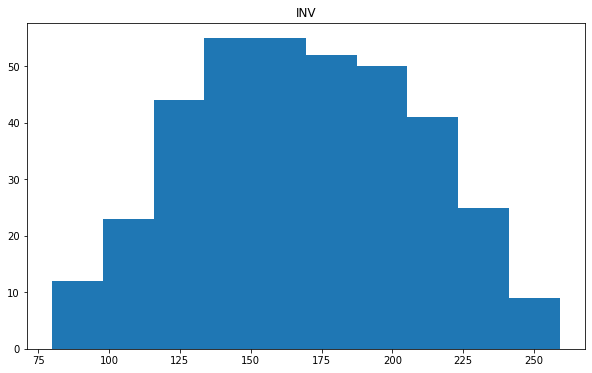

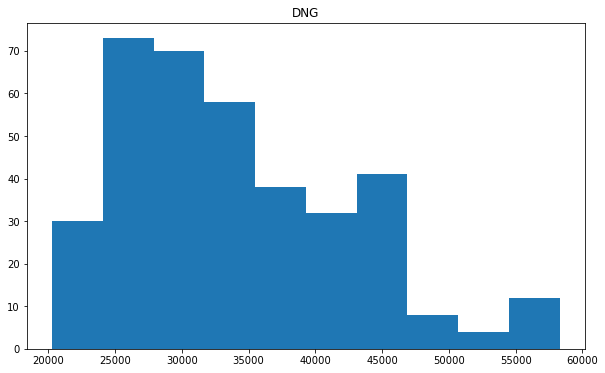

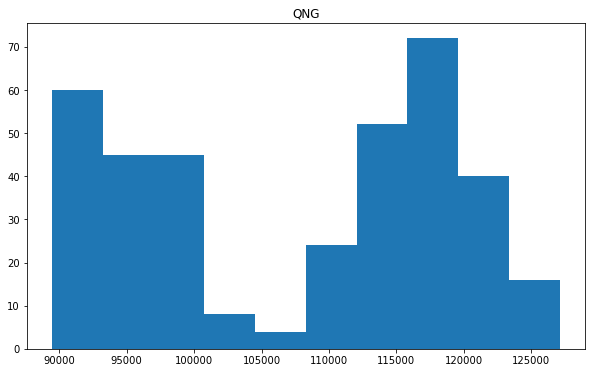

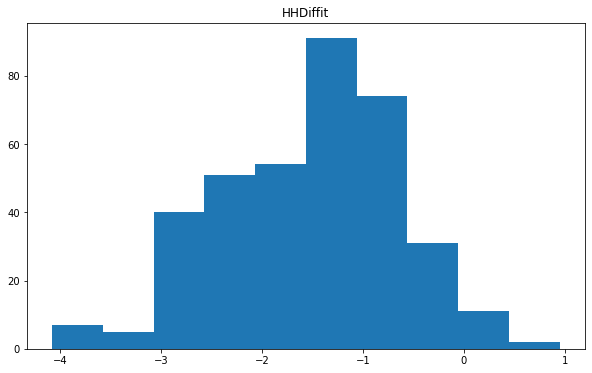

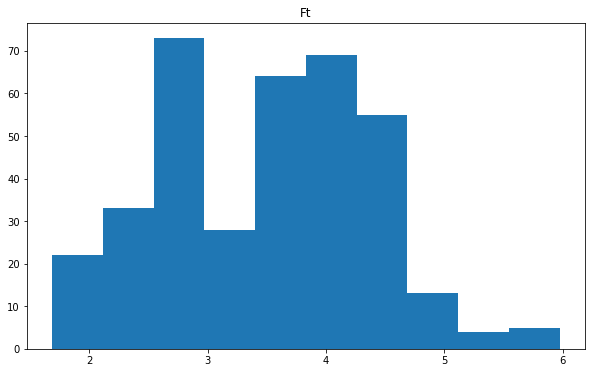

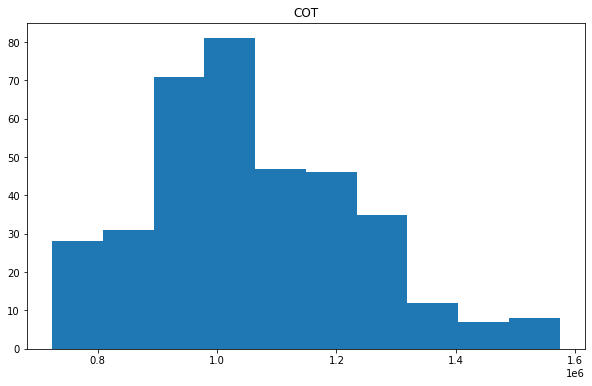

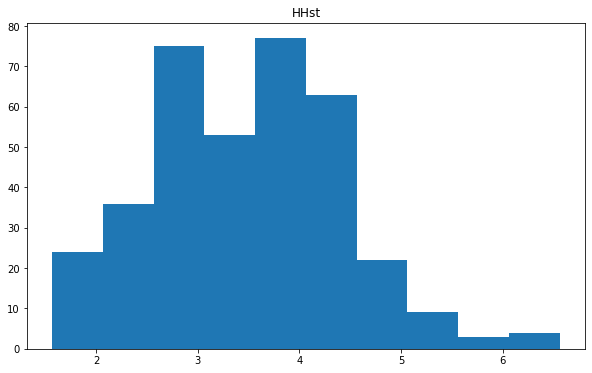

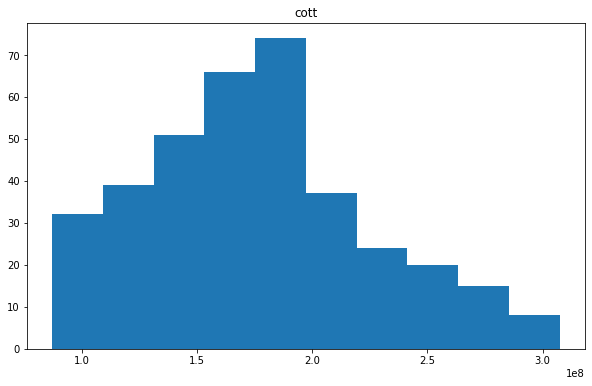

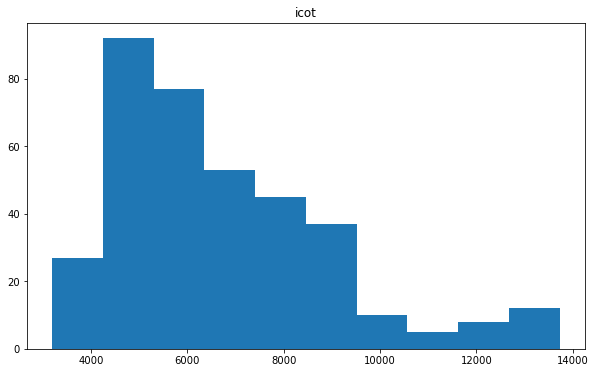

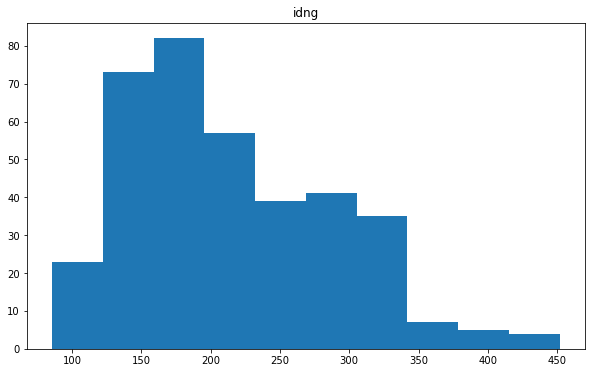

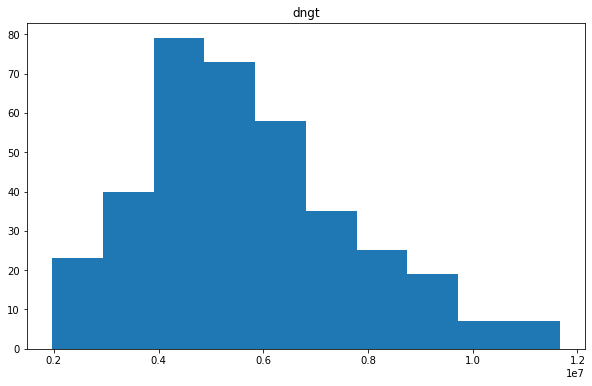

In [106]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Mountain[col])
    plt.title(col)
    plt.show()
    print()

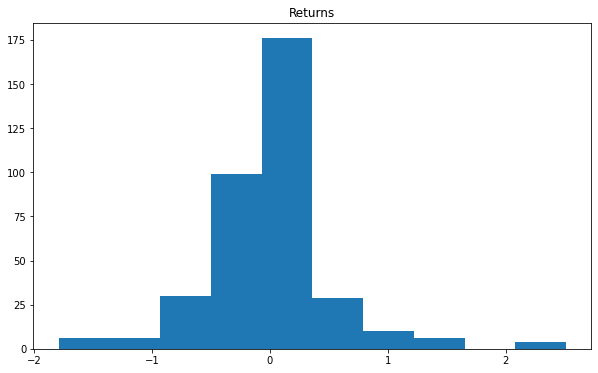

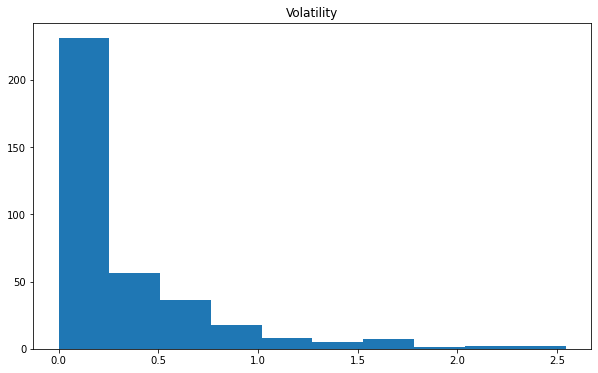

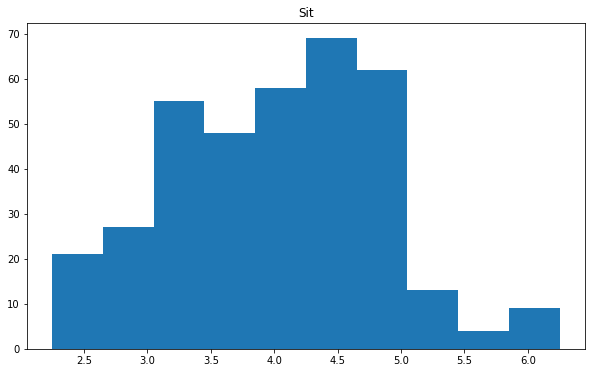

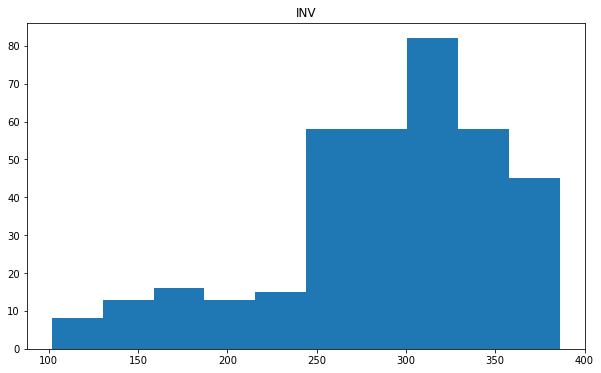

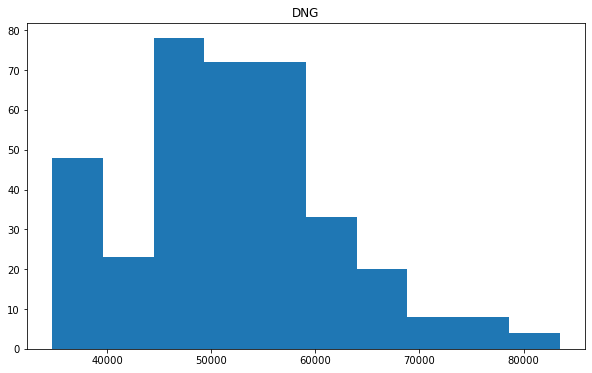

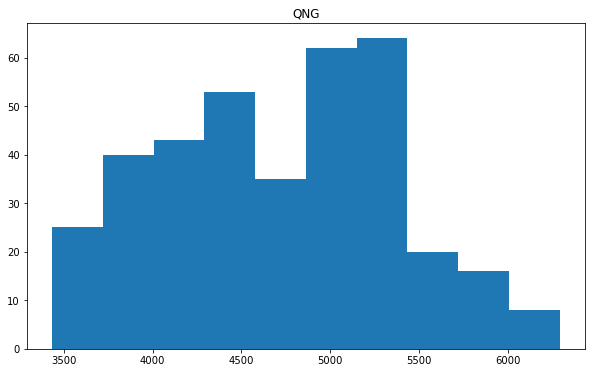

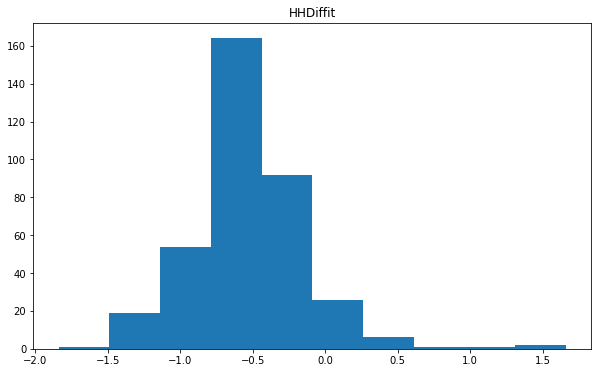

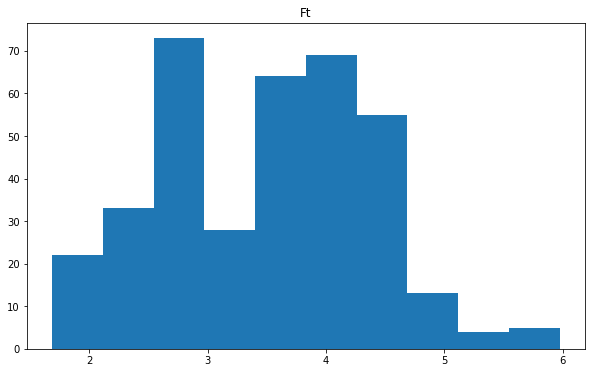

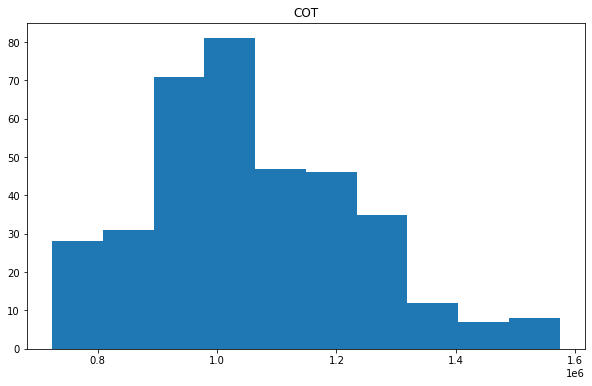

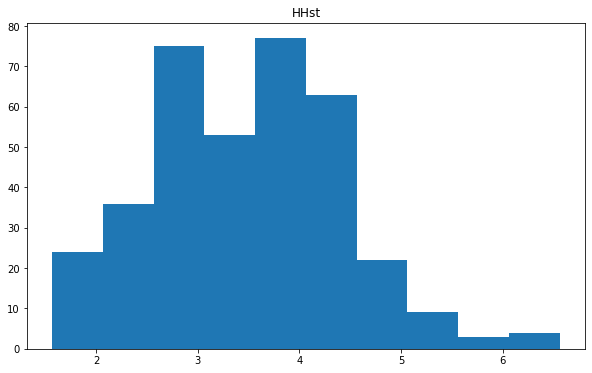

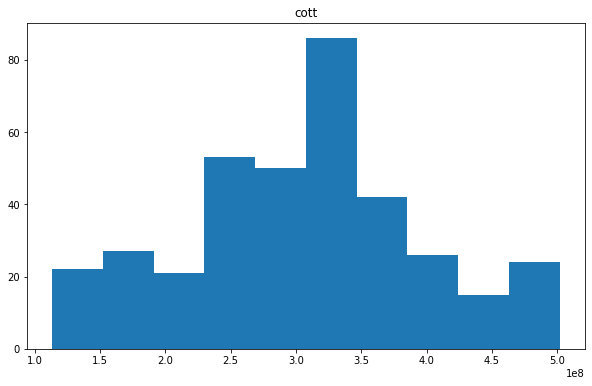

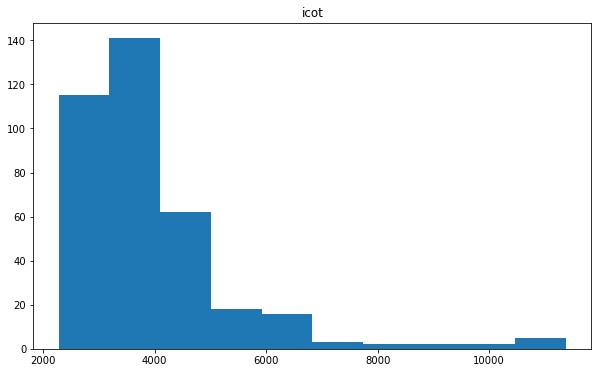

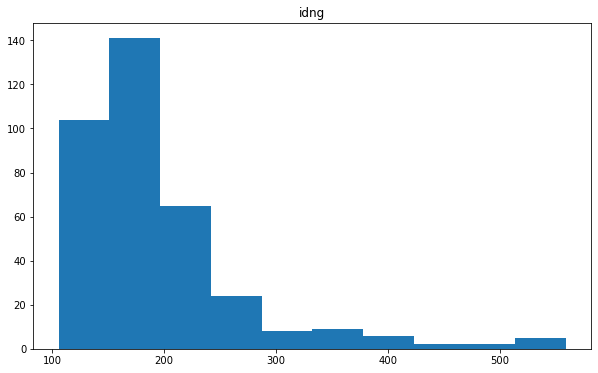

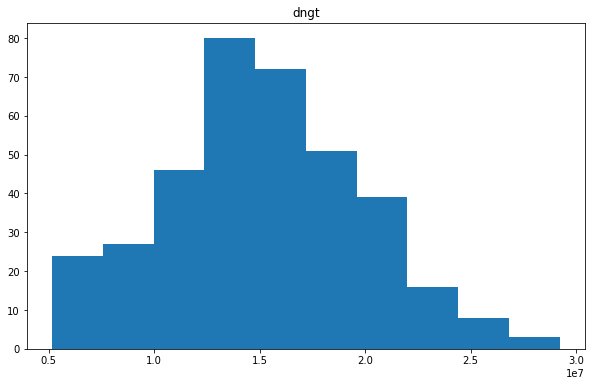

In [107]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_Pacific[col])
    plt.title(col)
    plt.show()
    print()

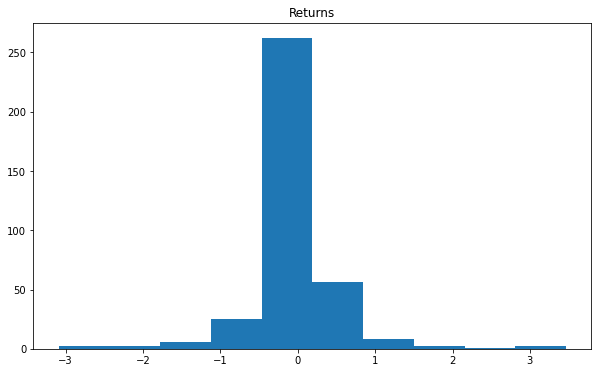

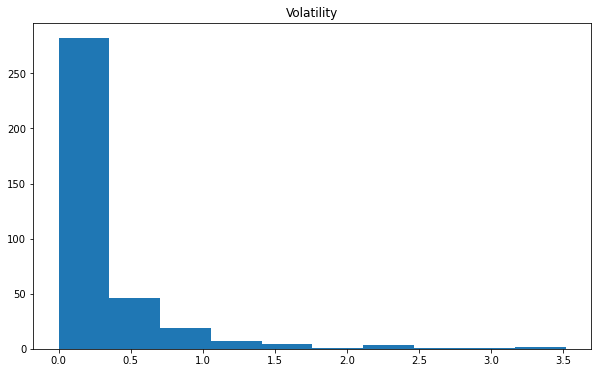

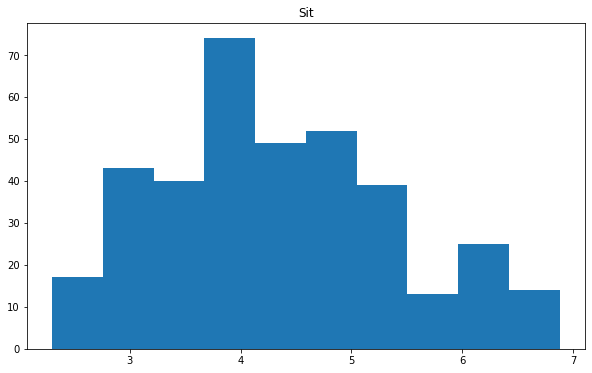

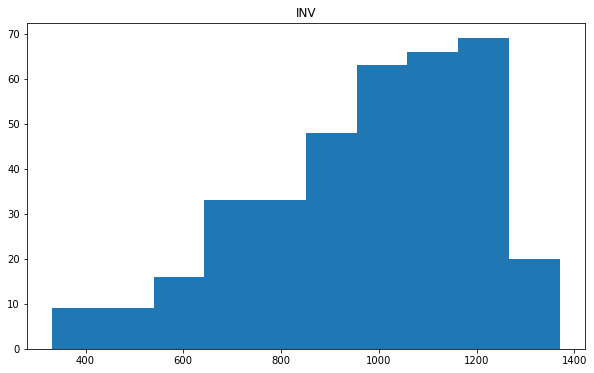

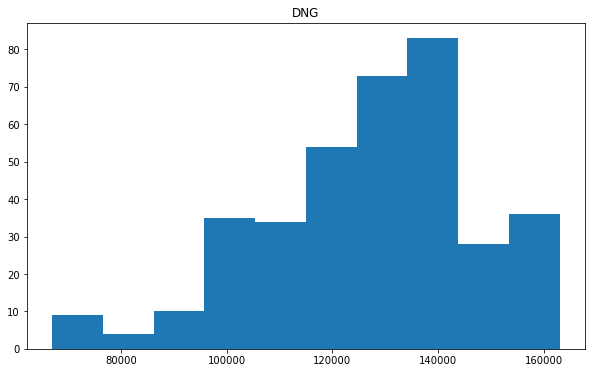

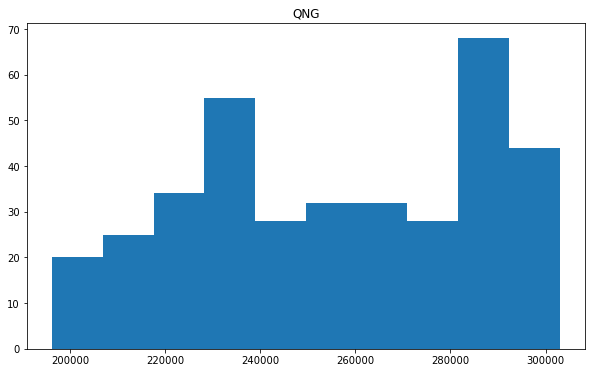

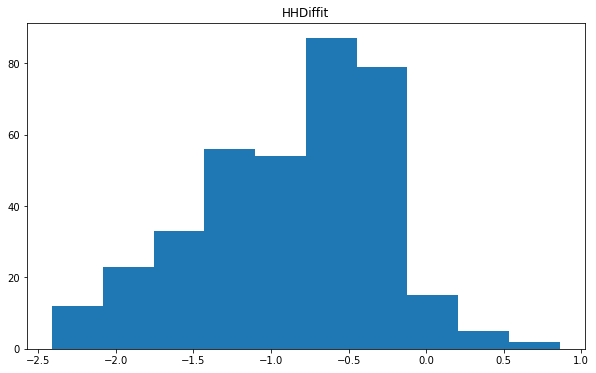

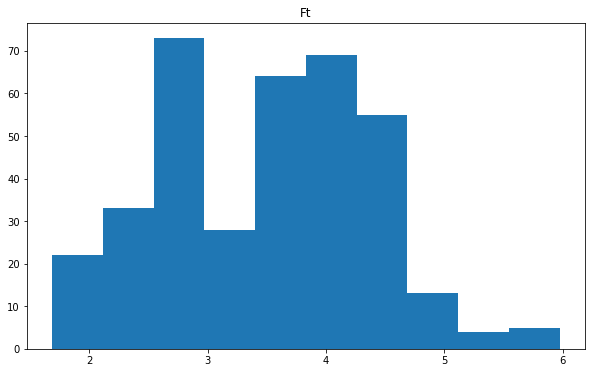

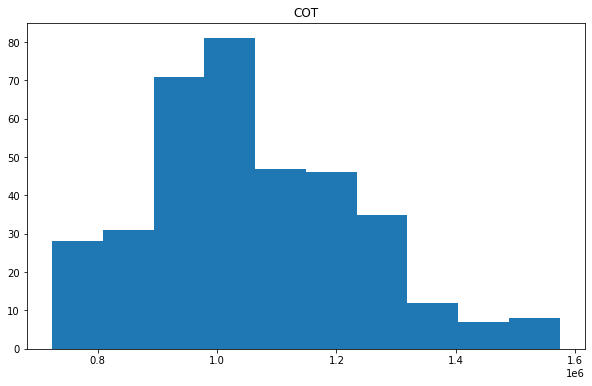

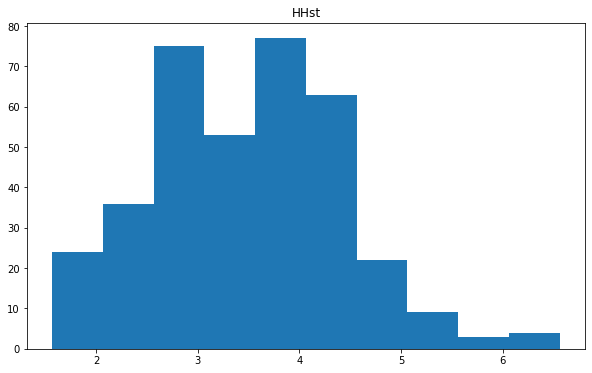

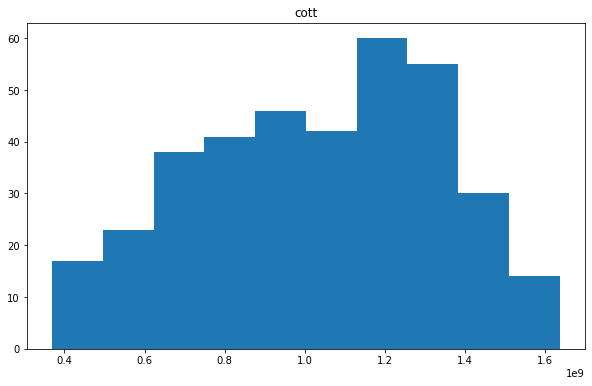

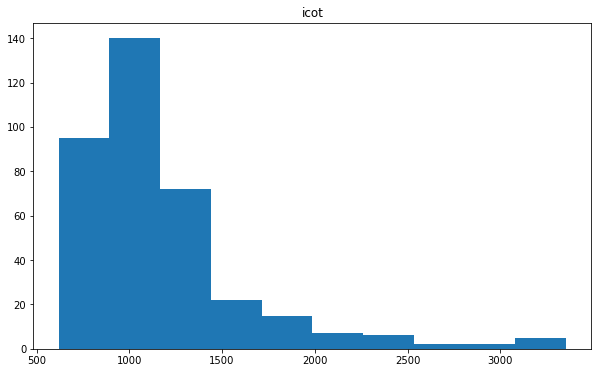

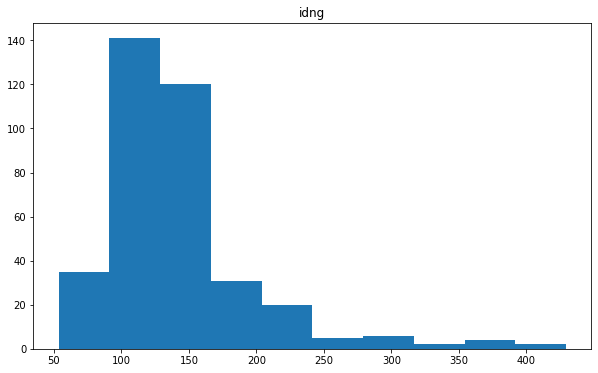

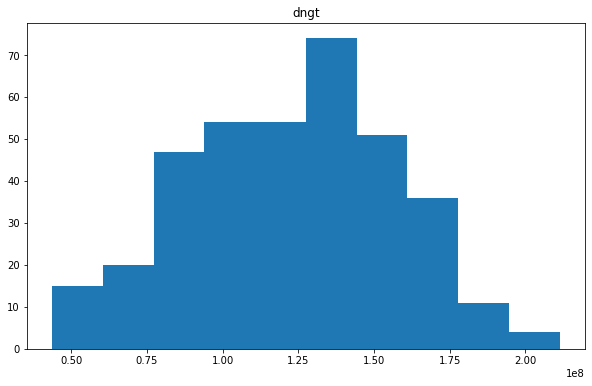

In [108]:
for col in cols_date:
    plt.figure(figsize=(10,6))
    plt.hist(fds_SC[col])
    plt.title(col)
    plt.show()
    print()

# End: Histogram of Nodes

# Begin: Line plots of Nodes

In [109]:
node

East             366
Midwest          366
Mountain         366
Pacific          366
South Central    366
Name: Node, dtype: int64

In [110]:
fds_East.describe()

Returns  Volatility         Sit         INV            DNG  \
count  366.000000  366.000000  366.000000  366.000000     366.000000   
mean    -0.001803    0.124430    6.959399  643.286885  152808.677596   
std      0.246127    0.215037    1.775059  215.518749   39200.012165   
min     -1.596309    0.000000    3.400000  167.000000   91133.000000   
25%     -0.039512    0.017746    5.677500  468.500000  121722.500000   
50%      0.000000    0.042248    6.870000  662.000000  143668.000000   
75%      0.046308    0.119048    8.022500  836.750000  181102.025000   
max      1.142737    1.610057   11.350000  960.000000  259140.250000   

                 QNG    HHDiffit          Ft           COT        HHst  \
count     366.000000  366.000000  366.000000  3.660000e+02  366.000000   
mean    86671.005464   -3.471421    3.493694  1.055391e+06    3.487978   
std     48377.842786    1.503977    0.873156  1.751522e+05    0.937066   
min     13475.000000   -7.230000    1.687000  7.240870e+05    1.570000   
25%     41924.200000   -4.475000    2.773000  9.493555e+05    2.790000   
50%     81122.500000   -3.180000    3.611500  1.019501e+06    3.540000   
75%    132187.387500   -2.342500    4.167250  1.174931e+06    4.150000   
max    173862.750000   -0.260000    5.975000  1.573733e+06    6.560000   

               cott         icot         idng          dngt  
count  3.660000e+02   366.000000   366.000000  3.660000e+02  
mean   6.755678e+08  1934.384238   282.401225  9.731731e+07  
std    2.449250e+08  1038.406048   173.915042  3.872576e+07  
min    1.859091e+08   796.924468    99.804188  2.354869e+07  
25%    4.902404e+08  1235.966349   163.948192  6.898085e+07  
50%    6.865678e+08  1578.007302   227.676694  9.388335e+07  
75%    8.640297e+08  2318.361975   323.581444  1.287942e+08  
max    1.173169e+09  6667.293413  1310.914671  1.809858e+08

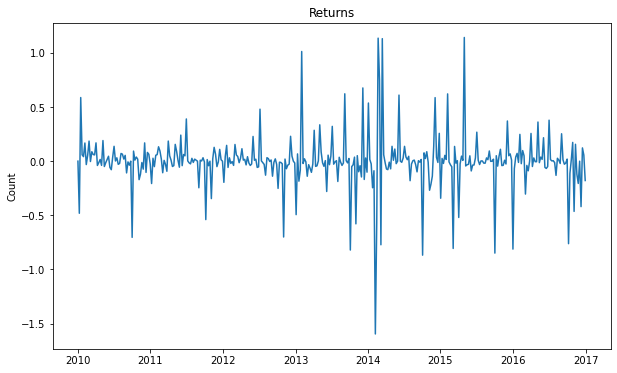

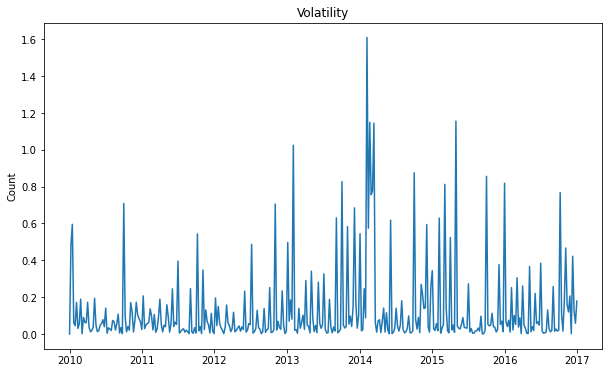

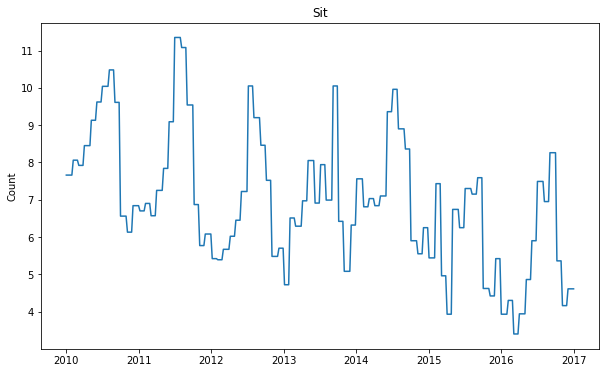

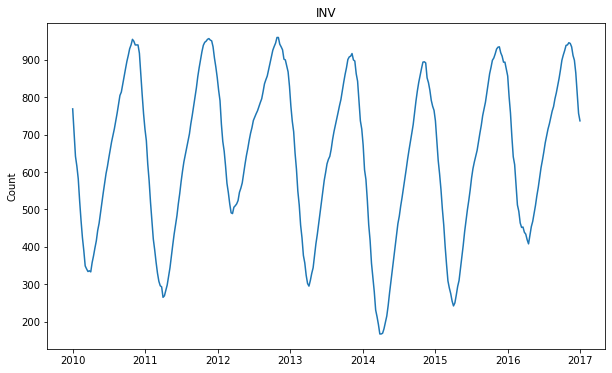

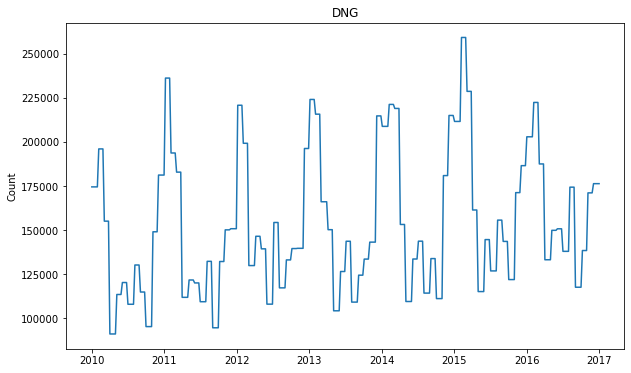

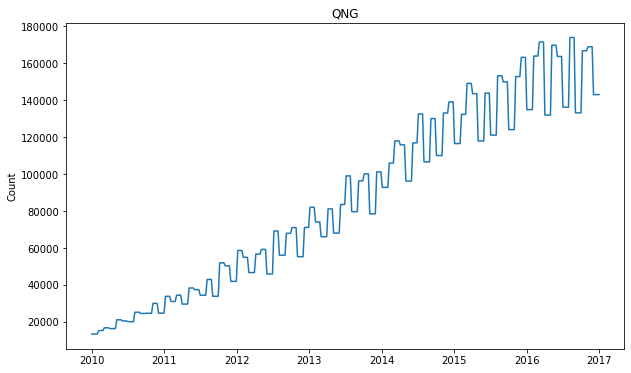

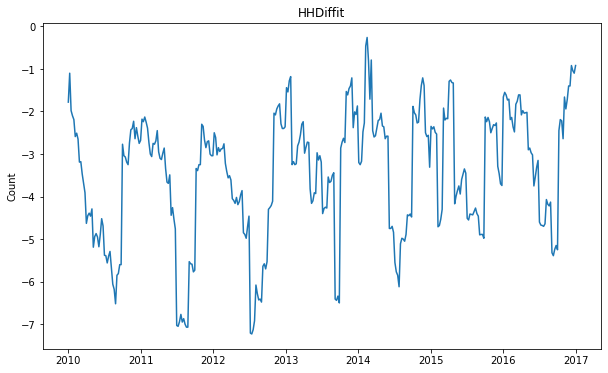

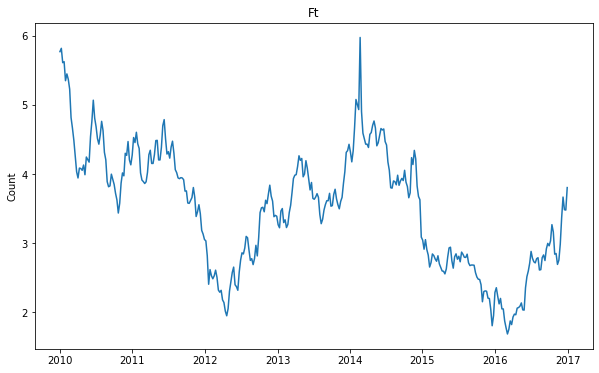

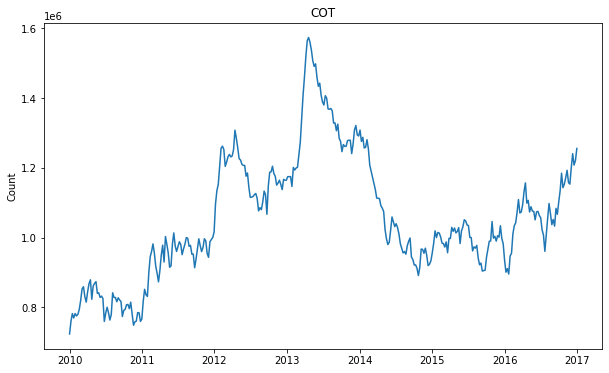

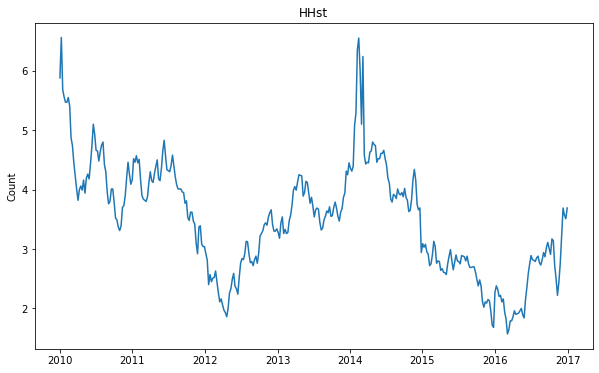

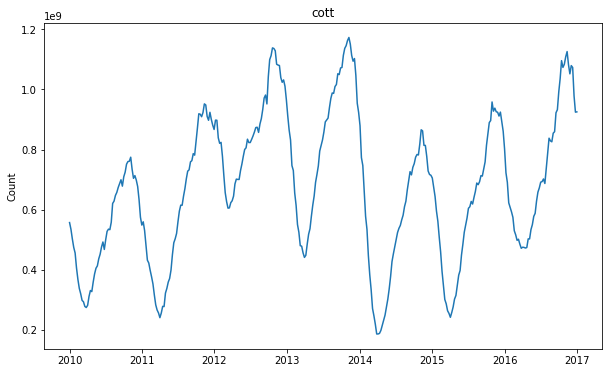

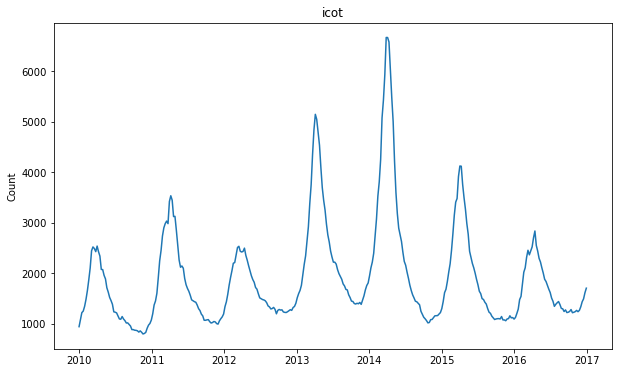

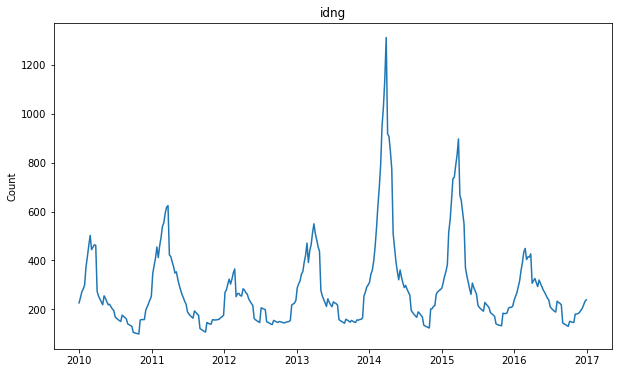

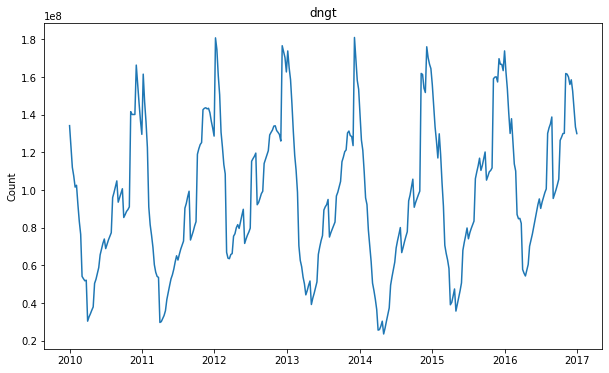

In [111]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_East[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

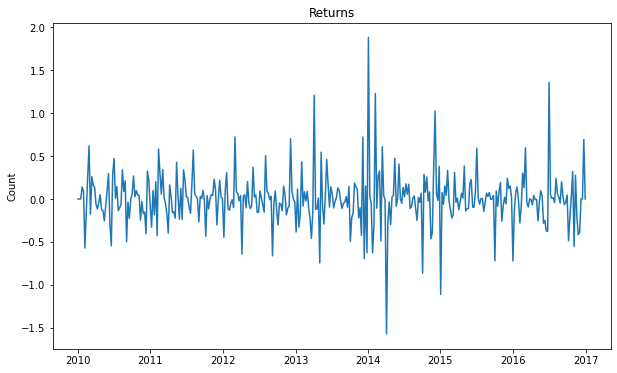

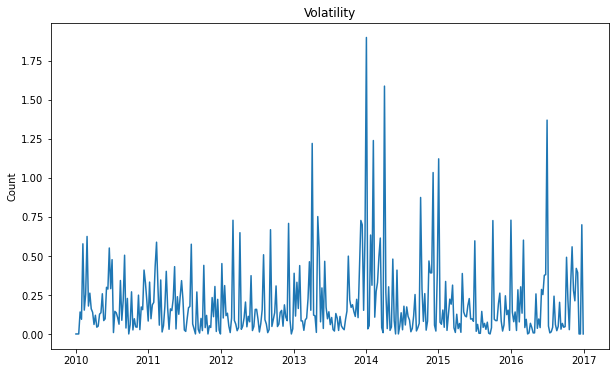

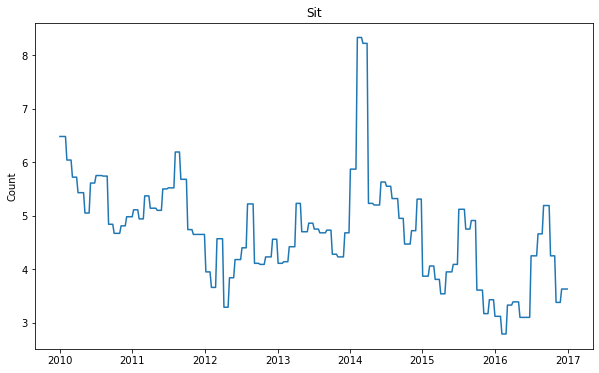

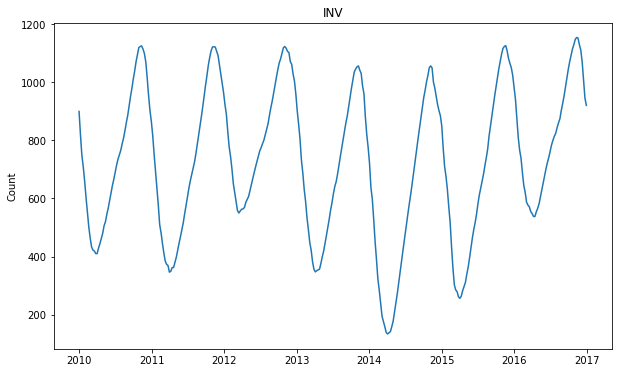

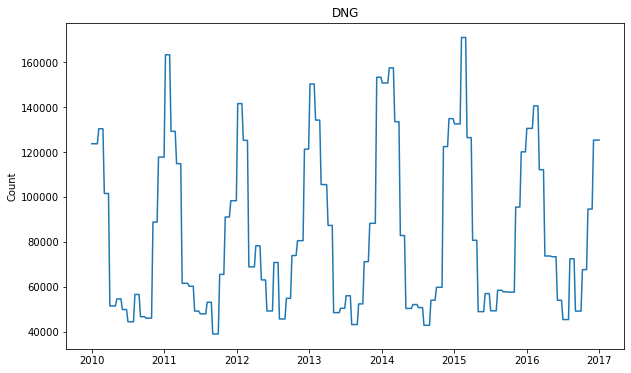

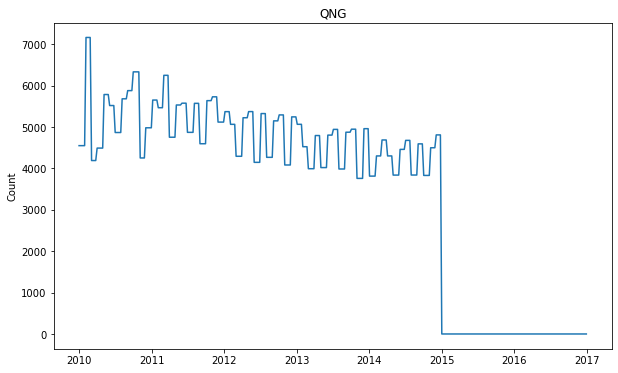

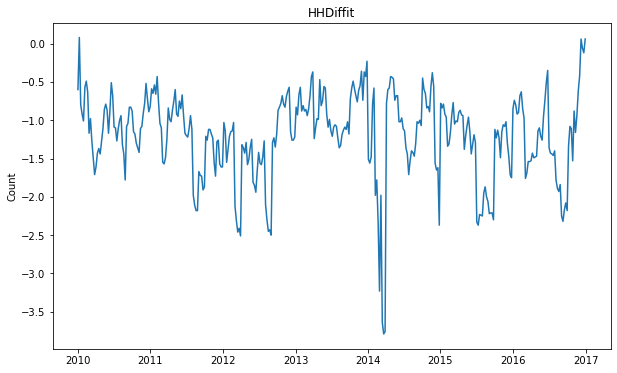

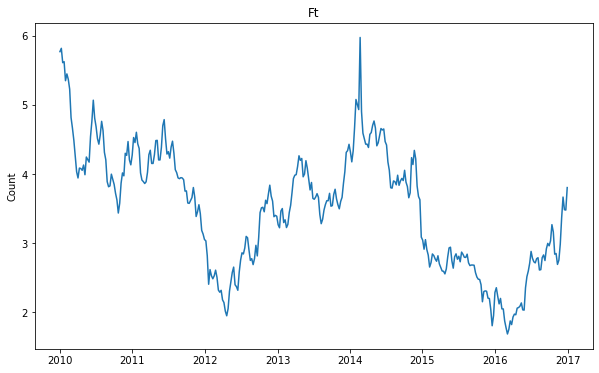

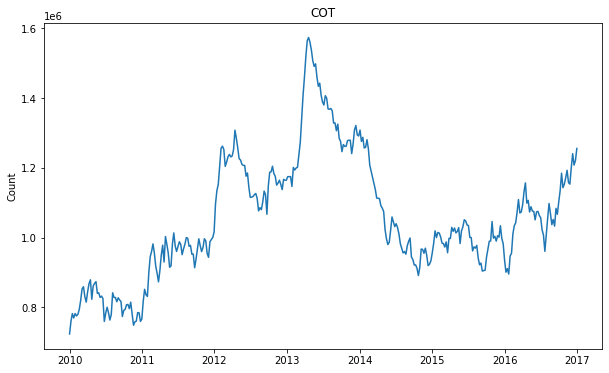

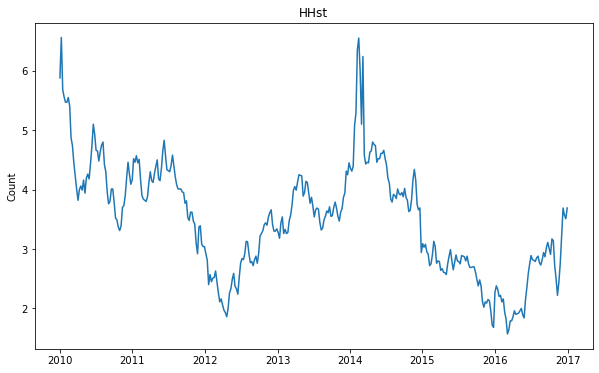

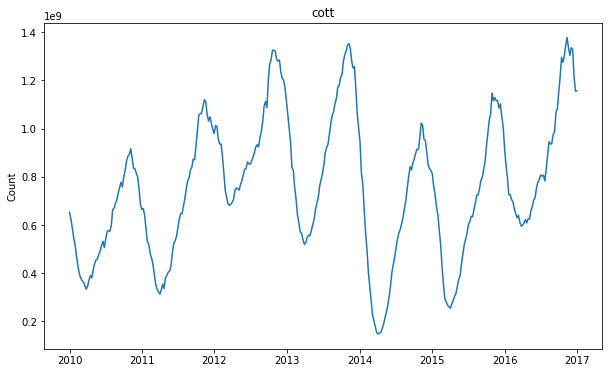

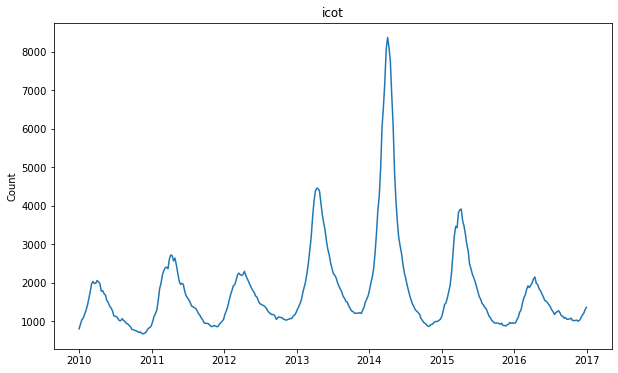

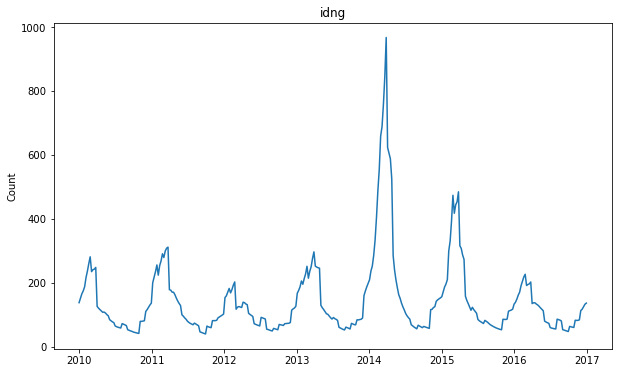

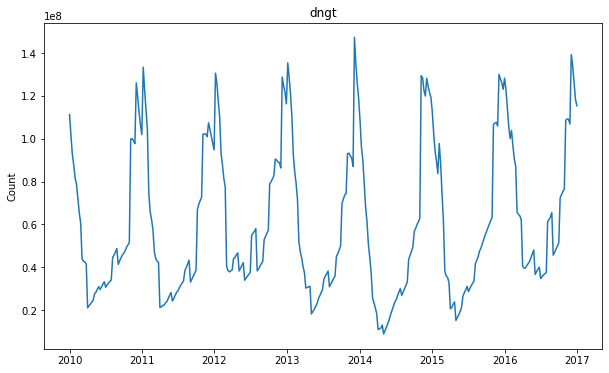

In [112]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Midwest[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

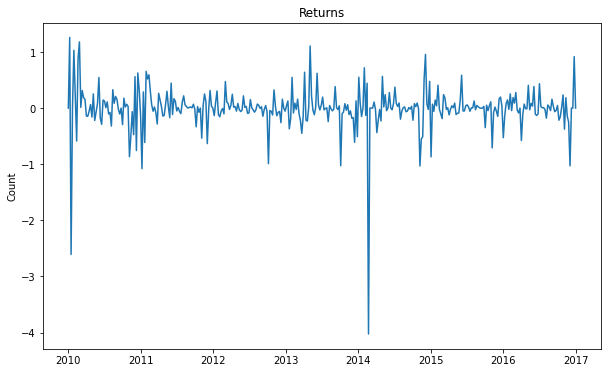

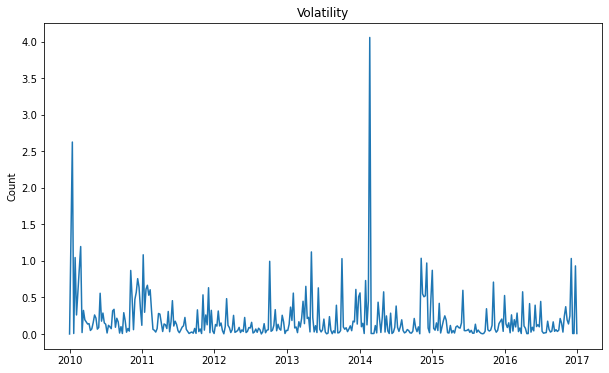

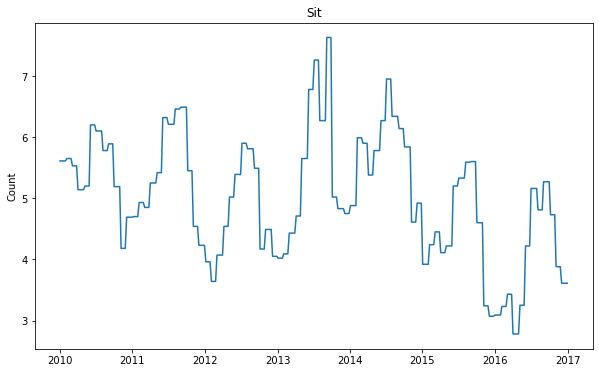

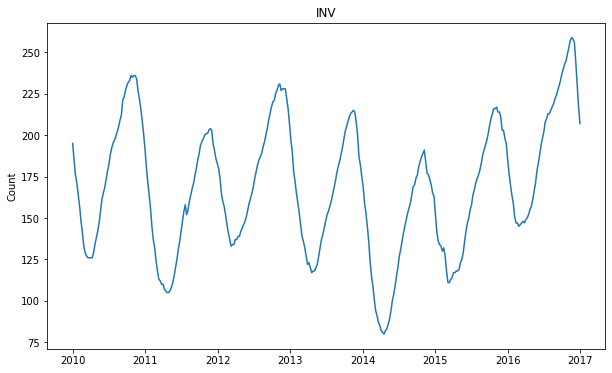

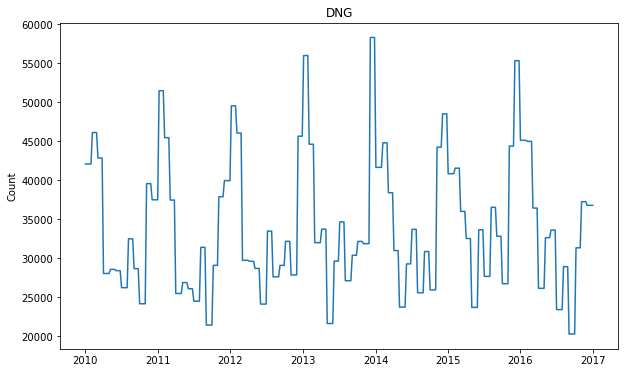

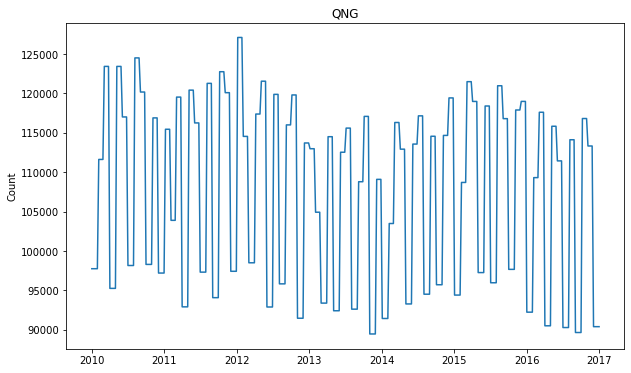

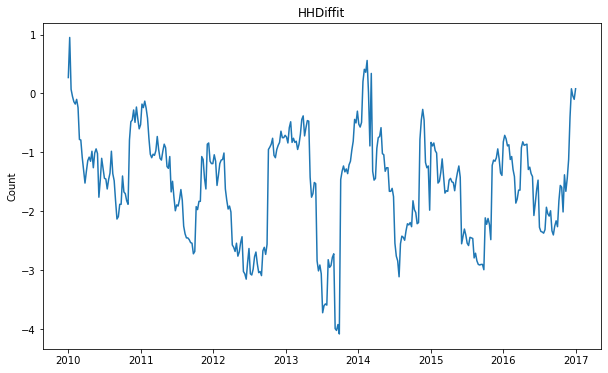

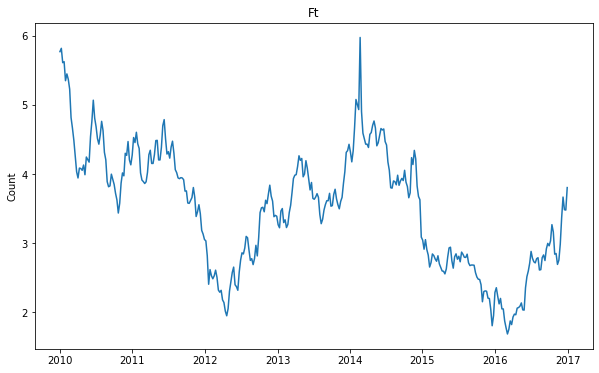

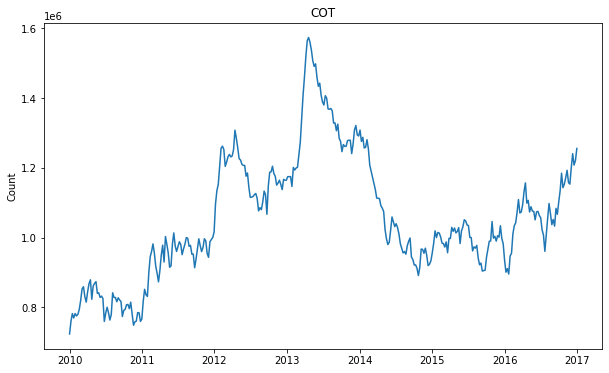

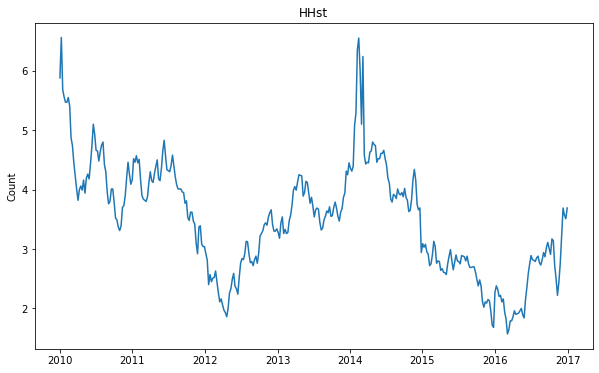

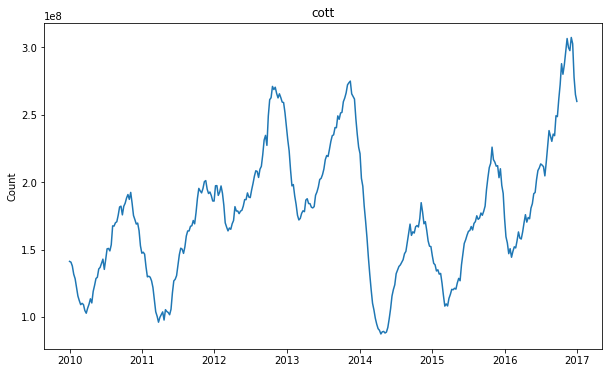

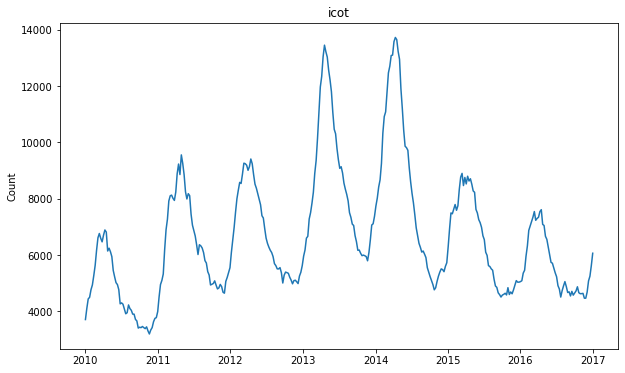

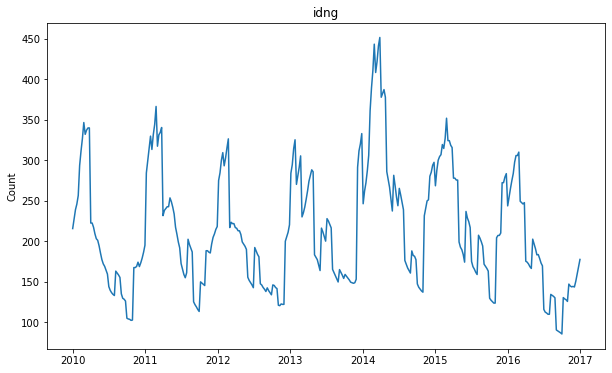

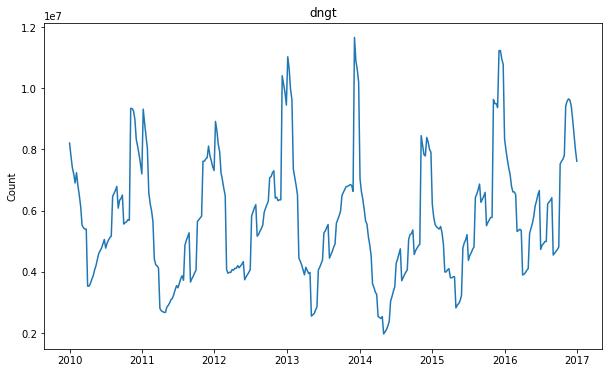

In [113]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Mountain[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

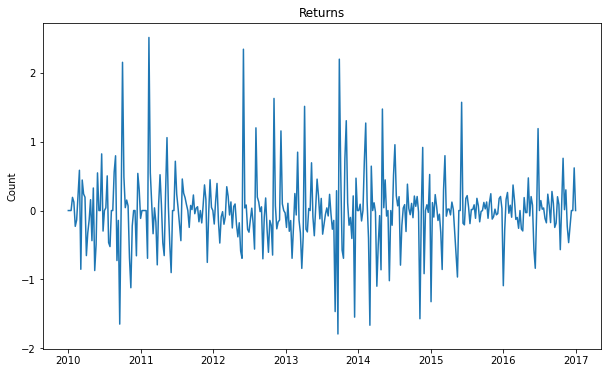

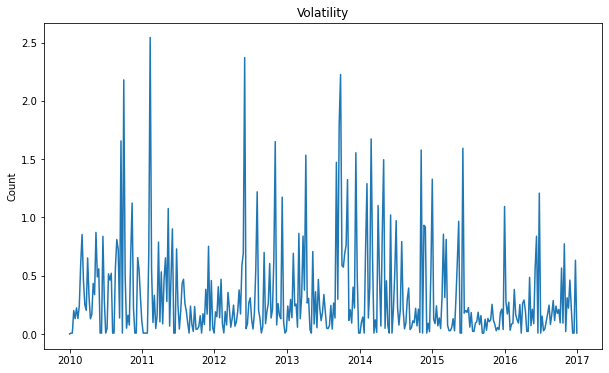

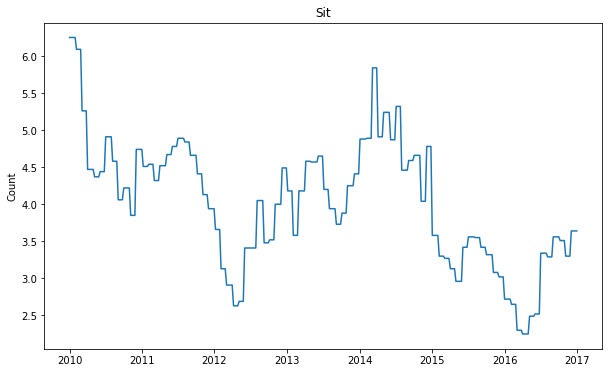

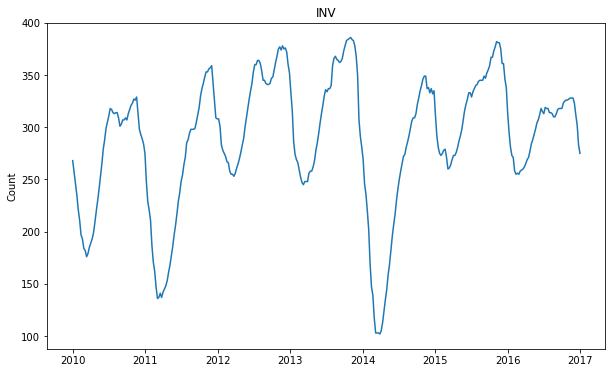

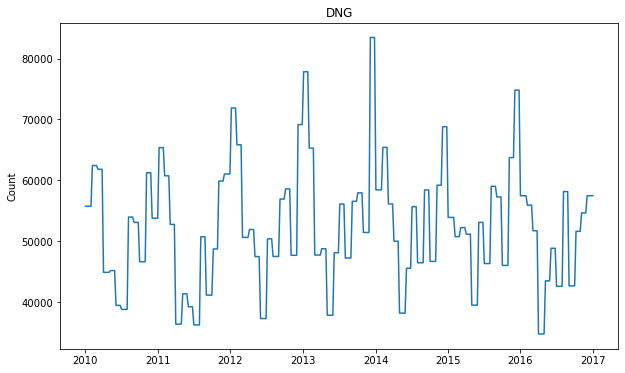

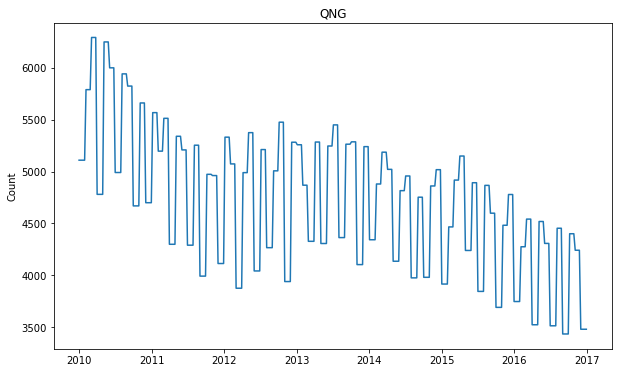

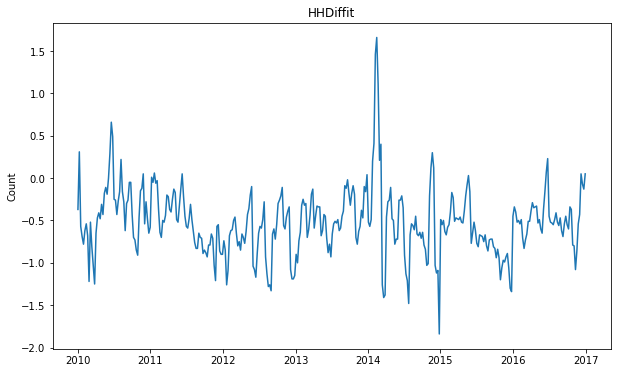

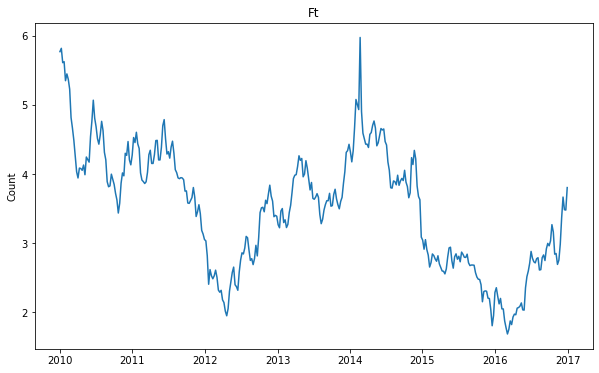

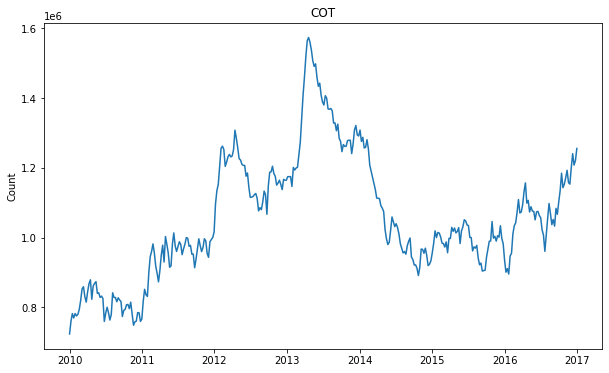

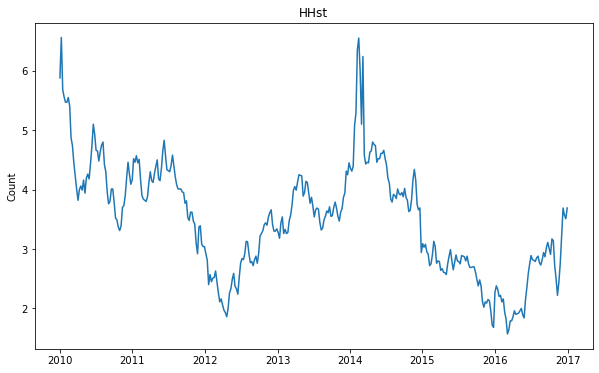

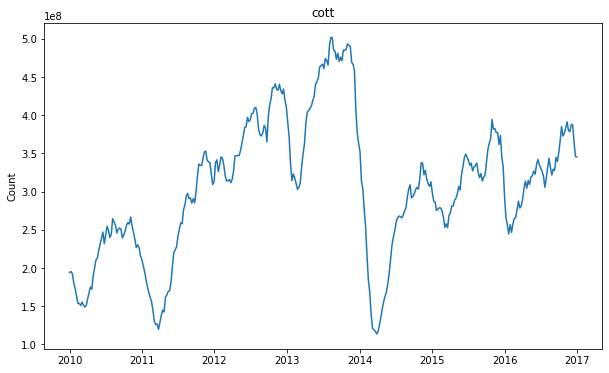

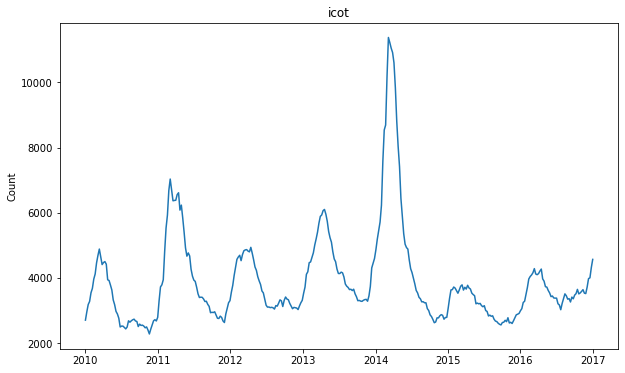

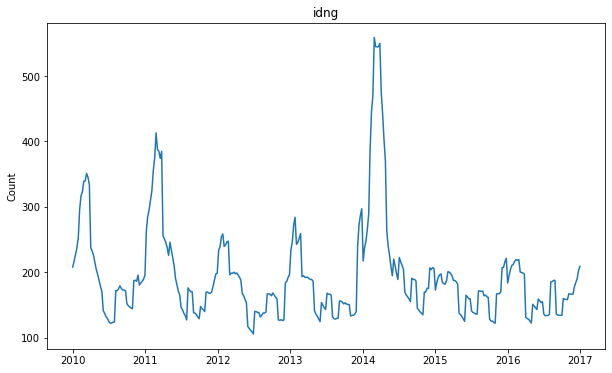

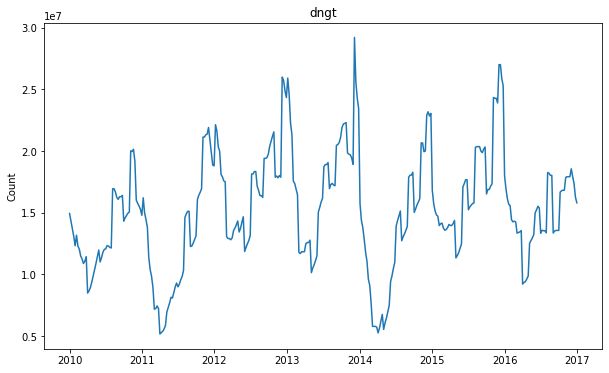

In [114]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_Pacific[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

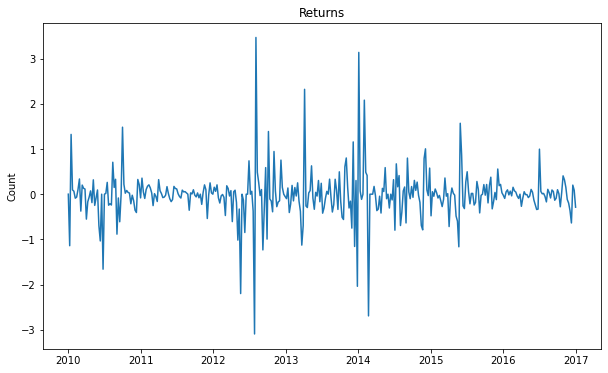

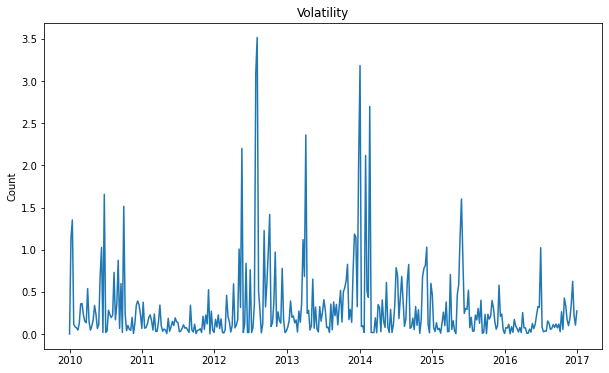

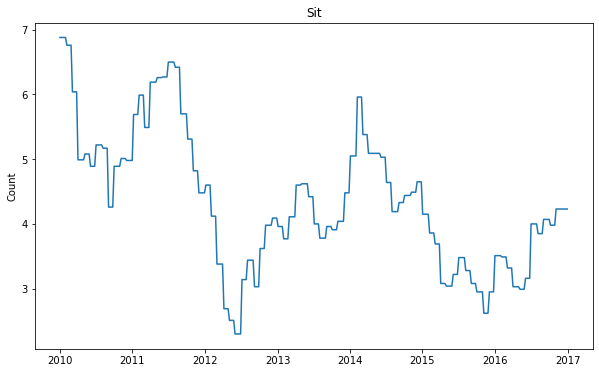

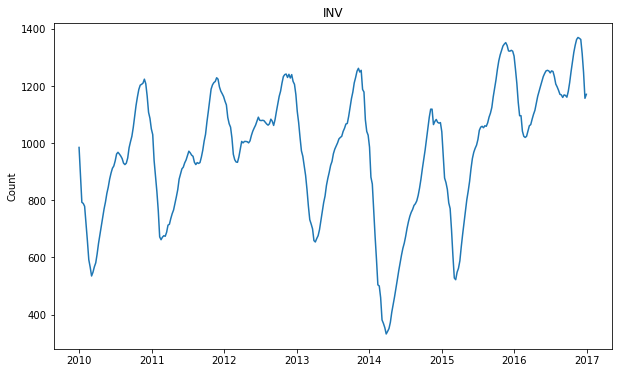

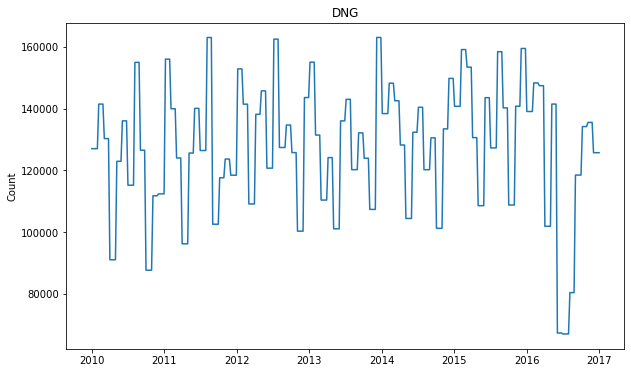

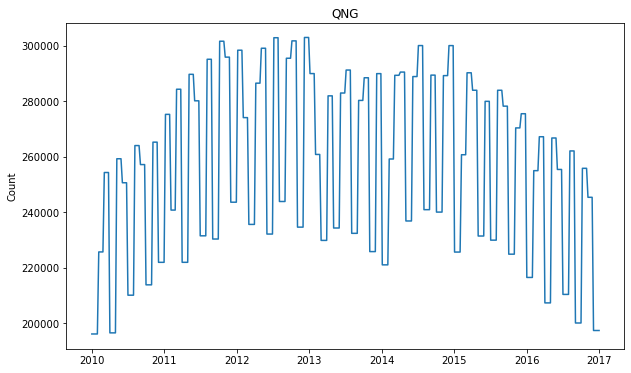

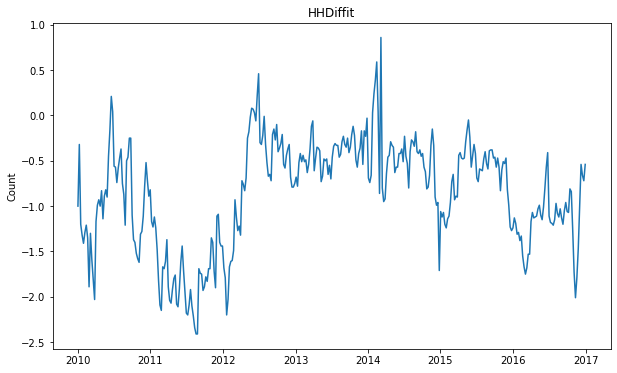

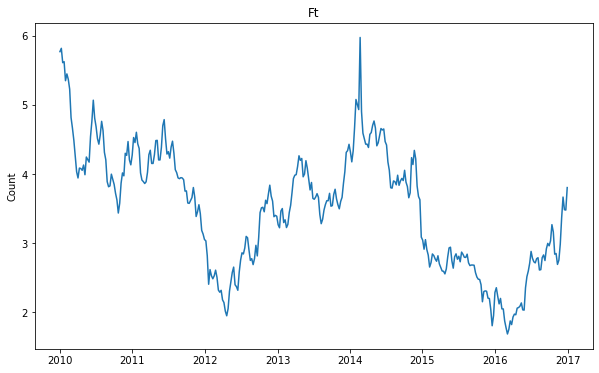

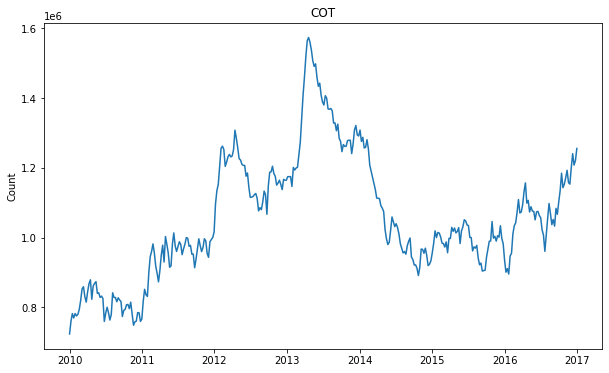

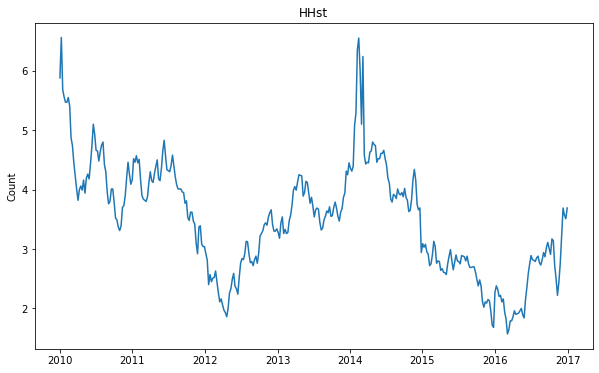

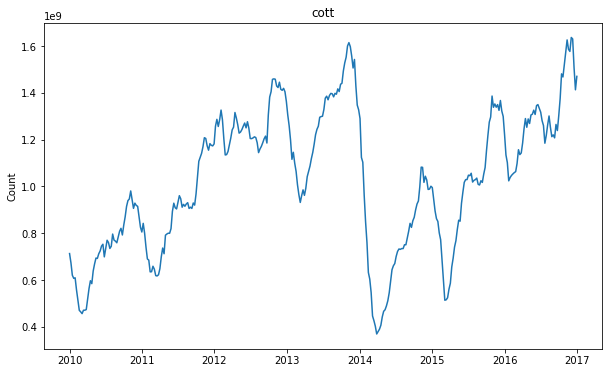

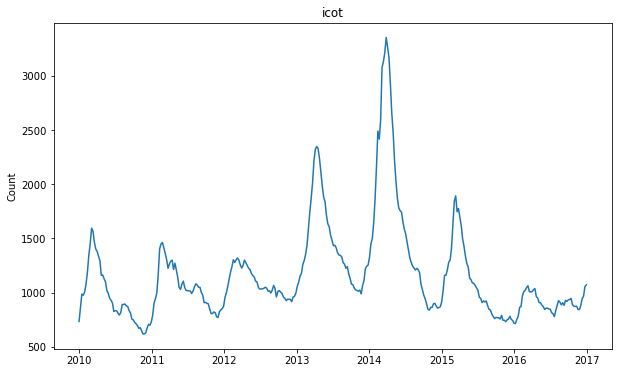

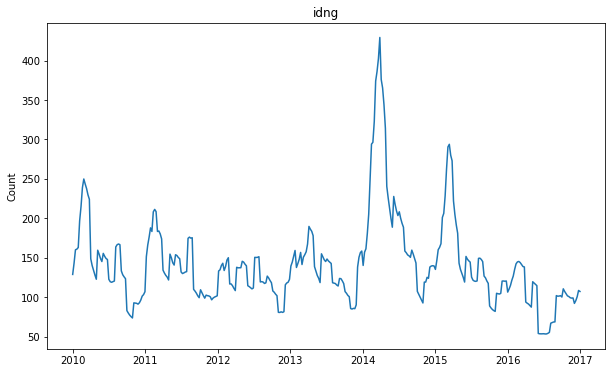

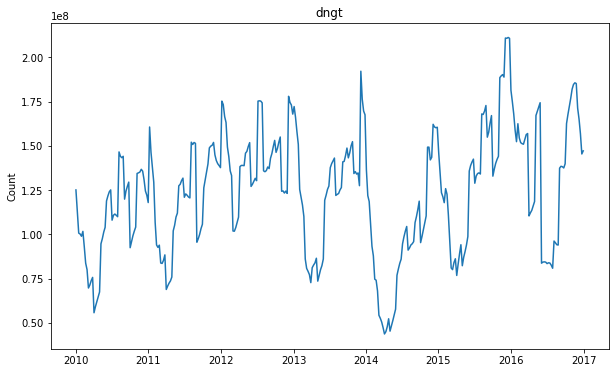

In [115]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.plot(fds_SC[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

# End: Line plots of Nodes

## Begin: Scatter Plots

In [116]:
node

East             366
Midwest          366
Mountain         366
Pacific          366
South Central    366
Name: Node, dtype: int64

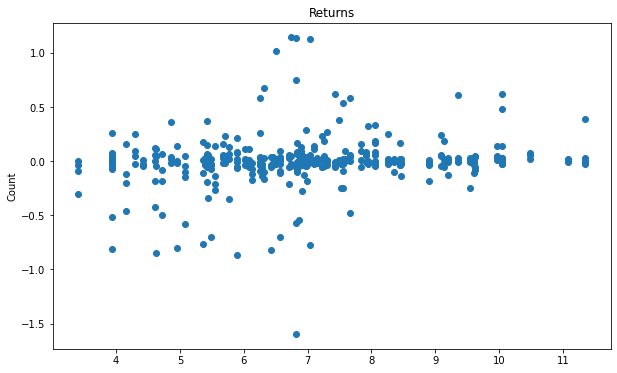

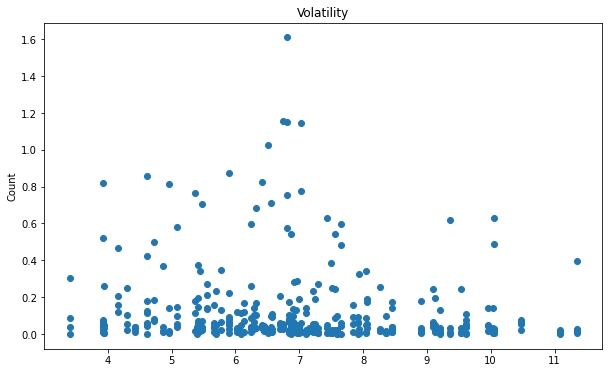

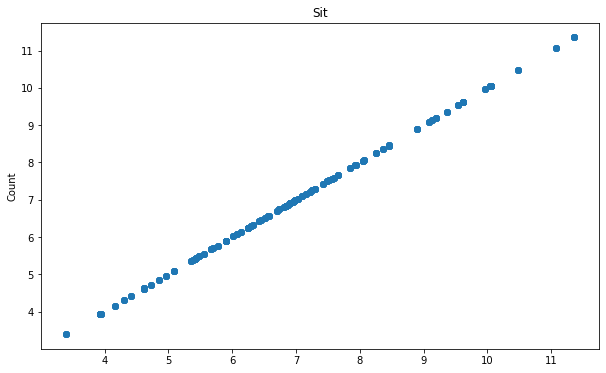

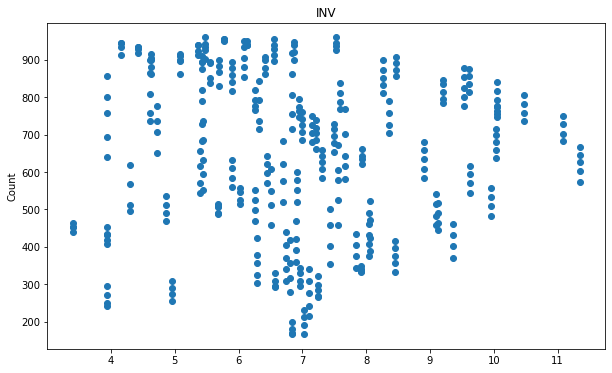

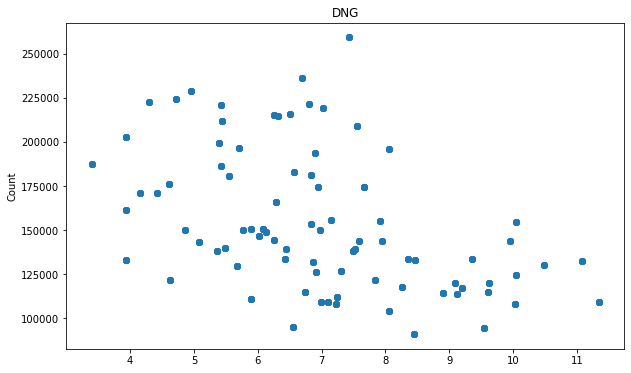

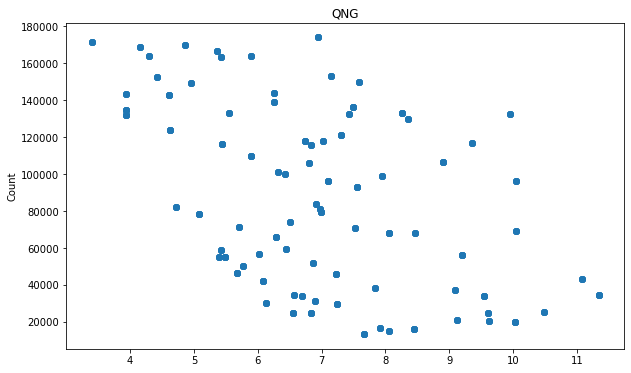

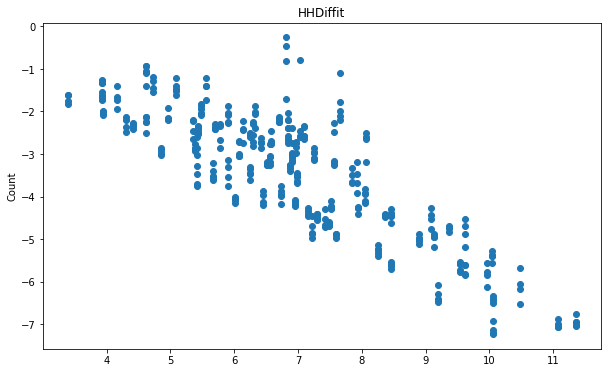

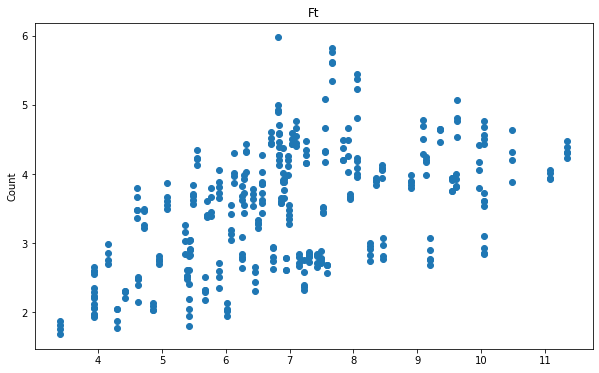

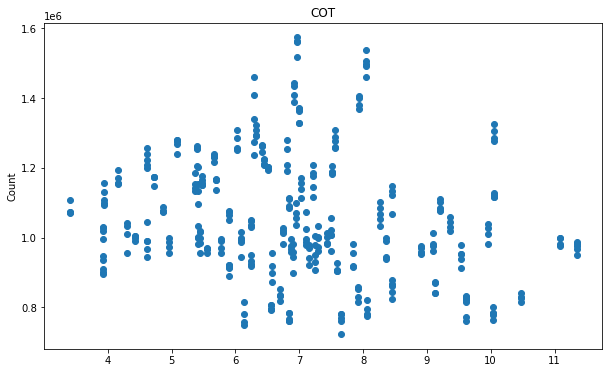

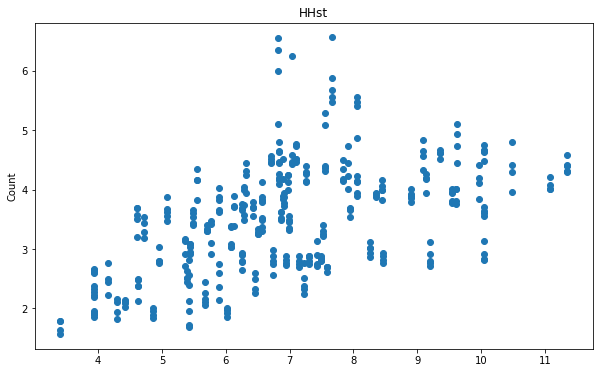

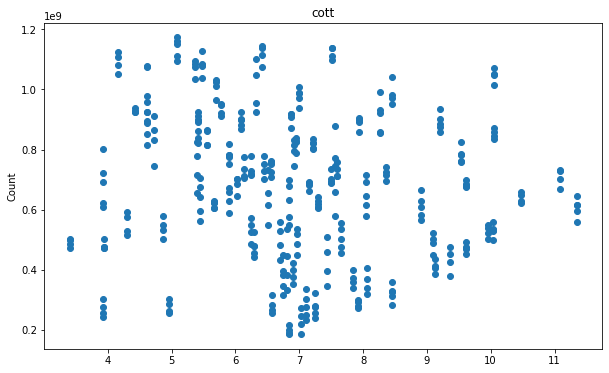

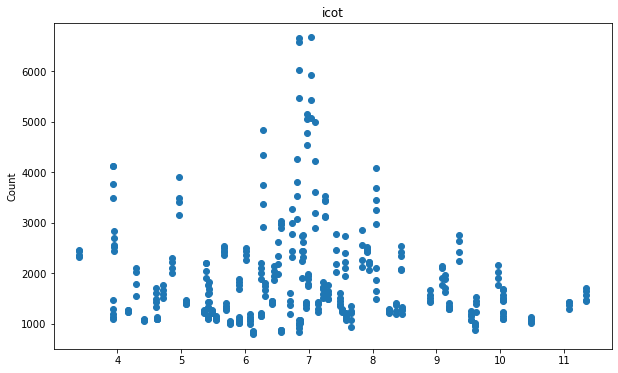

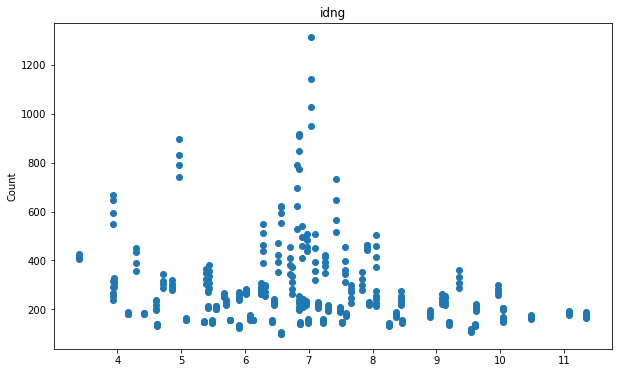

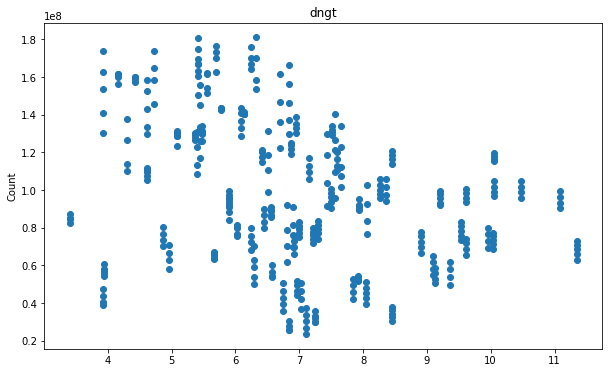

In [118]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.scatter(fds_East.Sit, fds_East[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

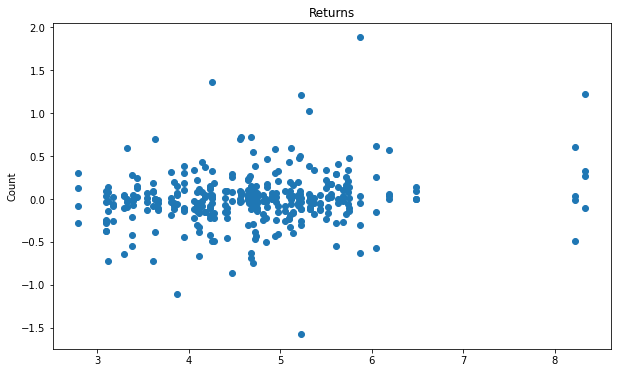

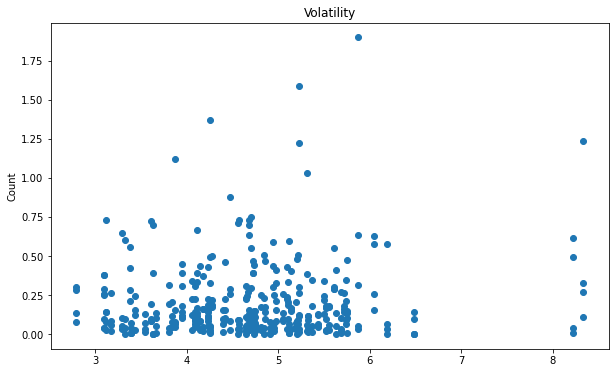

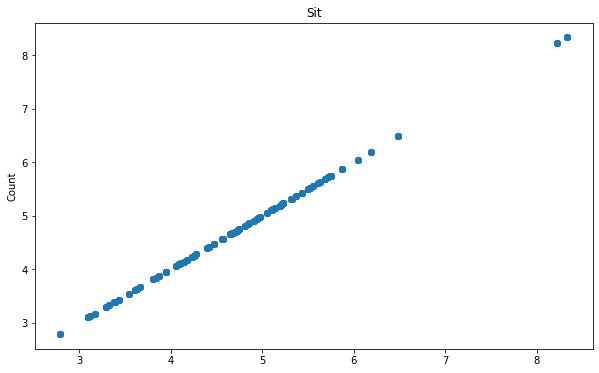

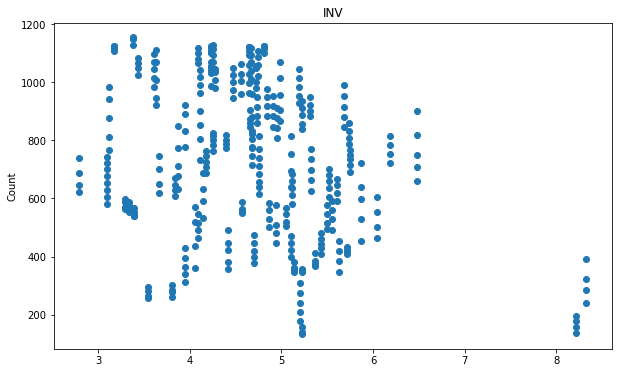

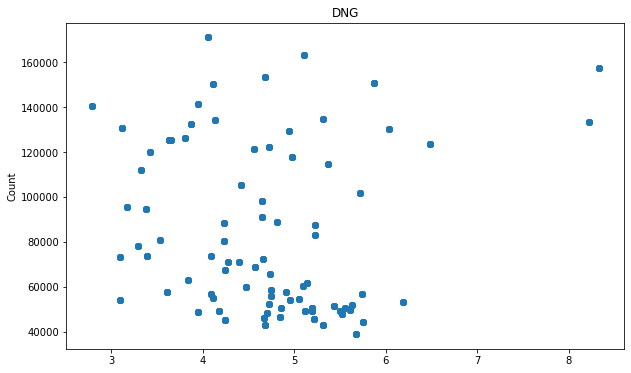

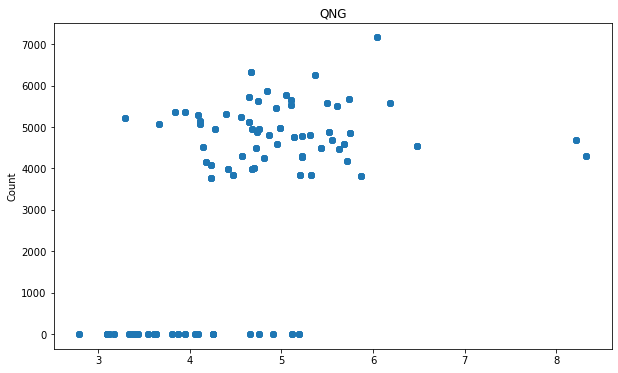

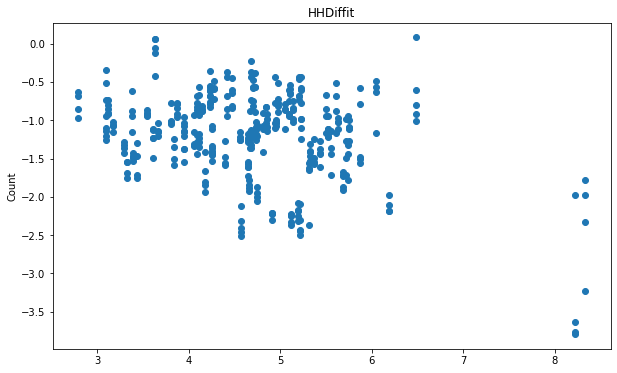

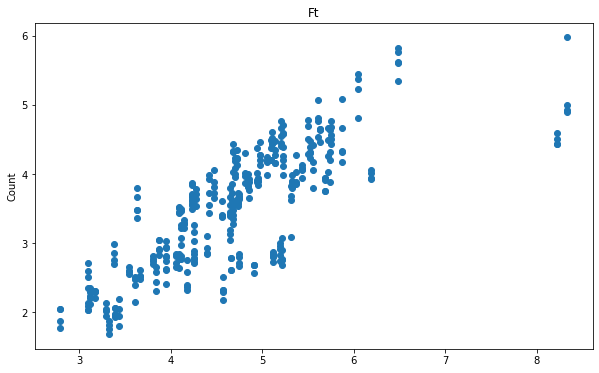

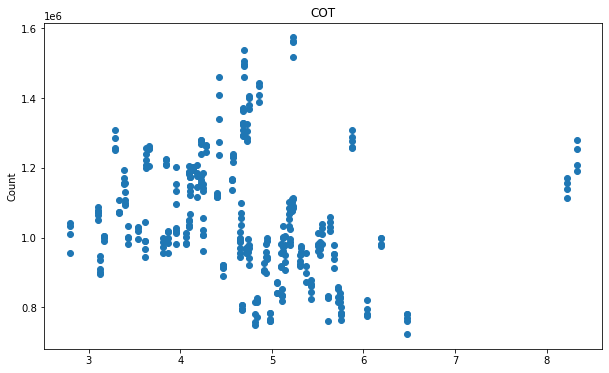

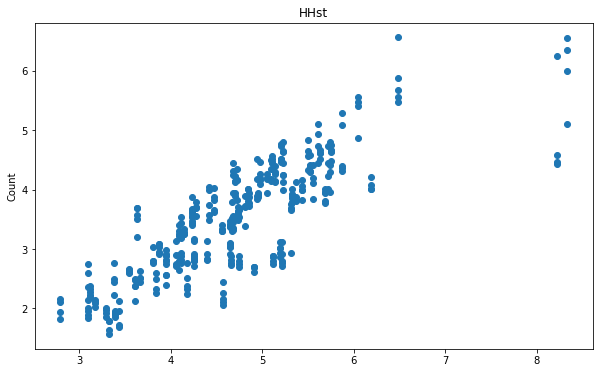

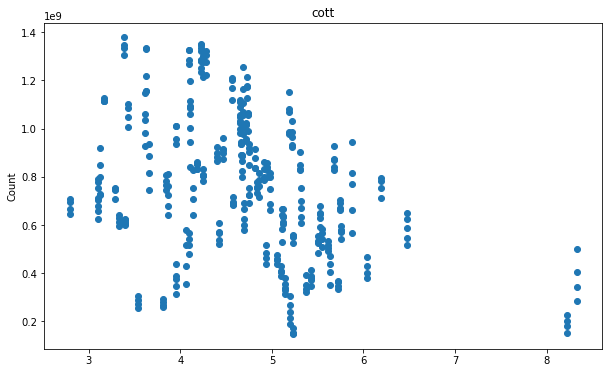

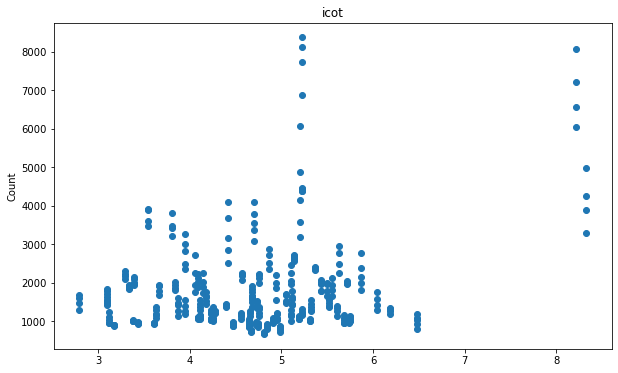

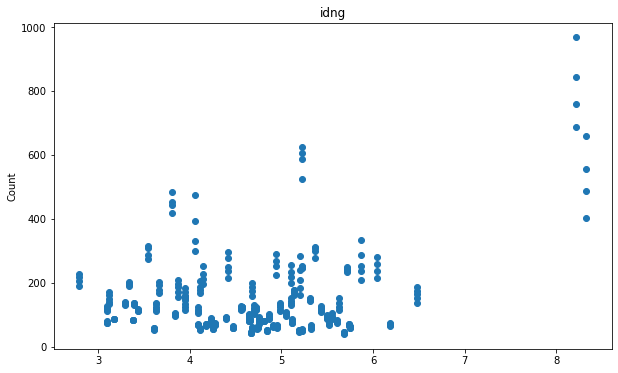

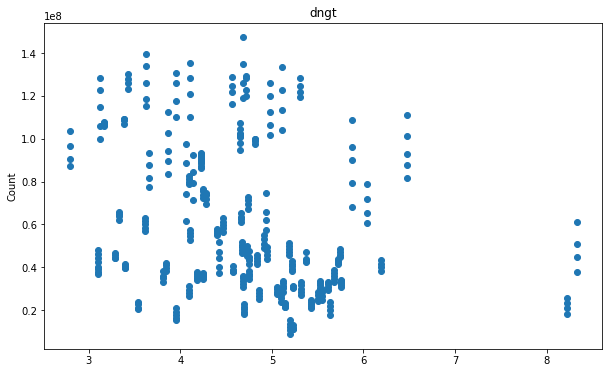

In [119]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.scatter(fds_Midwest.Sit, fds_Midwest[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

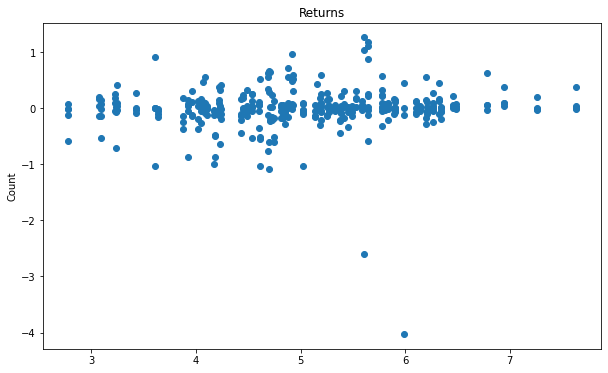

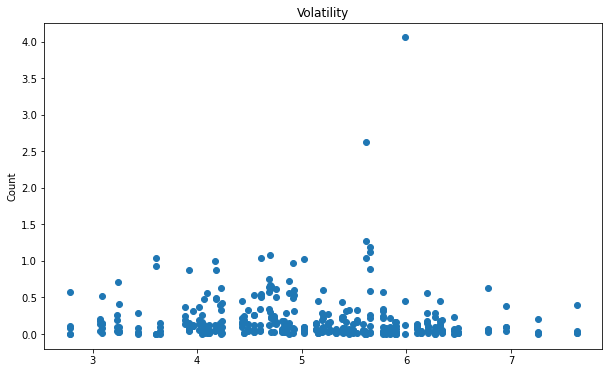

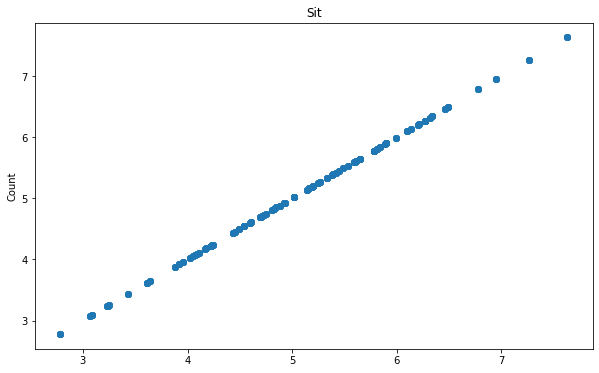

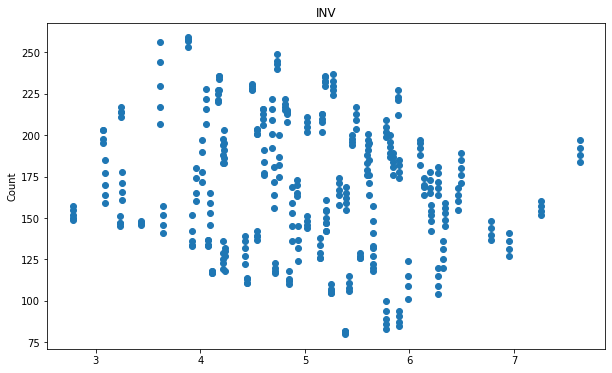

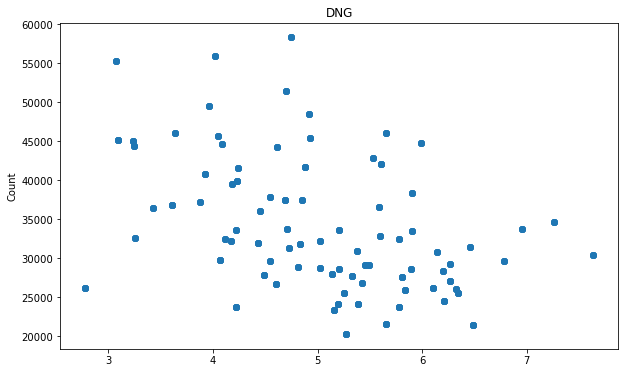

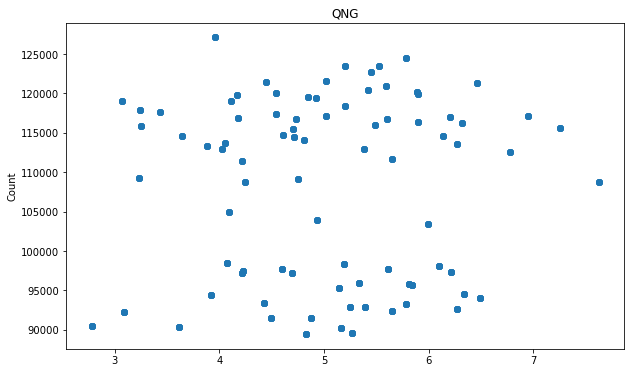

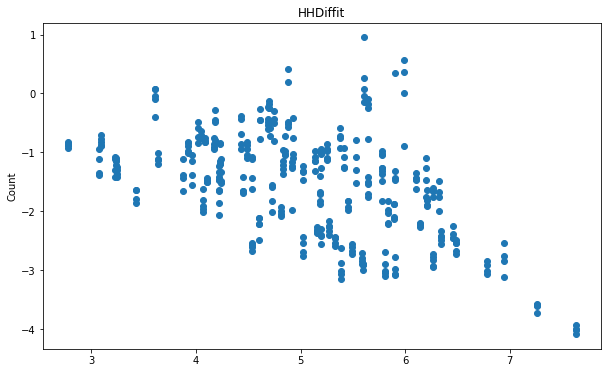

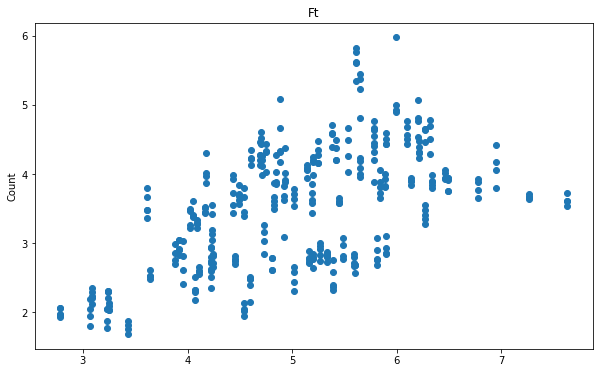

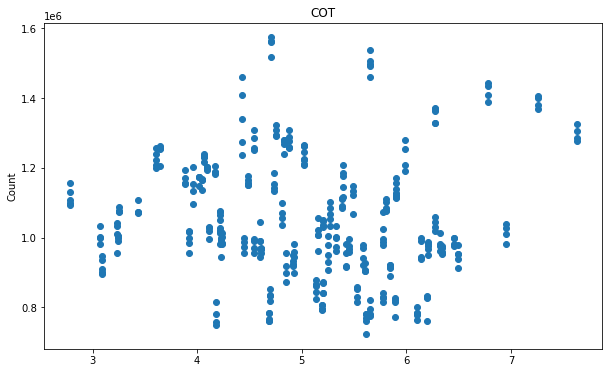

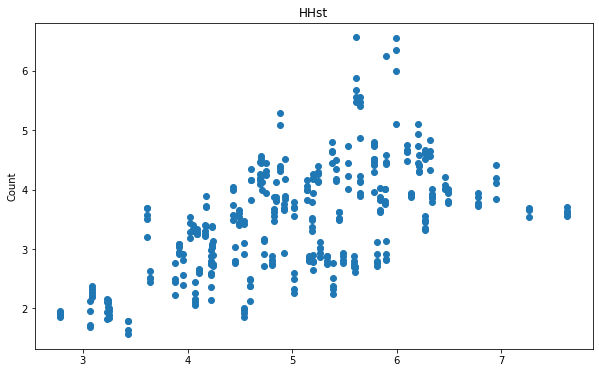

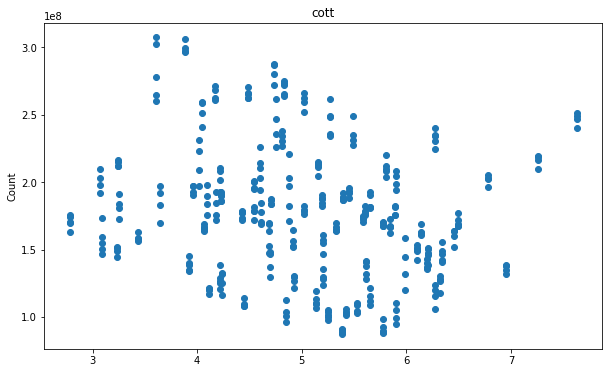

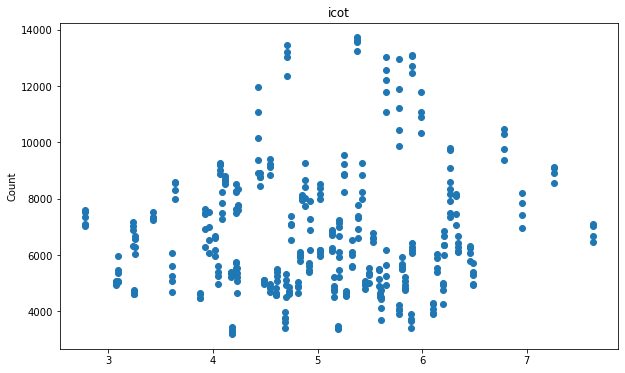

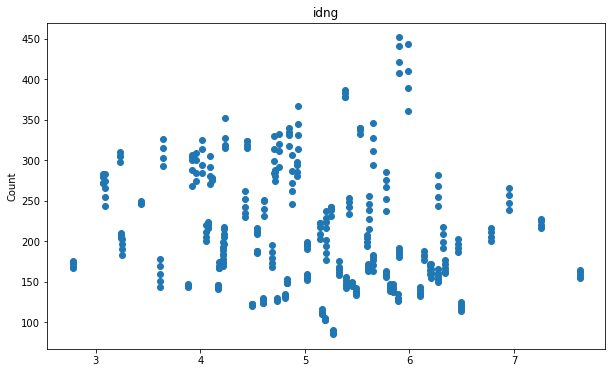

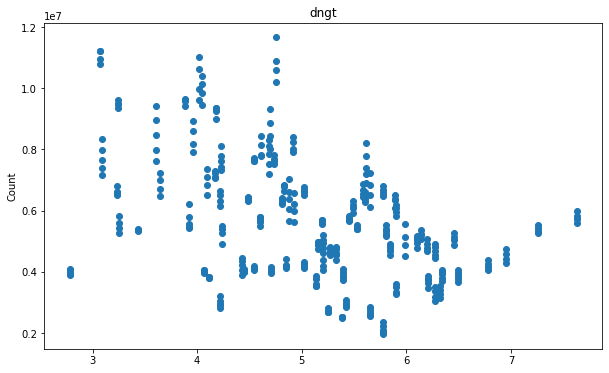

In [120]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.scatter(fds_Mountain.Sit, fds_Mountain[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

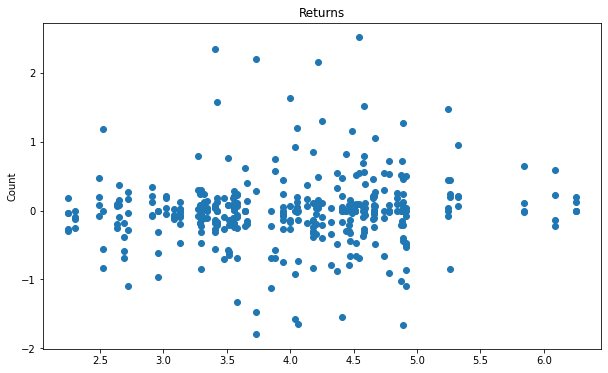

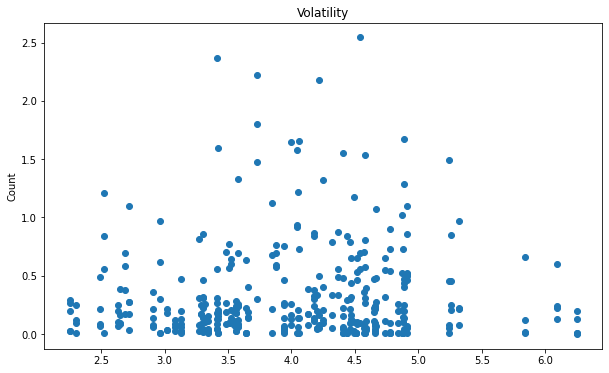

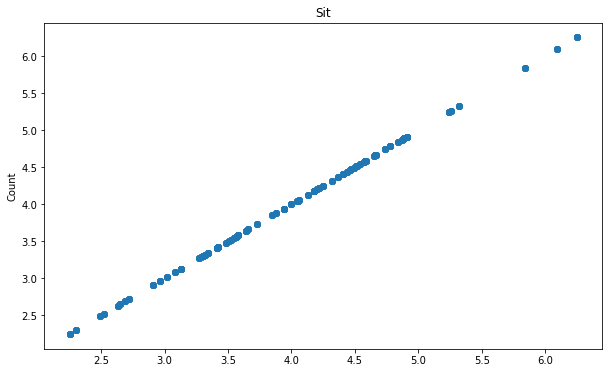

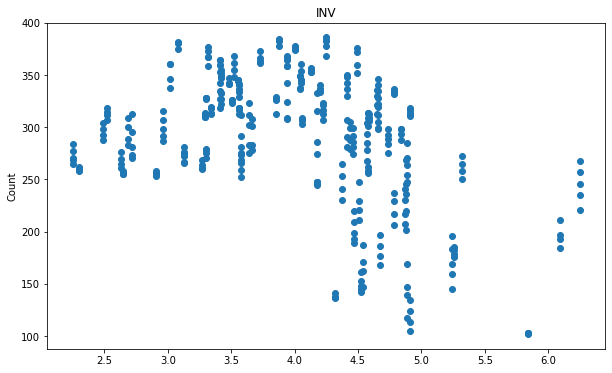

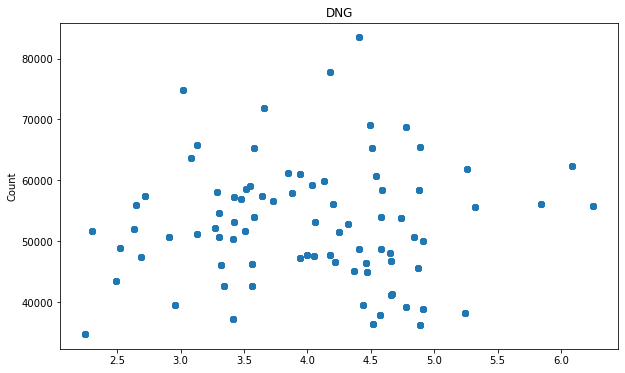

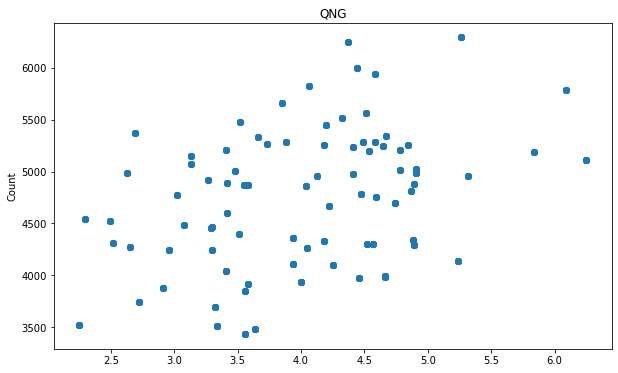

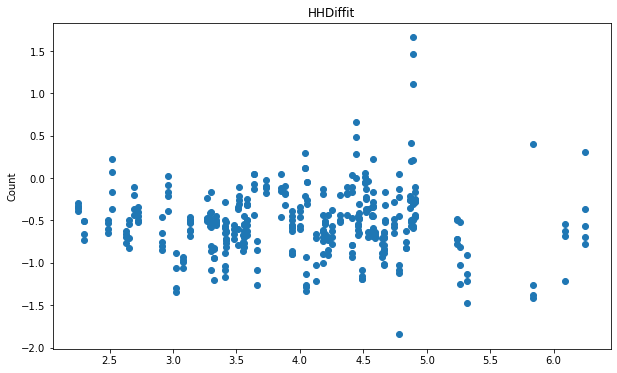

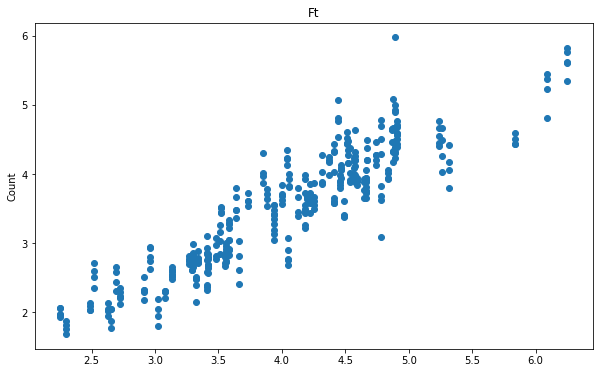

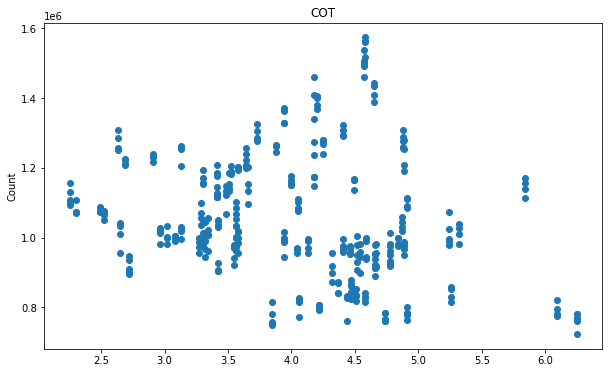

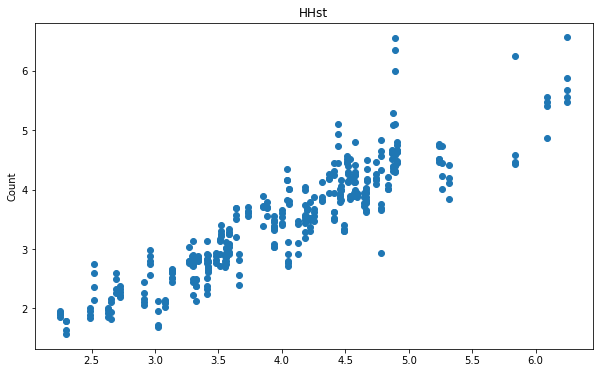

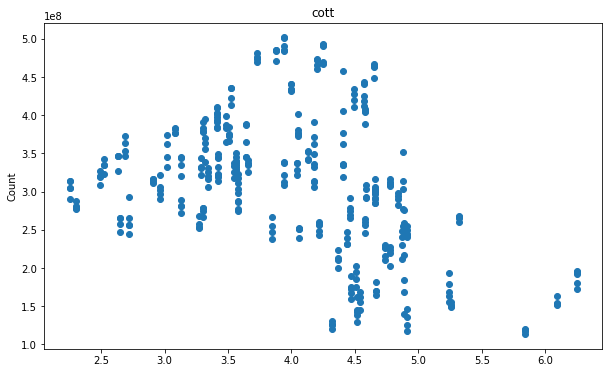

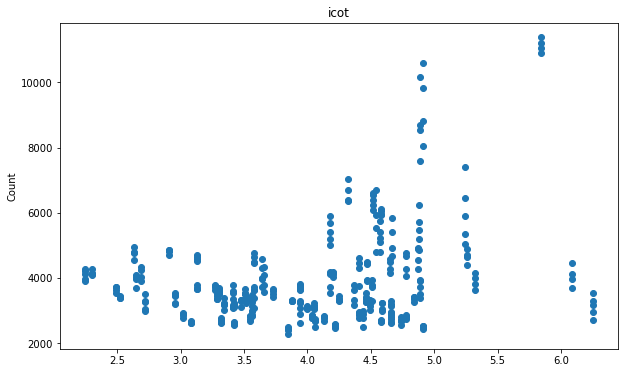

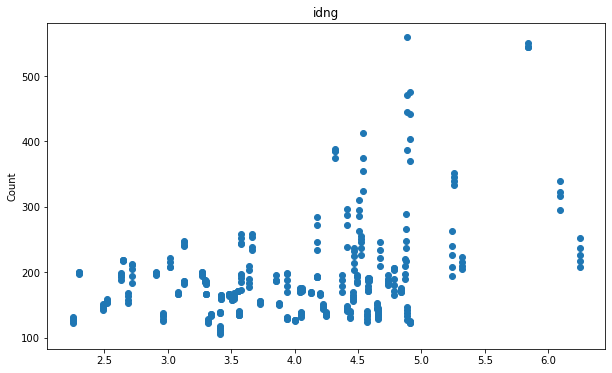

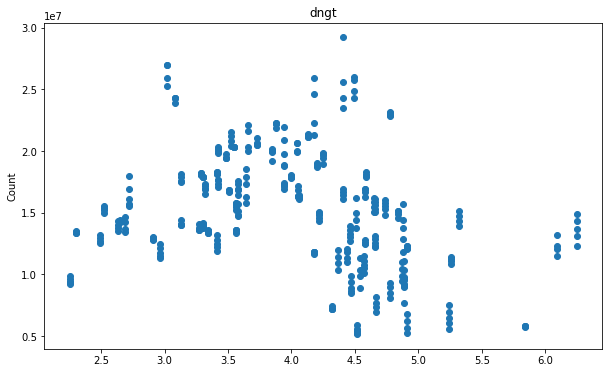

In [121]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.scatter(fds_Pacific.Sit, fds_Pacific[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

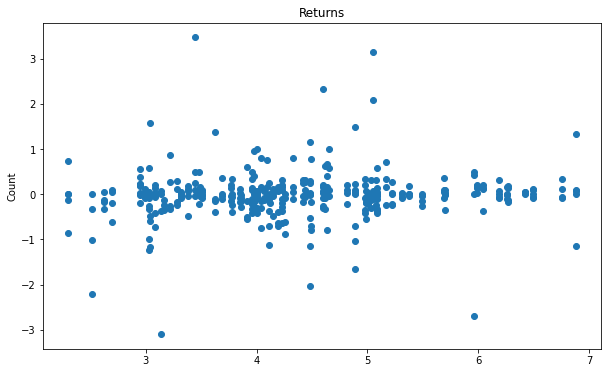

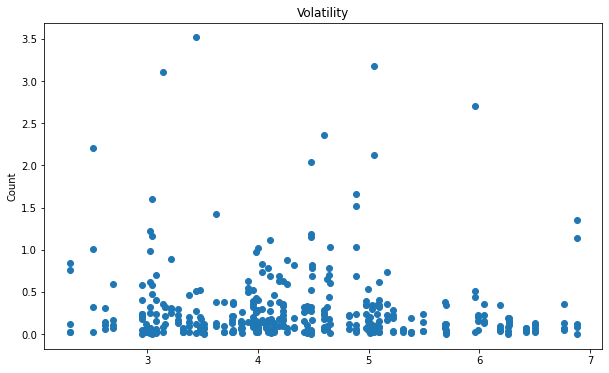

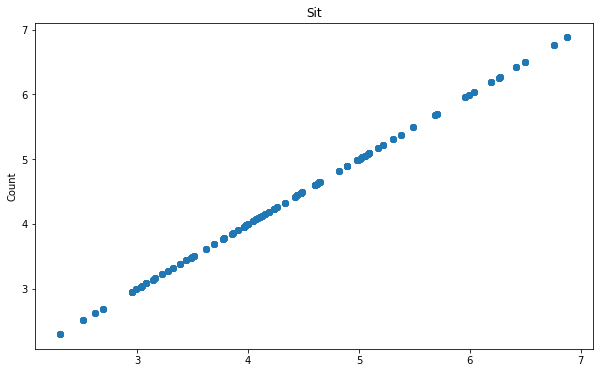

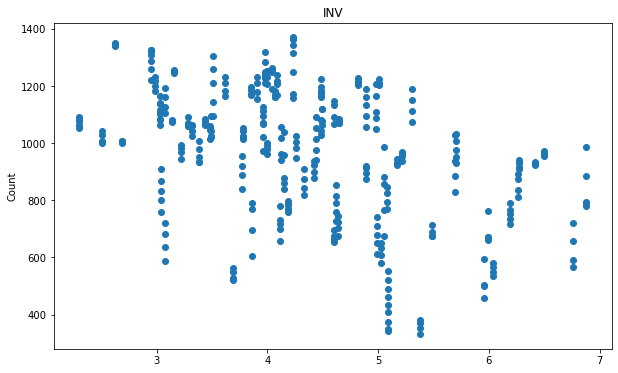

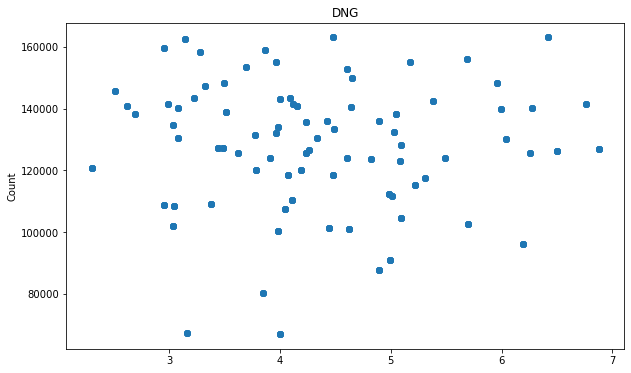

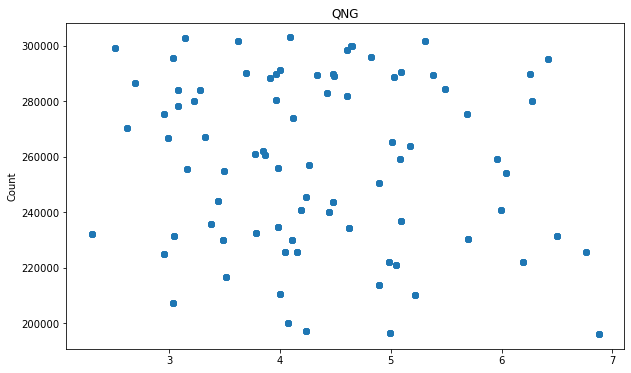

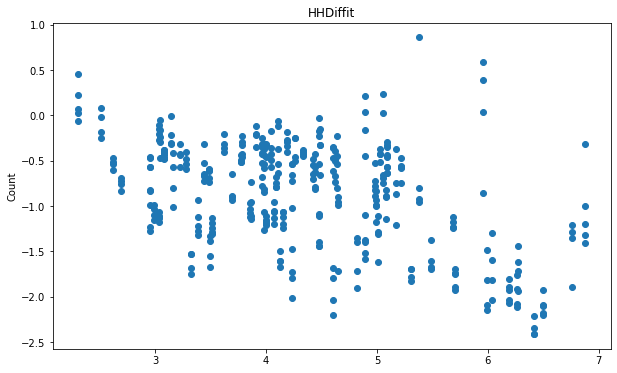

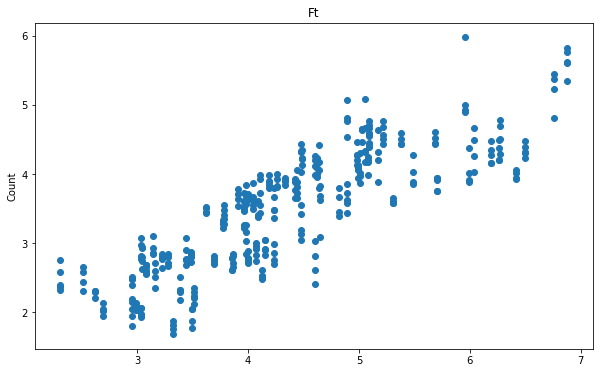

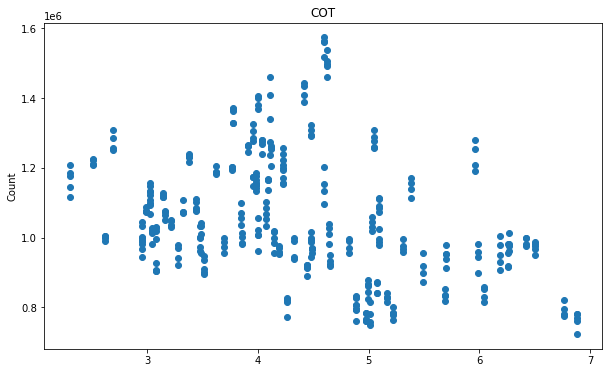

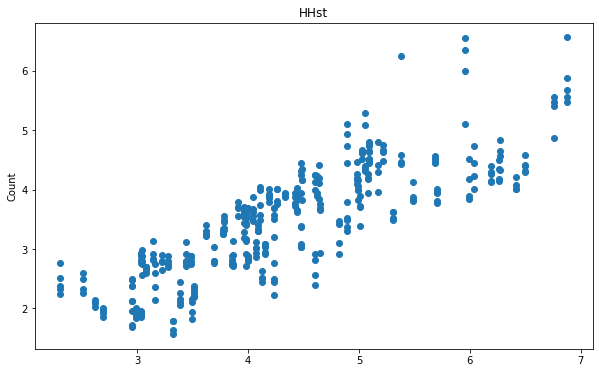

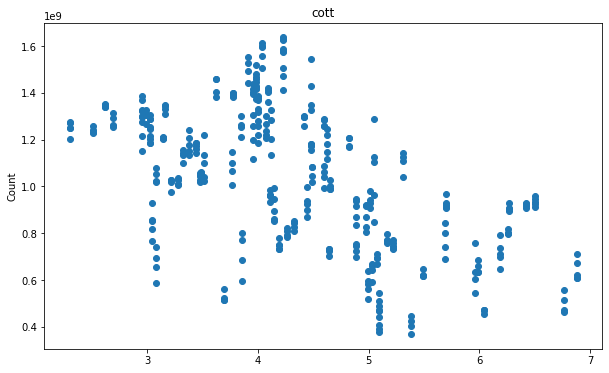

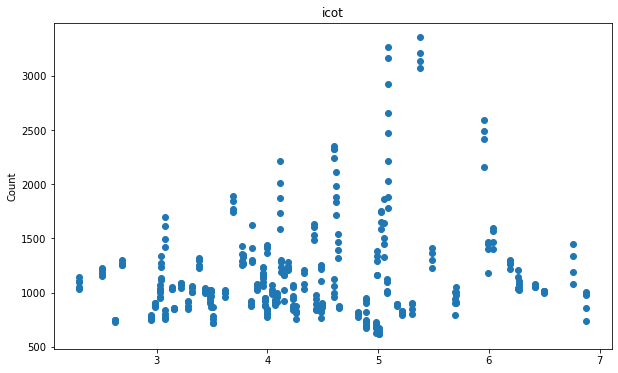

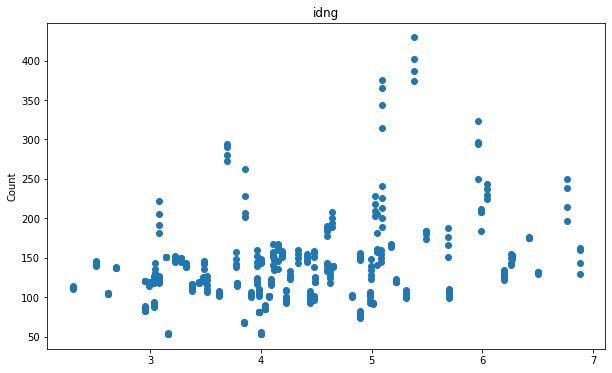

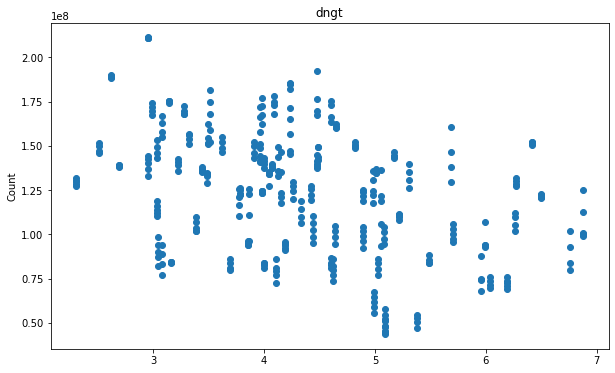

In [122]:
for col in cols_date: 
    plt.figure(figsize=(10,6))
    plt.scatter(fds_SC.Sit, fds_SC[col])
    plt.title(col)
    plt.ylabel("Count")
    plt.show()
    print()

## End: Scatter Plots

# Begin: Machine Learning

In [123]:
df_FDS.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt'],
      dtype='object')

In [124]:
df_FDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1830 non-null   float64       
 1   Volatility  1830 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
 12  cott        1830 non-null   int64         
 13  icot        1830 non-null   float64       
 14  idng        1830 non-null   float64       
 15  dngt        1830 non-null   float64       
dtypes: datetime64[ns](1), fl

In [126]:
# There was no need to perform this.

str_cols = []

for col in df_FDS.columns:
    if (df_FDS[col].dtype == str) & (df_FDS[col].dtype == object):
        print(col)
        df_FDS.append(col)
        
df_str = df_FDS.loc[:, str_cols]
df_str.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [135]:
num_cols = []

for col in df_FDS.columns:
    if (df_FDS[col].dtype != object):
        print(col)
        num_cols.append(col)
        
df_num = df_FDS.loc[:, num_cols]
df_num.head()

Returns
Volatility
Date
Sit
INV
DNG
QNG
HHDiffit
Ft
COT
HHst
cott
icot
idng
dngt


Returns  Volatility       Date   Sit  INV       DNG      QNG  HHDiffit  \
0  0.000000    0.000000 2010-01-01  7.66  769  174475.2  13475.0     -1.78   
1 -0.481303    0.484173 2010-01-08  7.66  703  174475.2  13475.0     -1.10   
2  0.587787    0.595347 2010-01-15  7.66  642  174475.2  13475.0     -1.98   
3  0.058840    0.061240 2010-01-22  7.66  616  174475.2  13475.0     -2.10   
4  0.041964    0.044199 2010-01-29  7.66  582  174475.2  13475.0     -2.19   

      Ft     COT  HHst       cott         icot        idng         dngt  
0  5.770  724087  5.88  556822903   941.595579  226.885826  134171428.8  
1  5.818  760159  6.56  534391777  1081.307255  248.186629  122656065.6  
2  5.610  782549  5.68  502396458  1218.923676  271.768224  112013078.4  
3  5.625  769887  5.56  474250392  1249.816558  283.238961  107476723.2  
4  5.350  782673  5.47  455515686  1344.798969  299.785567  101544566.4

In [136]:
df_FDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Returns     1830 non-null   float64       
 1   Volatility  1830 non-null   float64       
 2   Node        1830 non-null   object        
 3   Date        1830 non-null   datetime64[ns]
 4   Sit         1830 non-null   float64       
 5   INV         1830 non-null   int64         
 6   DNG         1830 non-null   float64       
 7   QNG         1830 non-null   float64       
 8   HHDiffit    1830 non-null   float64       
 9   Ft          1830 non-null   float64       
 10  COT         1830 non-null   int64         
 11  HHst        1830 non-null   float64       
 12  cott        1830 non-null   int64         
 13  icot        1830 non-null   float64       
 14  idng        1830 non-null   float64       
 15  dngt        1830 non-null   float64       
dtypes: datetime64[ns](1), fl

In [137]:
# linear model, drop_first=True
# One Hot Encode, columns with less than 10 categories.
cols_oh = ["Node"]
df_oh = pd.get_dummies(df_FDS.loc[:, cols_oh], drop_first=True)
df_oh.head()

Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central
0             0              0             0                   0
1             0              0             0                   0
2             0              0             0                   0
3             0              0             0                   0
4             0              0             0                   0

In [139]:
df_FDS.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt'],
      dtype='object')

In [140]:
# Removed "Date", "Node"

cols_ns_ml = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt']

In [150]:
# no scaler
df_no_scale_num = df_num.copy()
df_no_scale_num.head()

Returns  Volatility       Date   Sit  INV       DNG      QNG  HHDiffit  \
0  0.000000    0.000000 2010-01-01  7.66  769  174475.2  13475.0     -1.78   
1 -0.481303    0.484173 2010-01-08  7.66  703  174475.2  13475.0     -1.10   
2  0.587787    0.595347 2010-01-15  7.66  642  174475.2  13475.0     -1.98   
3  0.058840    0.061240 2010-01-22  7.66  616  174475.2  13475.0     -2.10   
4  0.041964    0.044199 2010-01-29  7.66  582  174475.2  13475.0     -2.19   

      Ft     COT  HHst       cott         icot        idng         dngt  
0  5.770  724087  5.88  556822903   941.595579  226.885826  134171428.8  
1  5.818  760159  6.56  534391777  1081.307255  248.186629  122656065.6  
2  5.610  782549  5.68  502396458  1218.923676  271.768224  112013078.4  
3  5.625  769887  5.56  474250392  1249.816558  283.238961  107476723.2  
4  5.350  782673  5.47  455515686  1344.798969  299.785567  101544566.4

In [144]:
# # no scale, dropped columns
# df_no_scale = df_no_scale_num[cols_ns_ml]
# df_no_scale.head()

Returns  Volatility   Sit  INV       DNG      QNG  HHDiffit     Ft  \
0  0.000000    0.000000  7.66  769  174475.2  13475.0     -1.78  5.770   
1 -0.481303    0.484173  7.66  703  174475.2  13475.0     -1.10  5.818   
2  0.587787    0.595347  7.66  642  174475.2  13475.0     -1.98  5.610   
3  0.058840    0.061240  7.66  616  174475.2  13475.0     -2.10  5.625   
4  0.041964    0.044199  7.66  582  174475.2  13475.0     -2.19  5.350   

      COT  HHst       cott         icot        idng         dngt  
0  724087  5.88  556822903   941.595579  226.885826  134171428.8  
1  760159  6.56  534391777  1081.307255  248.186629  122656065.6  
2  782549  5.68  502396458  1218.923676  271.768224  112013078.4  
3  769887  5.56  474250392  1249.816558  283.238961  107476723.2  
4  782673  5.47  455515686  1344.798969  299.785567  101544566.4

In [151]:
# no scale "df_FDS" set
df_ns = pd.concat([df_FDS, df_oh], axis=1)
df_ns.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0  134171428.8             0              0             0                   0  
1  122656065.6             0              0             0                   0  
2  112013078.4             0              0             0                   0  
3  107476723.2             0              0             0                   0  
4  101544566.4             0              0             0                   0

In [152]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             1830 non-null   float64       
 1   Volatility          1830 non-null   float64       
 2   Node                1830 non-null   object        
 3   Date                1830 non-null   datetime64[ns]
 4   Sit                 1830 non-null   float64       
 5   INV                 1830 non-null   int64         
 6   DNG                 1830 non-null   float64       
 7   QNG                 1830 non-null   float64       
 8   HHDiffit            1830 non-null   float64       
 9   Ft                  1830 non-null   float64       
 10  COT                 1830 non-null   int64         
 11  HHst                1830 non-null   float64       
 12  cott                1830 non-null   int64         
 13  icot                1830 non-null   float64     

In [153]:
# Null analysis
df_ns = df_ns.fillna(value=0)
df_ns.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0  134171428.8             0              0             0                   0  
1  122656065.6             0              0             0                   0  
2  112013078.4             0              0             0                   0  
3  107476723.2             0              0             0                   0  
4  101544566.4             0              0             0                   0

In [154]:
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830 entries, 0 to 1829
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             1830 non-null   float64       
 1   Volatility          1830 non-null   float64       
 2   Node                1830 non-null   object        
 3   Date                1830 non-null   datetime64[ns]
 4   Sit                 1830 non-null   float64       
 5   INV                 1830 non-null   int64         
 6   DNG                 1830 non-null   float64       
 7   QNG                 1830 non-null   float64       
 8   HHDiffit            1830 non-null   float64       
 9   Ft                  1830 non-null   float64       
 10  COT                 1830 non-null   int64         
 11  HHst                1830 non-null   float64       
 12  cott                1830 non-null   int64         
 13  icot                1830 non-null   float64     

In [159]:
train_fin = df_ns.loc[(df_ns.Date >= datetime.datetime(2010,1,1)) & (df_ns.Date <= datetime.datetime(2015,12,30))]
train_fin.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0  134171428.8             0              0             0                   0  
1  122656065.6             0              0             0                   0  
2  112013078.4             0              0             0                   0  
3  107476723.2             0              0             0                   0  
4  101544566.4             0              0             0                   0

In [165]:
train_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             1565 non-null   float64       
 1   Volatility          1565 non-null   float64       
 2   Node                1565 non-null   object        
 3   Date                1565 non-null   datetime64[ns]
 4   Sit                 1565 non-null   float64       
 5   INV                 1565 non-null   int64         
 6   DNG                 1565 non-null   float64       
 7   QNG                 1565 non-null   float64       
 8   HHDiffit            1565 non-null   float64       
 9   Ft                  1565 non-null   float64       
 10  COT                 1565 non-null   int64         
 11  HHst                1565 non-null   float64       
 12  cott                1565 non-null   int64         
 13  icot                1565 non-null   float64     

In [160]:
test_fin = df_ns.loc[(df_ns.Date >= datetime.datetime(2016,1,1)) & (df_ns.Date <= datetime.datetime(2016,12,30))]
test_fin.head()

Returns  Volatility  Node       Date   Sit  INV       DNG       QNG  \
313 -0.812268    0.818367  East 2016-01-01  3.93  857  202858.0  134828.4   
314 -0.068563    0.067406  East 2016-01-08  3.93  802  202858.0  134828.4   
315  0.037979    0.040176  East 2016-01-15  3.93  758  202858.0  134828.4   
316  0.071887    0.074414  East 2016-01-22  3.93  695  202858.0  134828.4   
317 -0.011628    0.009916  East 2016-01-29  3.93  641  202858.0  134828.4   

     HHDiffit     Ft     COT  HHst       cott         icot        idng  \
313     -1.66  2.288  935925  2.27  802087725  1092.094516  236.707118   
314     -1.55  2.356  901080  2.38  722666160  1123.541147  252.940150   
315     -1.61  2.232  911328  2.32  690786624  1202.279683  267.622691   
316     -1.73  2.122  895870  2.20  622629650  1289.021583  291.882014   
317     -1.71  2.201  947373  2.22  607266093  1477.960998  316.471139   

            dngt  Node_Midwest  Node_Mountain  Node_Pacific  \
313  173849306.0             0              0             0   
314  162692116.0             0              0             0   
315  153766364.0             0              0             0   
316  140986310.0             0              0             0   
317  130031978.0             0              0             0   

     Node_South Central  
313                   0  
314                   0  
315                   0  
316                   0  
317                   0

In [167]:
test_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 313 to 1829
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Returns             265 non-null    float64       
 1   Volatility          265 non-null    float64       
 2   Node                265 non-null    object        
 3   Date                265 non-null    datetime64[ns]
 4   Sit                 265 non-null    float64       
 5   INV                 265 non-null    int64         
 6   DNG                 265 non-null    float64       
 7   QNG                 265 non-null    float64       
 8   HHDiffit            265 non-null    float64       
 9   Ft                  265 non-null    float64       
 10  COT                 265 non-null    int64         
 11  HHst                265 non-null    float64       
 12  cott                265 non-null    int64         
 13  icot                265 non-null    float64    

In [212]:
df_ns.columns

Index(['Returns', 'Volatility', 'Node', 'Date', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt',
       'Node_Midwest', 'Node_Mountain', 'Node_Pacific', 'Node_South Central'],
      dtype='object')

In [213]:
df_ns.head()

Returns  Volatility  Node       Date   Sit  INV       DNG      QNG  \
0  0.000000    0.000000  East 2010-01-01  7.66  769  174475.2  13475.0   
1 -0.481303    0.484173  East 2010-01-08  7.66  703  174475.2  13475.0   
2  0.587787    0.595347  East 2010-01-15  7.66  642  174475.2  13475.0   
3  0.058840    0.061240  East 2010-01-22  7.66  616  174475.2  13475.0   
4  0.041964    0.044199  East 2010-01-29  7.66  582  174475.2  13475.0   

   HHDiffit     Ft     COT  HHst       cott         icot        idng  \
0     -1.78  5.770  724087  5.88  556822903   941.595579  226.885826   
1     -1.10  5.818  760159  6.56  534391777  1081.307255  248.186629   
2     -1.98  5.610  782549  5.68  502396458  1218.923676  271.768224   
3     -2.10  5.625  769887  5.56  474250392  1249.816558  283.238961   
4     -2.19  5.350  782673  5.47  455515686  1344.798969  299.785567   

          dngt  Node_Midwest  Node_Mountain  Node_Pacific  Node_South Central  
0  134171428.8             0              0             0                   0  
1  122656065.6             0              0             0                   0  
2  112013078.4             0              0             0                   0  
3  107476723.2             0              0             0                   0  
4  101544566.4             0              0             0                   0

In [214]:
df_ns.to_csv("df_ns.csv", index=False, header=True)

In [162]:
cols_ns_fin = ['Returns', 'Volatility', 'Sit', 'INV', 'DNG', 'QNG',
       'HHDiffit', 'Ft', 'COT', 'HHst', 'cott', 'icot', 'idng', 'dngt',
       'Node_Midwest', 'Node_Mountain', 'Node_Pacific', 'Node_South Central']

In [171]:
train_df = train_fin[cols_ns_fin]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1776
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Returns             1565 non-null   float64
 1   Volatility          1565 non-null   float64
 2   Sit                 1565 non-null   float64
 3   INV                 1565 non-null   int64  
 4   DNG                 1565 non-null   float64
 5   QNG                 1565 non-null   float64
 6   HHDiffit            1565 non-null   float64
 7   Ft                  1565 non-null   float64
 8   COT                 1565 non-null   int64  
 9   HHst                1565 non-null   float64
 10  cott                1565 non-null   int64  
 11  icot                1565 non-null   float64
 12  idng                1565 non-null   float64
 13  dngt                1565 non-null   float64
 14  Node_Midwest        1565 non-null   uint8  
 15  Node_Mountain       1565 non-null   uint8  
 16  Node_P

In [170]:
test_df = test_fin[cols_ns_fin]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 313 to 1829
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Returns             265 non-null    float64
 1   Volatility          265 non-null    float64
 2   Sit                 265 non-null    float64
 3   INV                 265 non-null    int64  
 4   DNG                 265 non-null    float64
 5   QNG                 265 non-null    float64
 6   HHDiffit            265 non-null    float64
 7   Ft                  265 non-null    float64
 8   COT                 265 non-null    int64  
 9   HHst                265 non-null    float64
 10  cott                265 non-null    int64  
 11  icot                265 non-null    float64
 12  idng                265 non-null    float64
 13  dngt                265 non-null    float64
 14  Node_Midwest        265 non-null    uint8  
 15  Node_Mountain       265 non-null    uint8  
 16  Node_

In [173]:
X_train = train_df.drop(["Sit"], axis=1).values
y_train = train_df["Sit"].values

X_test = test_df.drop(["Sit"], axis=1).values
y_test = test_df["Sit"].values

In [195]:
# Initialize the model
model1 = LinearRegression()

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_train = mean_squared_error(y_train, train_preds)
r2_train = r2_score(y_train, train_preds)
mae_train = mean_absolute_error(y_train, train_preds)

print(f"mean squared error (MSE): {mse_train}")
print(f"R-squared (R2 ): {r2_train}")
print(f"MAE {mae_train}")

# We cannot evaluate the metrics {Score the prediction with MSE and R2} unless we have our expected output
# from the {train_preds and test_preds}

print()

# PRINT the METRICS
print("Testing SET")

# Score the prediction with MSE and R2 {evaluation_metrics}
mse_test = mean_squared_error(y_test, test_preds)
r2_test = r2_score(y_test, test_preds)
mae_test = mean_absolute_error(y_test, test_preds)

print(f"mean squared error (MSE): {mse_test}")
print(f"R-squared (R2 ): {r2_test}")
print(f"MAE {mae_test}")


# Compare the {evaluation_metrics} to test for overfitting
# Testing set is more important because the goal is to see how the model performs on unseen data.
# Run a new model with the goal of outperforming the Test Set evaluation metrics.

TRAINING SET
mean squared error (MSE): 3.9687172089367137e-23
R-squared (R2 ): 1.0
MAE 4.483124556712757e-12

Testing SET
mean squared error (MSE): 1.5053819999812915e-23
R-squared (R2 ): 1.0
MAE 3.0064638409848553e-12


In [ ]:
# First Drop are "drop(["HHst", "Date", "Node", "Returns"]"
# Training Set
# mean squared error (MSE): 7.099670242544481e-17
# R-squared (R2 ): 0.9999999999999999
# MAE 7.45792717976182e-09

# Testing Set
# mean squared error (MSE): 1.0266646952383153e-16
# R-squared (R2 ): 0.9999999999999997
# MAE 8.704798320313259e-09

# Second Drop are "drop(["HHst", "Date", "Node", "Returns", "Volatility"]"
# Training Set
# mean squared error (MSE): 8.013985081735017e-24
# R-squared (R2 ): 1.0
# MAE 2.0521806476381245e-12

# Testing Set
# mean squared error (MSE): 6.5638199841428095e-24
# R-squared (R2 ): 1.0
# MAE 2.1968833460990043e-12

# Third Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit"]"
# Training Set
# mean squared error (MSE): 0.029986522849603937
# R-squared (R2 ): 0.9617479934643749
# MAE 0.09265961407434714

# Testing Set
# mean squared error (MSE): 0.020093742342101338
# R-squared (R2 ): 0.933907379948414
# MAE 0.11884703772768432

# Fourth Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit"]"
# Training Set
# mean squared error (MSE): 0.029986522849603937
# R-squared (R2 ): 0.9617479934643749
# MAE 0.09265961407434714

# Testing Set
# mean squared error (MSE): 0.020093742342101338
# R-squared (R2 ): 0.933907379948414
# MAE 0.11884703772768432

# Fifth Drop are "drop(["HHst", "Date", "Node", "Returns", "HHDiffit", "Volatility"]"
# Training Set
# mean squared error (MSE): 0.03007342371712424
# R-squared (R2 ): 0.9616371392459978
# MAE 0.09256132049968763

# Testing Set
# mean squared error (MSE): 0.019992143802726636
# R-squared (R2 ): 0.9342415592937228
# MAE 0.11871097043597593